# Exploração de Dados, Pré-processamento e Levantamento de Hipóteses

# **Sprint 2**


Este notebook documenta a análise e transformação dos dados realizada durante a sprint. Serão apresentados os processos de exploração, pré-processamento dos dados e as hipóteses geradas a partir da análise.


## 4.2.1. Exploração de Dados (EDA)

Nesta seção, será apresentada uma análise detalhada das características das variáveis que compõem o conjunto de dados. O objetivo é identificar as principais tendências, padrões e possíveis inconsistências, facilitando o entendimento do comportamento dos dados. Esta análise é crucial para direcionar as etapas subsequentes do desenvolvimento do modelo preditivo.


### Carregando os Dados


#### Instalando bibliotecas


In [224]:
%pip install numpy pandas matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


#### Fazendo o merge das tabelas


In [225]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

generate_plots = True  # Mude caso queira regerar todos os gráficos (pode demorar)

# Definindo os caminhos dos arquivos
file_paths = [
    "../assets/dataset/month_2.csv",
    "../assets/dataset/month_3.csv",
    "../assets/dataset/month_4.csv",
    "../assets/dataset/month_5.csv",
    "../assets/dataset/month_6.csv",
]

info_cadastral = pd.read_csv("../assets/dataset/informacao_cadastral.csv")


# Carregando os arquivos em DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Junta todos os DataFrames em um único DataFrame por 'clientCode' e 'clientIndex'
df_mensal = pd.concat(dfs, ignore_index=True)
df = pd.merge(df_mensal, info_cadastral, on=["clientCode", "clientIndex"], how="left")

# Exibe as primeiras 5 linhas do DataFrame
df.head()

clientCode  clientIndex  meterIndex  \
0  7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0       24.64   
1  7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0       24.64   
2  7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0       24.64   
3  2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...            0       69.08   
4  2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...            0       69.22   

   initialIndex  pulseCount  gain             datetime       meterSN  \
0        10.113      1453.0  0.01  2024-02-01 05:05:51  5050102C02ZD   
1        10.113      1453.0  0.01  2024-02-01 17:34:40  5050102C02ZD   
2        10.113      1453.0  0.01  2024-02-01 21:43:25  5050102C02ZD   
3        25.916      4316.0  0.01  2024-02-01 00:34:16  Z1112C100D22   
4        25.916      4330.0  0.01  2024-02-01 03:42:26  Z1112C100D22   

  inputType      model  ...  gatewayGeoLocation.long        cep  \
0       DI1  IG1K-L-v2  ...                      NaN  90670-130   
1       DI1  IG1K-L-v2  ...                      NaN  90670-130   
2       DI1  IG1K-L-v2  ...                      NaN  90670-130   
3       DI4  IG1K-L-v2  ...                      NaN  90670-130   
4       DI4  IG1K-L-v2  ...                      NaN  90670-130   

            bairro        cidade                    categoria contratacao  \
0  JARDIM BOTÂNICO  PORTO ALEGRE  PRÉDIO EXISTENTE INDIVIDUAL  2023-06-22   
1  JARDIM BOTÂNICO  PORTO ALEGRE  PRÉDIO EXISTENTE INDIVIDUAL  2023-06-22   
2  JARDIM BOTÂNICO  PORTO ALEGRE  PRÉDIO EXISTENTE INDIVIDUAL  2023-06-22   
3  JARDIM BOTÂNICO  PORTO ALEGRE  PRÉDIO EXISTENTE INDIVIDUAL  2023-06-22   
4  JARDIM BOTÂNICO  PORTO ALEGRE  PRÉDIO EXISTENTE INDIVIDUAL  2023-06-22   

         situacao      perfil_consumo  \
0  CONSUMINDO GÁS  Cocção + Aquecedor   
1  CONSUMINDO GÁS  Cocção + Aquecedor   
2  CONSUMINDO GÁS  Cocção + Aquecedor   
3  CONSUMINDO GÁS  Cocção + Aquecedor   
4  CONSUMINDO GÁS  Cocção + Aquecedor   

                                            condCode condIndex  
0  aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0  
1  aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0  
2  aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0  
3  aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0  
4  aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0  

[5 rows x 23 columns]

In [226]:
print(f"Colunas no dataframe (df): \n\n{df.columns}")

Colunas no dataframe (df): 

Index(['clientCode', 'clientIndex', 'meterIndex', 'initialIndex', 'pulseCount',
       'gain', 'datetime', 'meterSN', 'inputType', 'model', 'rssi',
       'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat',
       'gatewayGeoLocation.long', 'cep', 'bairro', 'cidade', 'categoria',
       'contratacao', 'situacao', 'perfil_consumo', 'condCode', 'condIndex'],
      dtype='object')


### Estatística Descritiva

A seguir, são apresentadas as estatísticas descritivas básicas de cada coluna do conjunto de dados, bem como a classificação das variáveis em numéricas ou categóricas.


#### Descrição Básica


In [227]:
# Mostra o tamanho e a forma do DataFrame
print(
    f"Formato do DataFrame (linha, colunas): \nLinhas: {df.shape[0]} \nColunas: {df.shape[1]}"
)

# Estatísticas descritivas do DataFrame (média, desvio padrão, mínimo, máximo, etc)
print("\nEstatísticas descritivas:")
df.describe().apply(lambda x: x.apply("{:.2f}".format))

Formato do DataFrame (linha, colunas): 
Linhas: 2951243 
Colunas: 23

Estatísticas descritivas:


clientIndex  meterIndex initialIndex  pulseCount        gain  \
count  2951243.00  2951243.00   2951243.00  2951243.00  1976800.00   
mean         0.04     1387.27      1324.94     3696.61        0.01   
std          0.38    21438.47     21359.00    18996.82        0.01   
min          0.00      -89.00       -89.00        0.00        0.01   
25%          0.00       10.53         0.00       46.12        0.01   
50%          0.00       35.09         2.87      378.00        0.01   
75%          0.00       90.30        19.41     2574.00        0.01   
max         10.00   644396.63    641554.33  4010299.00        0.10   

             rssi gatewayGeoLocation.alt gatewayGeoLocation.lat  \
count  1467568.00              618081.00              618081.00   
mean      -101.48                  96.69                 -30.02   
std         13.78                  59.80                   0.27   
min       -131.00                  32.00                 -30.13   
25%       -112.00                  65.00                 -30.09   
50%       -105.00                  91.00                 -30.03   
75%        -96.00                 103.00                 -30.03   
max        123.00                 923.00                 -22.94   

      gatewayGeoLocation.long   condIndex  
count               618081.00  2777461.00  
mean                   -51.20        0.00  
std                      0.19        0.00  
min                    -51.24        0.00  
25%                    -51.23        0.00  
50%                    -51.23        0.00  
75%                    -51.19        0.00  
max                    -46.37        0.00

#### Analisando valores nulos


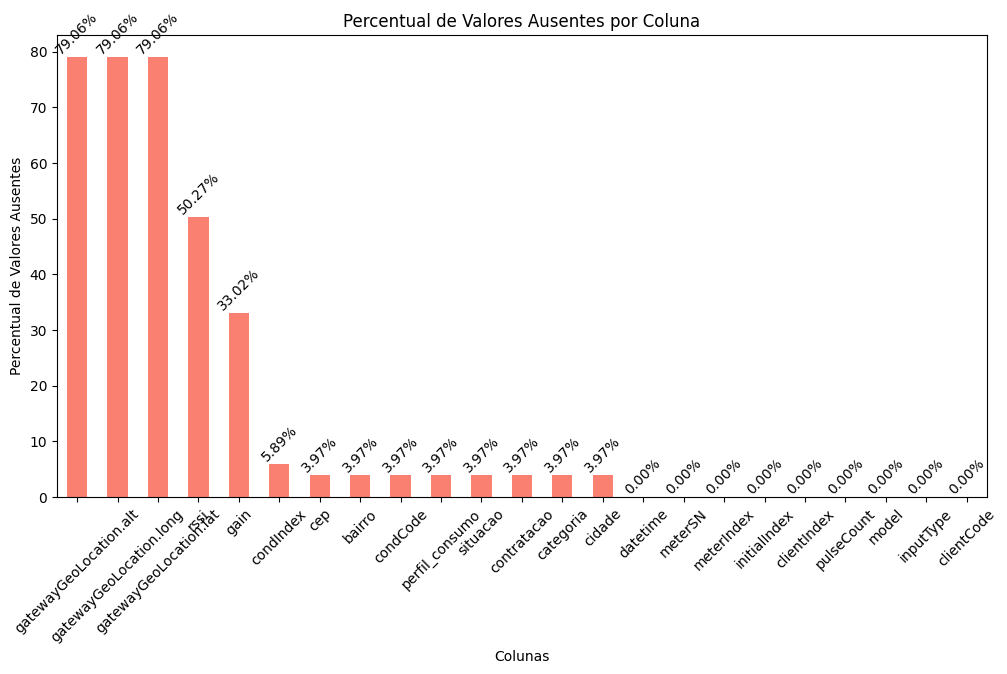

In [228]:
import matplotlib.pyplot as plt

# Calcula a porcentagem de valores ausentes em cada coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Ordena as colunas com valores ausentes em ordem decrescente
missing_percentage = missing_percentage.sort_values(ascending=False)

# Cria um gráfico de barras com as porcentagens de valores ausentes
plt.figure(figsize=(12, 6))
bars = missing_percentage.plot(kind="bar", color="salmon")
plt.title("Percentual de Valores Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("Percentual de Valores Ausentes")
plt.xticks(rotation=45)

# Adiciona os números de valores nulos na diagonal
for bar, missing_count in zip(bars.patches, missing_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{missing_count:.2f}%",
        ha="center",
        va="bottom",
        rotation=45,
    )

plt.show()

As colunas de geolocalização ('gatewayGeoLocation.alt', 'gatewayGeoLocation.lat' e 'gatewayGeoLocation.long') tem quase 80% de nulos


#### Tipos de dados cada coluna


In [229]:
df.dtypes

clientCode                  object
clientIndex                  int64
meterIndex                 float64
initialIndex               float64
pulseCount                 float64
gain                       float64
datetime                    object
meterSN                     object
inputType                   object
model                       object
rssi                       float64
gatewayGeoLocation.alt     float64
gatewayGeoLocation.lat     float64
gatewayGeoLocation.long    float64
cep                         object
bairro                      object
cidade                      object
categoria                   object
contratacao                 object
situacao                    object
perfil_consumo              object
condCode                    object
condIndex                  float64
dtype: object

In [230]:
# Separando as colunas entre identificadoras, categóricas e numéricas
id_features = ["clientCode", "clientIndex", "condCode", "condIndex", "meterSN"]
categorical_features = [
    col
    for col in df.select_dtypes(include=["object"]).columns
    if col not in id_features
]
numerical_features = [
    col
    for col in df.select_dtypes(include=["int64", "float64"]).columns
    if col not in id_features
]

# Exibindo as colunas categóricas e numéricas
print(f"{len(id_features)} id features:", id_features)
print(f"{len(categorical_features)} categorical features:", categorical_features)
print(f"{len(numerical_features)} numerical features:", numerical_features)

5 id features: ['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']
10 categorical features: ['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']
8 numerical features: ['meterIndex', 'initialIndex', 'pulseCount', 'gain', 'rssi', 'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat', 'gatewayGeoLocation.long']


### Explorando Variáveis Chave e Relações


#### Matriz de Correlação


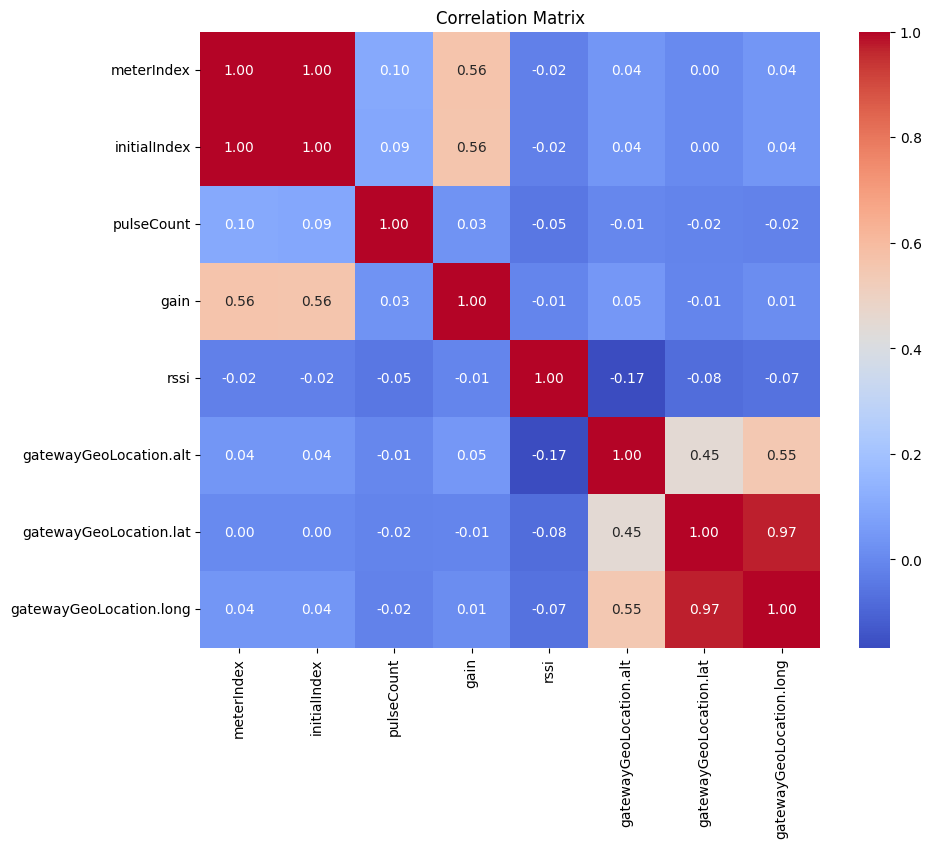

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df[numerical_features].corr()

# Cria um gráfico de calor com a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor


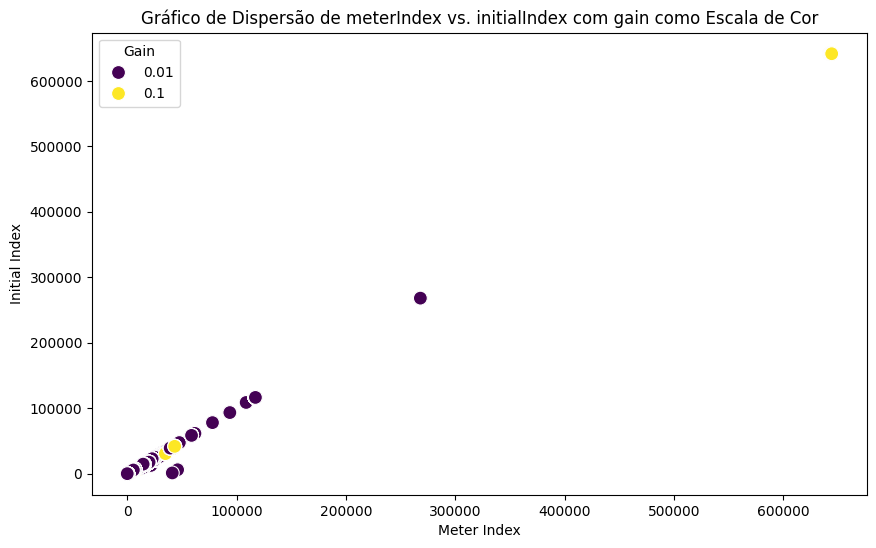

In [232]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='meterIndex', y='initialIndex', hue='gain', palette='viridis', s=100)
plt.title('Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor')
plt.xlabel('Meter Index')
plt.ylabel('Initial Index')

# Adiciona a legenda ao gráfico
scatter.legend(title='Gain')
plt.show()

#### Histograma de RSSI


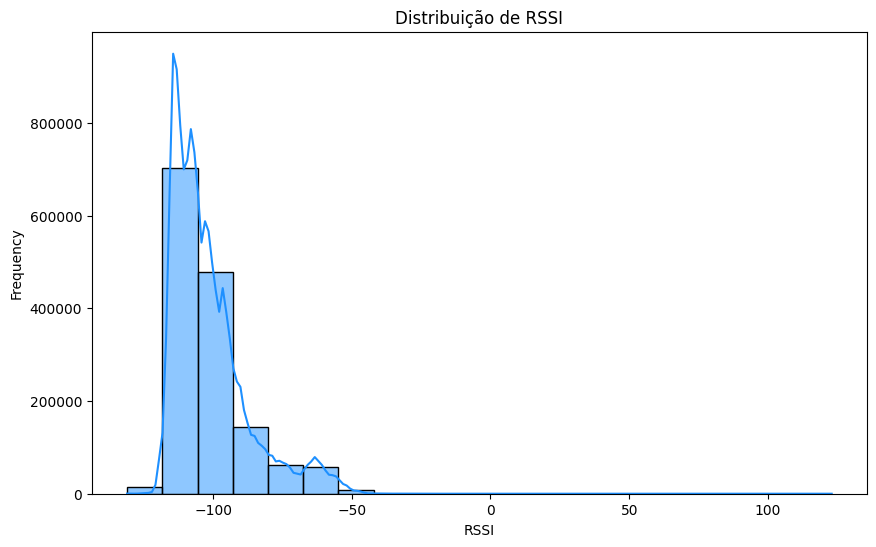

In [233]:
plt.figure(figsize=(10, 6))
sns.histplot(df["rssi"], kde=True, bins=20, color="dodgerblue")
plt.title("Distribuição de RSSI")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
plt.show()

#### Scatter Plot de Gain e Pulse Count


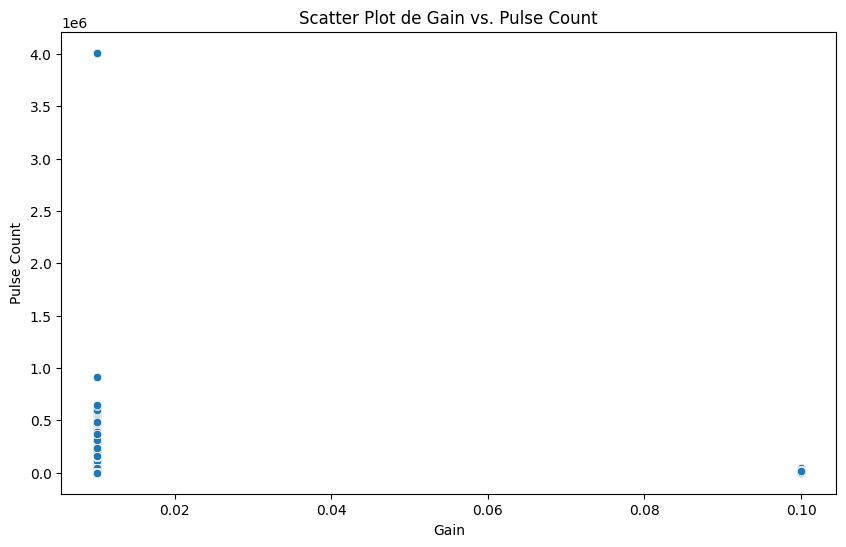

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gain", y="pulseCount")
plt.title("Scatter Plot de Gain vs. Pulse Count")
plt.xlabel("Gain")
plt.ylabel("Pulse Count")
plt.show()

Gain aparenta só ter valores de 0.1 e 0.01


In [235]:
df["gain"].value_counts()

gain
0.01    1966995
0.10       9805
Name: count, dtype: int64

#### Scatter plot de meterIndex vs. pulseCount


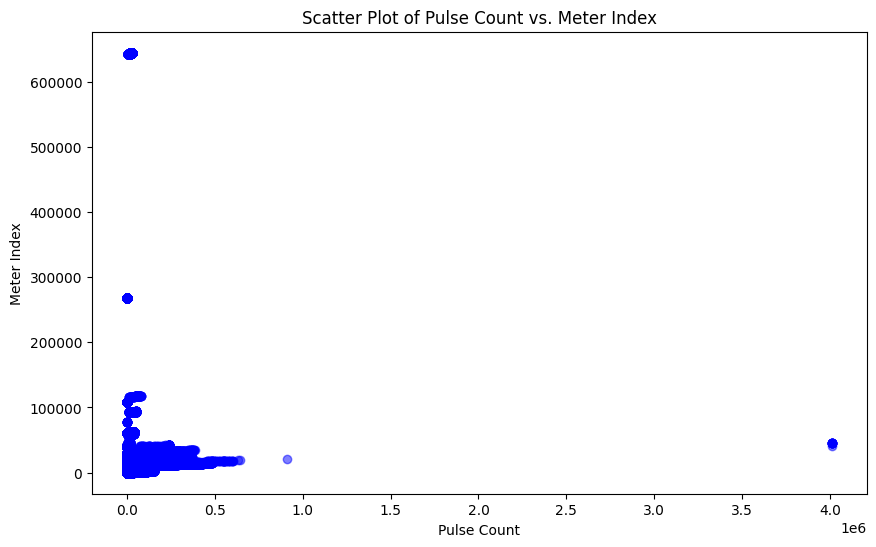

In [236]:
# Cria um gráfico de barras com a contagem de valores únicos da coluna 'gain'
plt.figure(figsize=(10, 6))
plt.scatter(df["pulseCount"], df["meterIndex"], alpha=0.5, color="blue")

# Adiciona título e rótulos aos eixos
plt.title("Scatter Plot of Pulse Count vs. Meter Index")
plt.xlabel("Pulse Count")
plt.ylabel("Meter Index")

# Exibe o gráfico
plt.show()

#### Histograma de pulseCount


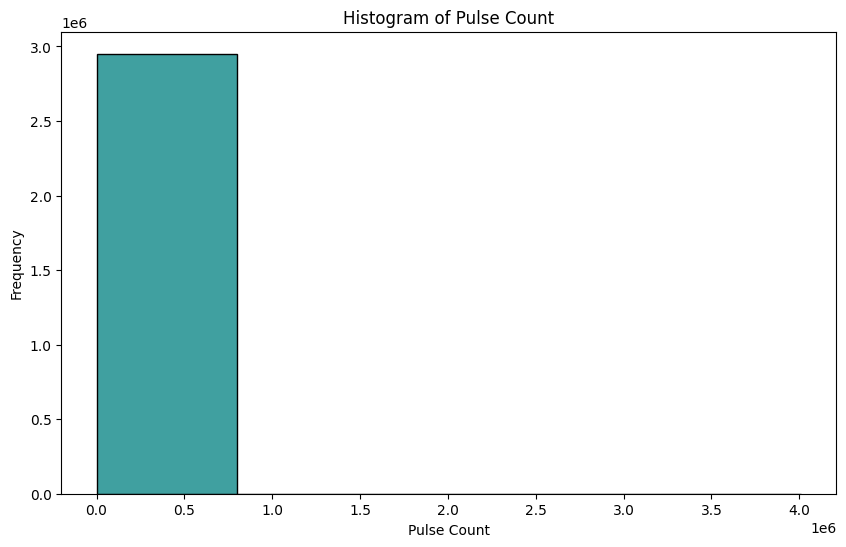

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(df["pulseCount"], bins=5, kde=False, color="teal")
plt.title("Histogram of Pulse Count")
plt.xlabel("Pulse Count")
plt.ylabel("Frequency")
plt.show()

In [238]:
df["pulseCount"].describe().round(3)

count    2951243.000
mean        3696.606
std        18996.824
min            0.000
25%           46.120
50%          378.000
75%         2574.000
max      4010299.000
Name: pulseCount, dtype: float64

#### Histograma de todas as colunas numéricas


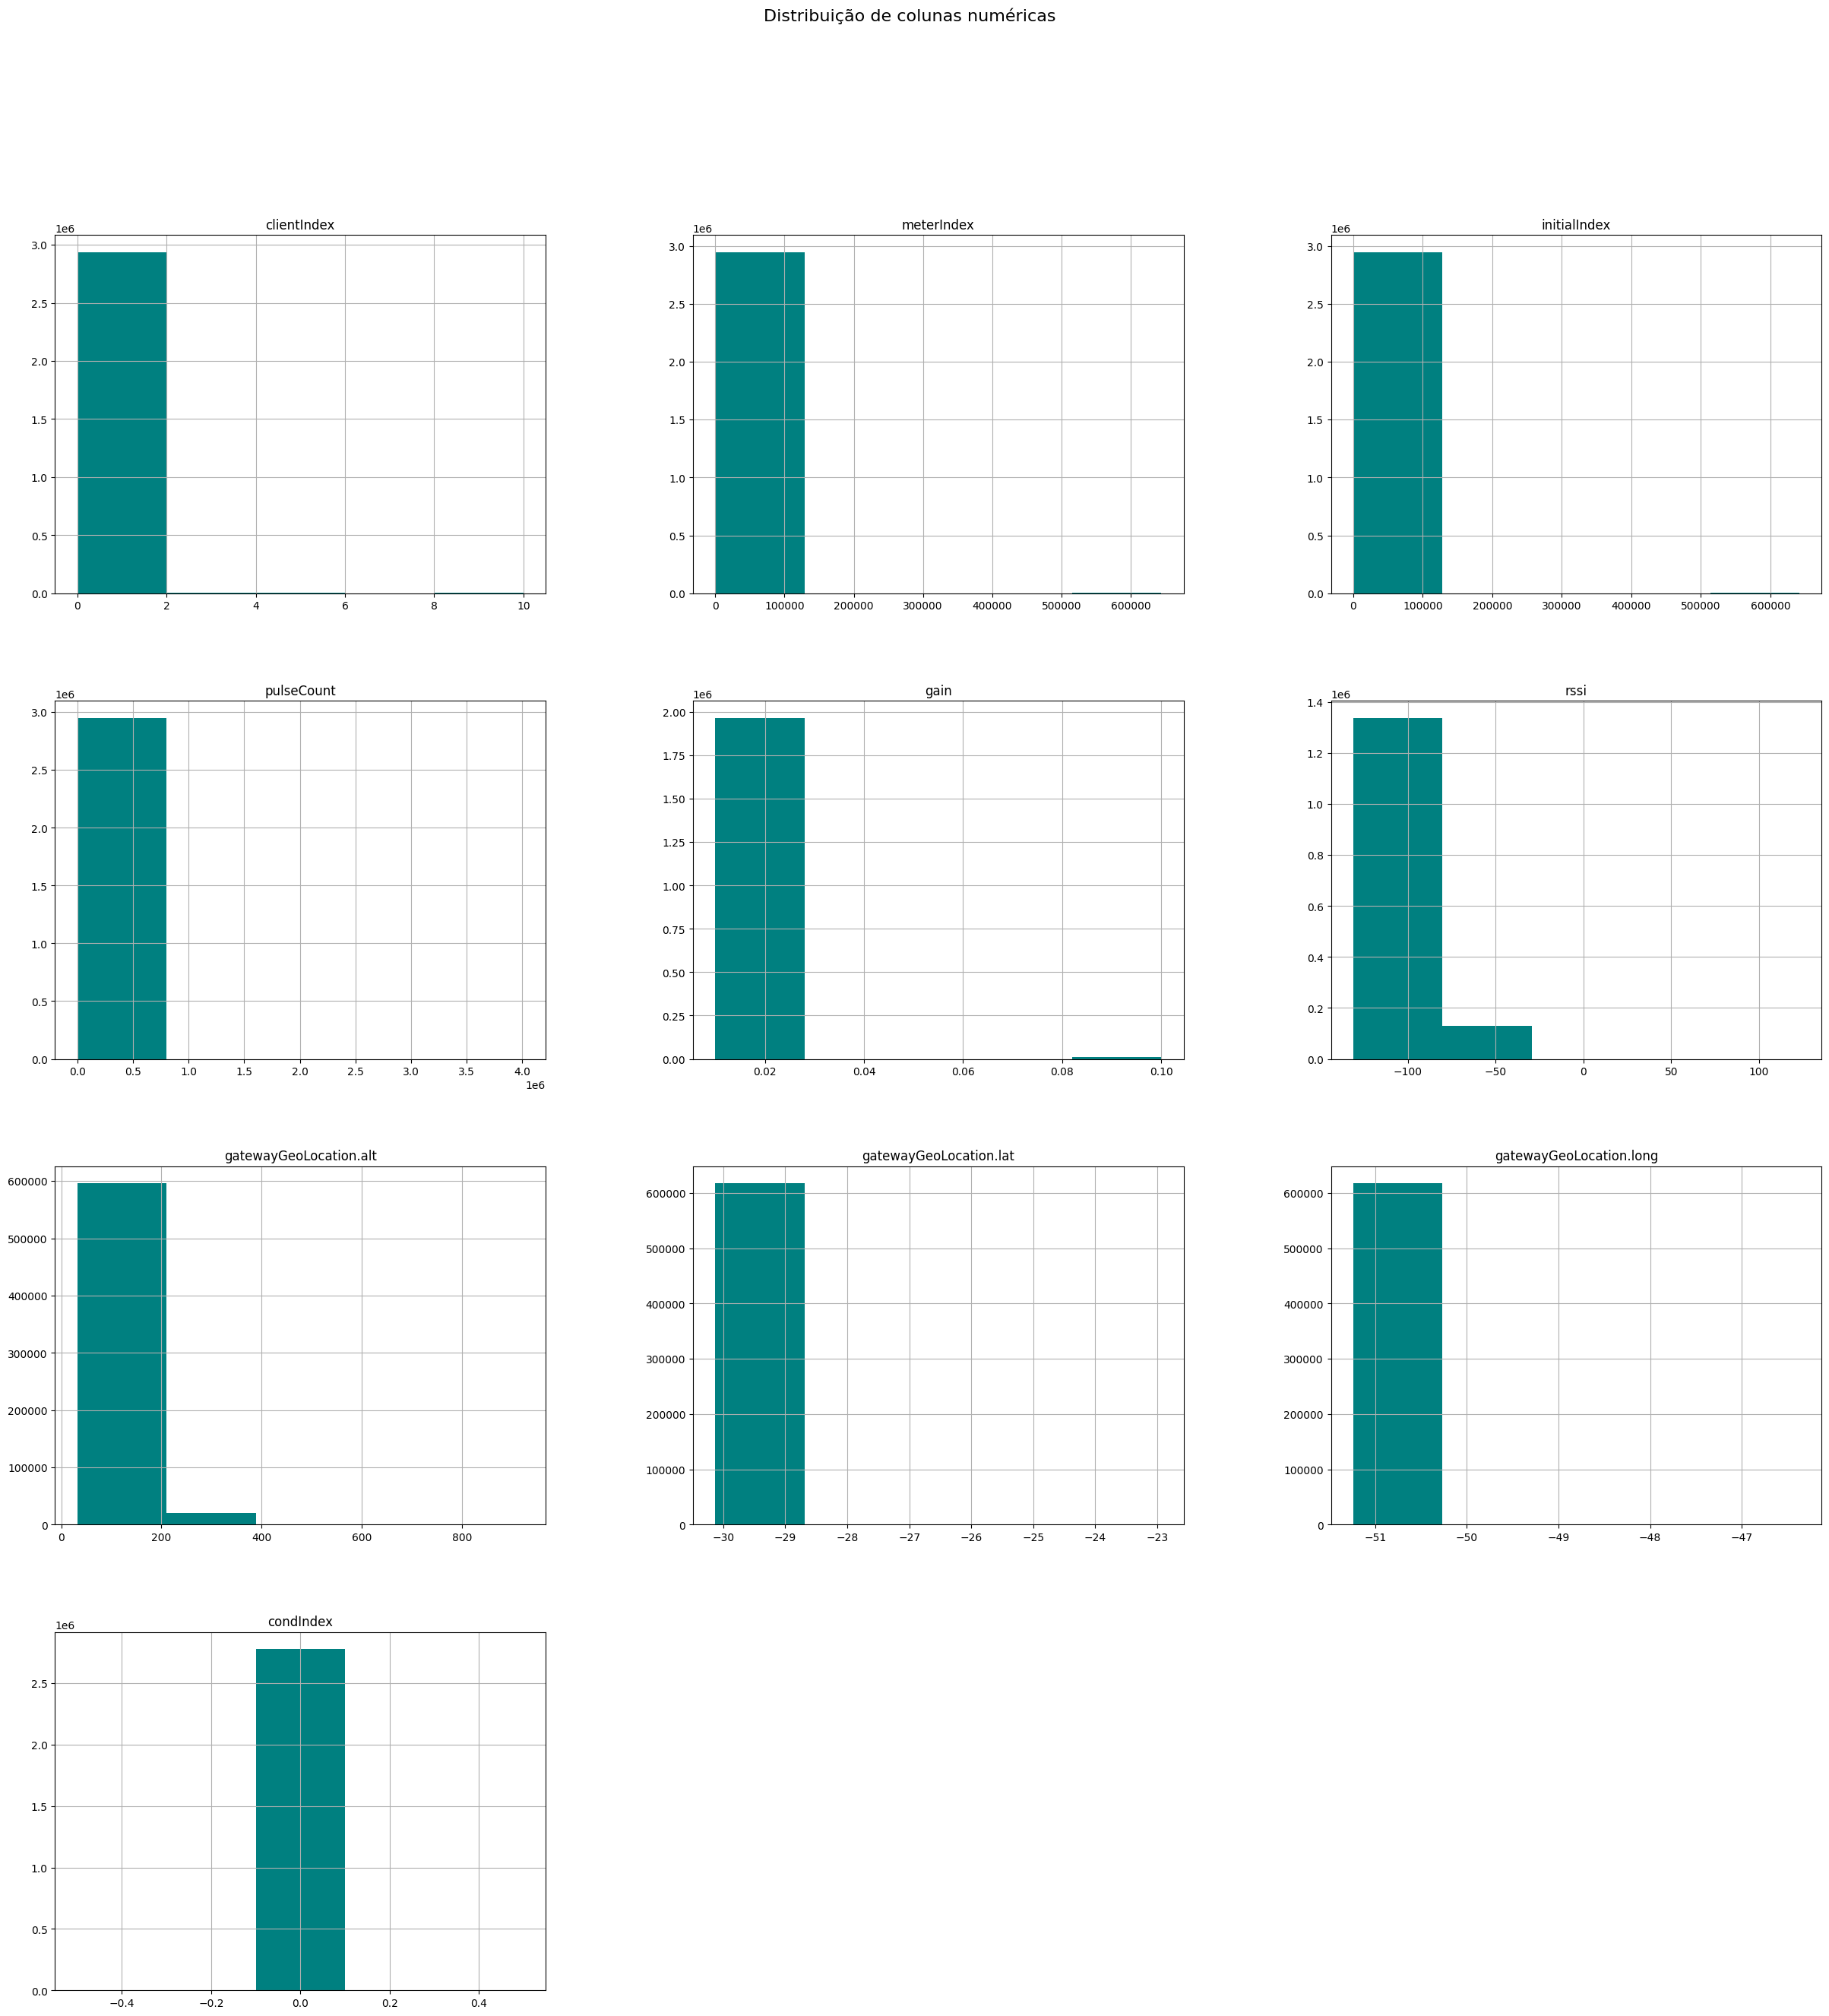

In [239]:
# Cria histogramas para todas as colunas numéricas
df.hist(bins=5, figsize=(30, 30), color="teal")
plt.suptitle("Distribuição de colunas numéricas", fontsize=16)
plt.show()

#### Gráfico de Regressão de pulseCount vs. rssi


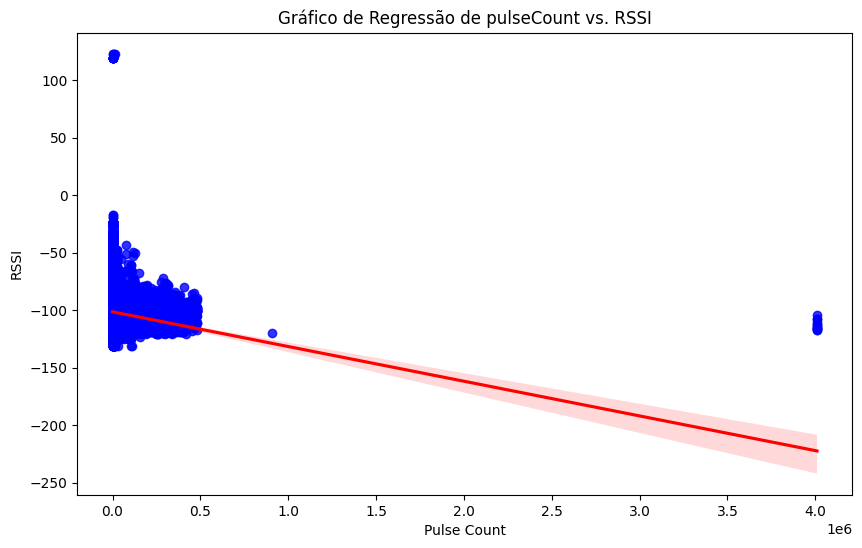

In [240]:
if generate_plots:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='pulseCount', y='rssi', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title('Gráfico de Regressão de pulseCount vs. RSSI')
    plt.xlabel('Pulse Count')
    plt.ylabel('RSSI')
    plt.show()

#### Gráfico de regressão de pulseCount vs. meterIndex


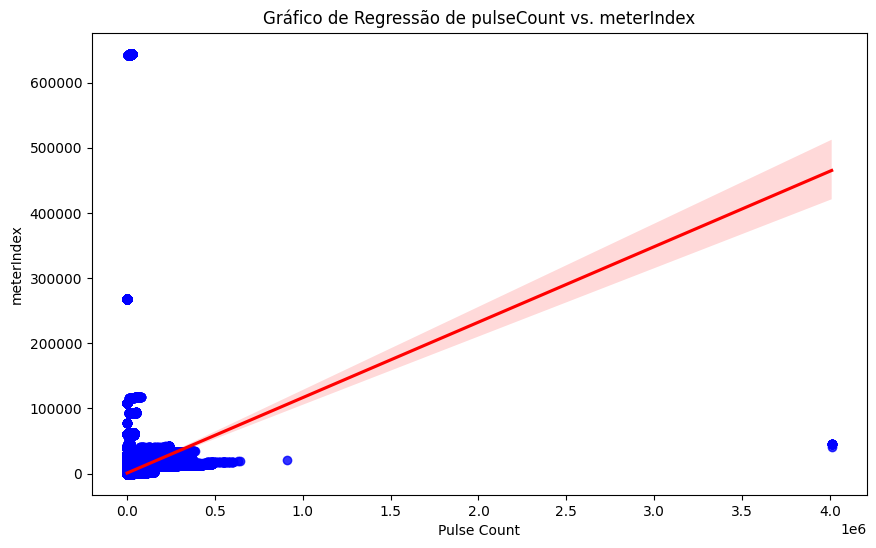

In [241]:
if generate_plots:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='pulseCount', y='meterIndex', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title('Gráfico de Regressão de pulseCount vs. meterIndex')
    plt.xlabel('Pulse Count')
    plt.ylabel('meterIndex')
    plt.show()

## 4.2.2. Pré-processamento dos Dados

O pré-processamento dos dados envolve a limpeza e transformação das variáveis para preparar o conjunto de dados para a modelagem. Nesta seção, serão abordadas as seguintes etapas: tratamento de valores ausentes, identificação de outliers e criação de novas features.


### Transformação de Dados

Para melhorar a performance dos modelos preditivos, algumas variáveis foram transformadas. A seguir estão as transformações aplicadas:

- **Normalização**: A variável `gain` foi normalizada para reduzir o impacto de escalas diferentes entre as variáveis.
- **Transformação logarítmica**: Aplicada na variável `pulseCount` para lidar com a alta variabilidade e melhorar a distribuição dos dados.
- **Codificação de variáveis categóricas**: As variáveis `inputType` e `model` foram codificadas usando one-hot encoding para permitir que os modelos utilizem essas informações.


### Tratamento de valores nulos

De acordo com o gráfico de percentual de valores ausentes por coluna e a tabela de estatística descritiva, podemos concluir que os valores nulos nas colunas 'gain' e 'rssi', poderão ser substituidos por suas respectivas média, moda ou mediana, sem afetar significativamente qualquer análise.


#### Tratando o rssi


In [242]:
rssi_mean = df["rssi"].mean()  # Calcula a média da coluna rssi
rssi_mode = df["rssi"].mode()  # Calcula a moda da coluna rssi
rssi_median = df["rssi"].median()  # Calcula a mediana da coluna rssi

print(f"Média da coluna rssi: {rssi_mean:.2f}")
print(f"Moda da coluna rssi: {rssi_mode.values[0]:.2f}")
print(f"Mediana da coluna rssi: {rssi_median:.2f}")

Média da coluna rssi: -101.48
Moda da coluna rssi: -115.00
Mediana da coluna rssi: -105.00


In [243]:
df["rssi"] = df["rssi"].replace(
    np.nan, rssi_mean
)  # Substitui os valores nulos pela média da coluna rssi

#### Tratando o gain


In [244]:
df["gain"] = df["gain"].replace(
    np.nan, 1
)  # Substitui os valores nulos pela moda da coluna gain

### Variáveis Categóricos


#### Análise


In [245]:
print(categorical_features)

['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']


In [246]:
# Dicionário para armazenar a cardinalidade de cada feature categórica
cardinalities = {}

# Loop através de cada feature categórica, excluindo 'datetime'
for feature in categorical_features:
    if feature != "datetime":  # Exclui a coluna 'datetime'
        cardinality = len(df[feature].unique())
        cardinalities[feature] = cardinality

# Ordena o dicionário pela cardinalidade em ordem decrescente
sorted_cardinalities = dict(
    sorted(cardinalities.items(), key=lambda item: item[1], reverse=True)
)

# Imprime a cardinalidade de cada feature em ordem decrescente
for feature, cardinality in sorted_cardinalities.items():
    print(f"Feature: {feature}, Cardinalidade: {cardinality}")

Feature: contratacao, Cardinalidade: 107
Feature: cep, Cardinalidade: 82
Feature: bairro, Cardinalidade: 27
Feature: inputType, Cardinalidade: 9
Feature: cidade, Cardinalidade: 8
Feature: perfil_consumo, Cardinalidade: 8
Feature: categoria, Cardinalidade: 5
Feature: situacao, Cardinalidade: 4
Feature: model, Cardinalidade: 2


In [247]:
# Imprime a cardinalidade e os primeiros 10 valores únicos de cada feature em ordem decrescente
for feature in sorted_cardinalities:
    unique_values = df[feature].unique()
    cardinality = sorted_cardinalities[feature]

    print(f"Feature: {feature}")
    print(f"Cardinalidade: {cardinality}")
    print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: contratacao
Cardinalidade: 107
Primeiros 10 Valores Únicos: ['2023-06-22' '2023-10-13' '2024-01-02' '2023-04-18' '2023-09-15'
 '2023-08-17' '2023-06-26' nan '2019-03-21' '2019-06-10']

Feature: cep
Cardinalidade: 82
Primeiros 10 Valores Únicos: ['90670-130' '90440-150' '90540-041' nan '90050-230' '90050-310'
 '90050-130' '90001-970' '90050-320' '90050-321']

Feature: bairro
Cardinalidade: 27
Primeiros 10 Valores Únicos: ['JARDIM BOTÂNICO' 'PETRÓPOLIS' 'AUXILIADORA' 'SÃO JOÃO' nan
 'CIDADE BAIXA' 'MENINO DEUS' 'MONT SERRAT' 'BOA VISTA' 'HIGIENÓPOLIS']

Feature: inputType
Cardinalidade: 9
Primeiros 10 Valores Únicos: ['DI1' 'DI4' 'DI3' 'DI2' 'DI8' 'DI7' 'DI6' 'DI5' 'leituraRemota']

Feature: cidade
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['PORTO ALEGRE' nan 'SÃO LEOPOLDO' 'SAO LEOPOLDO' 'NOVO HAMBURGO' 'CANOAS'
 'GRAVATAÍ' 'GRAVATAI']

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção

In [248]:
df["perfil_consumo"].value_counts()  # Mostra os perfis de consumo

perfil_consumo
Cocção + Aquecedor              2545760
Cocção                           262445
-                                 15382
Aquecedor                          3157
Cocção + Caldeira                  2868
Caldeira                           2520
Cocção + Aquecedor + Piscina       2023
Name: count, dtype: int64

Percebe-se que, na verdade, há apenas 3 categorias em perfil de consumo: Aquecedor, Cocção, e Piscina.


Contratação, CEP e bairro possuem alta cardinalidades vamos ter que tratar de alguma forma diferente.

Para a contratação podemos criar uma feature de dias desde a contratação.

Para o CEP podemos remover o '-' e tratar como número, uma vez que números próximos de CEP possuem também proximidade geográfia (i.e. o CEP '22000-200' é mais próximo geográficamente de '23200-200' do que de '12200-200').
Já para o bairro


Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros.
Assim transformaremos os demais bairros em uma coluna de "outros".


#### Entedimento


As colunas apresentam baixa cardinalidade, a maior sendo 'inputType' com 9 categorias diferentes, e nenhuma sendo ordinal.
Assim usaremos OneHotEncoding (OHE) em todas elas (exceto 'perfil_consumo', 'CEP', 'bairro' e 'contratacao'), a fim de preservar ao máximo a informação contida nas variáveis.


No caso do perfil de consumo ('perfil_consumo'), é possível perceber que existem apenas 3 categorias reais (Aquecedor, Cocção e Piscina), assim criaremos 3 colunas binárias, onde 1 indicará que o cliente possui, mas não necessariamente de forma exclusiva, aquele perfil.


#### Codificação


In [249]:
# Criando df_encoded para preservar o df original
df_encoded = df.copy()

##### Transformação da data para o formato unix timestamp


In [250]:
df["datetime"] = pd.to_datetime(
    df["datetime"]
)  # Converte a coluna datetime para o formato datetime

df["timestamp"] = df["datetime"].apply(
    lambda x: x.timestamp() if pd.notnull(x) else None
)  # Cria uma nova coluna derivada da coluna datetime no DataFrame com os valores convertidos para timestamp, ignorando os valores nulos

##### Enconding Geral (OneHotEncoder)


In [251]:
# Remover as colunas que terão um tratamento diferente
ohe_categorical_cols = [
    col
    for col in categorical_features
    if col not in ["datetime", "perfil_consumo", "cep", "bairro", "contratacao"]
]

# Aplicar OneHotEncoder nas colunas selecionadas, mantendo o prefixo da variável original
df_encoded_ohe = pd.get_dummies(
    df_encoded[ohe_categorical_cols], prefix=ohe_categorical_cols
)

# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_new_columns = df_encoded_ohe.shape[1]
num_initial_columns = len(ohe_categorical_cols)
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Quantidade inicial de colunas categóricas codificadas: {num_initial_columns}")
print(f"Número de novas colunas geradas pelo One-Hot Encoding: {num_new_columns}")
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(
    f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}"
)


# Exibir as primeiras linhas das novas colunas geradas
print("\nVisualização das novas colunas geradas:")
print(df_encoded_ohe.head())

# Manter as colunas que não foram codificadas
df_remaining = df_encoded.drop(columns=ohe_categorical_cols)

# Concatenar as colunas codificadas com as restantes do DataFrame
df_encoded = pd.concat([df_remaining, df_encoded_ohe], axis=1)

# Verificação final: Exibir as primeiras linhas do DataFrame completo
print("Primeiras linhas do DataFrame completo com todas as colunas:")
print(df_encoded.head())

Quantidade inicial de colunas categóricas codificadas: 5
Número de novas colunas geradas pelo One-Hot Encoding: 25
Número total de colunas antes da codificação (df): 23
Número total de colunas após a codificação (df_encoded): 23

Visualização das novas colunas geradas:
   inputType_DI1  inputType_DI2  inputType_DI3  inputType_DI4  inputType_DI5  \
0           True          False          False          False          False   
1           True          False          False          False          False   
2           True          False          False          False          False   
3          False          False          False           True          False   
4          False          False          False           True          False   

   inputType_DI6  inputType_DI7  inputType_DI8  inputType_leituraRemota  \
0          False          False          False                    False   
1          False          False          False                    False   
2          False        

##### Encoding 'contratação'


In [252]:
# Calcular o número de valores NaN em 'contratacao'
num_nan_contratacao = df_encoded["contratacao"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_nan_contratacao = (num_nan_contratacao / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'contratacao': {num_nan_contratacao}")
print(f"Percentual de valores NaN em 'contratacao': {percentual_nan_contratacao:.2f}%")

Número de valores NaN em 'contratacao': 117088
Percentual de valores NaN em 'contratacao': 3.97%


Para realizar o encoding de 'contratacao', vamos transformar a data de contratação em uma feature nova: número de dias desde a contrataçao ('dias_desde_contratacao'), tendo como data de referência o último dado disponível na base de dados, e tratando-a como 'int' daqui pra frente.

Depois, iremos inputar os dados nulos pela mediana e criar uma coluna binária 'contratacao_isnan' que persiste a inforamção de quais linhas eram nulas nessa coluna.


In [253]:
# Converter as colunas 'contratacao' e 'datetime' para formato datetime
df_encoded["contratacao"] = pd.to_datetime(df_encoded["contratacao"], errors="coerce")
df_encoded["datetime"] = pd.to_datetime(df_encoded["datetime"], errors="coerce")

# Encontrar o último dia de contratação (ignorando NaNs)
ultimo_dia_contratacao = df_encoded["contratacao"].max()

# Encontrar o último timestamp (ignorando NaNs)
ultimo_timestamp = df_encoded["datetime"].max()

# Exibir as datas encontradas
print(f"Último dia de contratação: {ultimo_dia_contratacao}")
print(f"Último datetime: {ultimo_timestamp}")

Último dia de contratação: 2024-04-30 00:00:00
Último datetime: 2024-06-30 23:59:54


Vamos usar o último 'datetime' (variável 'ultimo_timestamp') como data de referência para nossa feature!


In [254]:
# Passo 1: Converter a coluna 'contratacao' para o formato datetime
df_encoded["contratacao"] = pd.to_datetime(df_encoded["contratacao"], errors="coerce")

# Passo 2: Calcular o número de dias até a data de referência
data_referencia = ultimo_timestamp  # Último timestamp encontrado
df_encoded["dias_ate_referencia"] = (
    data_referencia - df_encoded["contratacao"]
).dt.days

# Passo 3: Criar a coluna binária 'contratacao_nan' para indicar valores NaN originais
df_encoded["contratacao_nan"] = df_encoded["dias_ate_referencia"].isna().astype(int)

# Passo 4: Substituir os valores NaN pela mediana
mediana_dias = df_encoded["dias_ate_referencia"].median()
df_encoded["dias_ate_referencia"] = df_encoded["dias_ate_referencia"].fillna(
    mediana_dias
)

# Verificar a nova feature e a coluna binária
print(df_encoded[["contratacao", "dias_ate_referencia", "contratacao_nan"]].head())

# Remover a coluna original 'contratacao'
df_encoded.drop(columns=["contratacao"], inplace=True)

# Contar o número de valores 1 na coluna 'contratacao_nan'
num_contratacao_nan_ones = df_encoded["contratacao_nan"].sum()
print(f"\nNúmero de valores 1 na coluna 'contratacao_nan': {num_contratacao_nan_ones}")
print(
    f"Percentual de valores NaN em 'contratacao_nan': {num_contratacao_nan_ones/len(df_encoded):.2%}"
)

  contratacao  dias_ate_referencia  contratacao_nan
0  2023-06-22                374.0                0
1  2023-06-22                374.0                0
2  2023-06-22                374.0                0
3  2023-06-22                374.0                0
4  2023-06-22                374.0                0

Número de valores 1 na coluna 'contratacao_nan': 117088
Percentual de valores NaN em 'contratacao_nan': 3.97%


##### Encoding 'cep'


In [255]:
# Calcular o número de valores NaN em 'cep'
num_nan_cep = df_encoded["cep"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_cep = (num_nan_cep / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Para 'cep' vamos substituir os valores 'nan' por 0, após isso retirar o hífen e tratar os valores como 'int', conforme a explicação na seção de entendimento.


In [256]:
# Passo 1: Remover hífens e espaços em branco do CEP
df_encoded["cep_cleaned"] = df_encoded["cep"].str.replace("-", "").str.strip()

# Passo 2: Substituir strings vazias ou espaços em branco por NaN
df_encoded["cep_cleaned"] = df_encoded["cep_cleaned"].replace("", float("nan"))

# Passo 3: Substituir NaNs por um valor adequado, por exemplo, 0
df_encoded["cep_cleaned"] = df_encoded["cep_cleaned"].fillna("0")

# Passo 4: Converter a coluna limpa para inteiro
df_encoded["cep"] = df_encoded["cep_cleaned"].astype(int)

# Passo 5: Remover a coluna 'cep_cleaned'
df_encoded = df_encoded.drop(columns=["cep_cleaned"])

# Verificar as primeiras linhas para garantir que a conversão foi bem-sucedida
print(df_encoded["cep"].value_counts())

cep
94035330    348372
90035190    266360
90420180    234037
90050102    219001
90830180    218027
             ...  
90020004       172
90030131       158
90010320       144
90010272        31
90010030        20
Name: count, Length: 77, dtype: int64


In [257]:
# Contar o número de ocorrências onde o CEP é igual a 0
count_cep_zero = (df_encoded["cep"] == 0).sum()

# Calcular o percentual que isso representa em relação ao total de linhas
percent_cep_zero = (count_cep_zero / len(df_encoded)) * 100

print(f"Contagem de valores onde o CEP é igual a 0 pós-encoding: {count_cep_zero}")
print(
    f"Percentual de valores onde o CEP é igual a 0 pós-encoding: {percent_cep_zero:.2f}%"
)

print(f"\nNúmero de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Contagem de valores onde o CEP é igual a 0 pós-encoding: 119018
Percentual de valores onde o CEP é igual a 0 pós-encoding: 4.03%

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Realizamos o encoding, mas algo não parece certo... apareceram cerca de 2 mil linhas a mais como zero em relação ao número de NaNs inicial em 'cep'.

Vamos investigar:


In [258]:
# Remover espaços em branco e verificar se os valores são apenas '-' ou strings vazias após o strip
df["cep_cleaned"] = df["cep"].str.strip()

# Contar o número de ocorrências onde o CEP é apenas '-' ou uma string vazia
count_hyphen_or_empty = ((df["cep_cleaned"] == "-") | (df["cep_cleaned"] == "")).sum()

print(
    f"Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: {count_hyphen_or_empty}"
)
print(f"Diferença não explicada pré e pós encoding: {count_cep_zero - num_nan_cep}")

Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: 1930
Diferença não explicada pré e pós encoding: 1930


Conseguimos justificar. Os casos eram preenchimentos que estavam somente com espaços ou hífen, assim, após o 'strip()' (que remove espaços) podemos ver que eram, na verdade, células não-preenchidas.

Podemos remover o df['cep_cleand'] agora.


In [259]:
df = df.drop(columns="cep_cleaned")

##### Encoding 'bairro'


In [260]:
df_encoded["bairro"].value_counts()

bairro
CENTRO              495998
JARDIM BOTÂNICO     349416
BOM FIM             294862
RIO BRANCO          253296
CIDADE BAIXA        227235
NONOAI              218027
MONT SERRAT         208410
BOA VISTA           163164
SANTA CECÍLIA       139240
CRISTAL             123159
PETRÓPOLIS           65929
SÃO JOÃO             46010
PASSO DA AREIA       44971
AUXILIADORA          42928
BELA VISTA           42514
CENTRO HISTÓRICO     39401
MENINO DEUS          24342
CRISTO REDENTOR      24273
MOINHOS DE VENTO      9688
JARDIM DO SALSO       9197
HIGIENÓPOLIS          6382
PASSO D'AREIA         2281
SARANDI               1307
INDEPENDÊNCIA         1009
TRÊS FIGUEIRAS         579
TRISTEZA               537
Name: count, dtype: int64

In [261]:
# Calcular o número de valores NaN em 'bairro'
num_nan_bairro = df_encoded["bairro"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_bairro = (num_nan_bairro / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'bairro' pré-encoding: {num_nan_bairro}")
print(
    f"Percentual de valores NaN em 'bairro' pré-encoding: {percentual_num_nan_bairro:.2f}%"
)

Número de valores NaN em 'bairro' pré-encoding: 117088
Percentual de valores NaN em 'bairro' pré-encoding: 3.97%


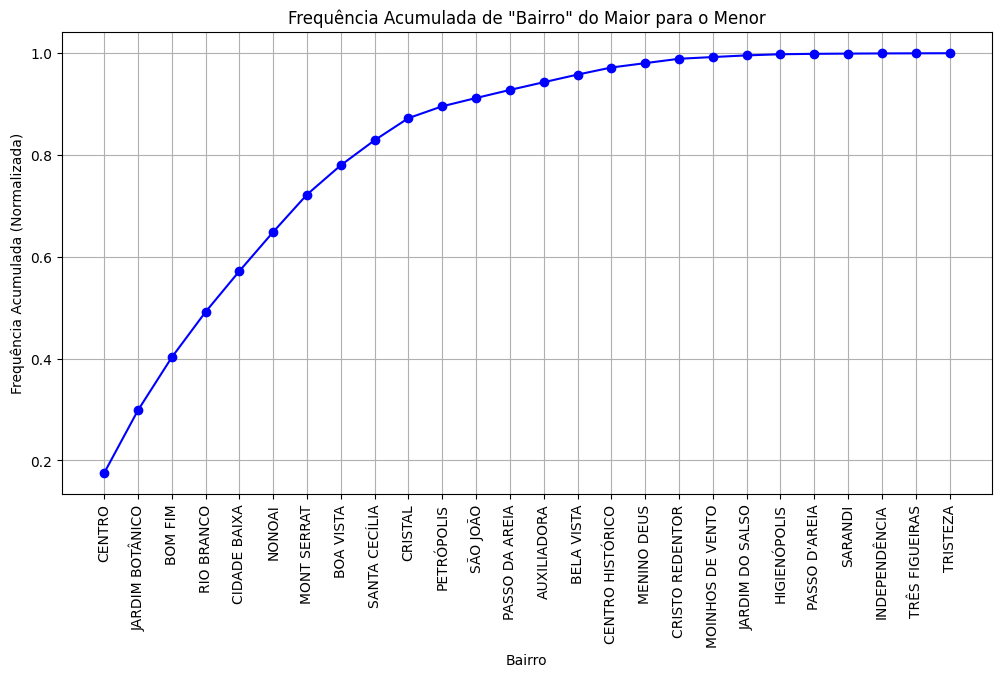

In [262]:
# Passo 1: Calcular a frequência de cada categoria na coluna 'bairro' e ordenar
frequencia_bairro = df_encoded["bairro"].value_counts().sort_values(ascending=False)

# Calcular a frequência acumulada
frequencia_acumulada = frequencia_bairro.cumsum()

# Normalizar a frequência acumulada para obter a proporção (entre 0 e 1)
frequencia_acumulada = frequencia_acumulada / frequencia_acumulada.max()

# Passo 2: Plotar a frequência acumulada
plt.figure(figsize=(12, 6))
plt.plot(frequencia_acumulada, marker="o", linestyle="-", color="b")
plt.title('Frequência Acumulada de "Bairro" do Maior para o Menor')
plt.xlabel("Bairro")
plt.ylabel("Frequência Acumulada (Normalizada)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros.
Assim transformaremos os demais bairros em uma coluna de "outros".


In [263]:
# Obter os 9 principais bairros
top_9_bairros = frequencia_bairro.head(9).index

# Passo 2: Substituir os bairros que não estão entre os 9 principais por "Outros"
df_encoded["bairro"] = df_encoded["bairro"].apply(
    lambda x: x if x in top_9_bairros else "Outros"
)

# Passo 3: Verificar o resultado
print(df_encoded["bairro"].value_counts())

bairro
Outros             601595
CENTRO             495998
JARDIM BOTÂNICO    349416
BOM FIM            294862
RIO BRANCO         253296
CIDADE BAIXA       227235
NONOAI             218027
MONT SERRAT        208410
BOA VISTA          163164
SANTA CECÍLIA      139240
Name: count, dtype: int64


In [264]:
# Contar o número de ocorrências de "Outros"
outros_count = df_encoded["bairro"].value_counts()["Outros"]

# Contar o total de registros
total_count = len(df_encoded)

# Calcular o percentual de "Outros" em relação ao total
percent_outros = (outros_count / total_count) * 100

# Imprimir o resultado
print(f"Número de registros como 'Outros': {outros_count}")
print(f"Percentual de 'Outros' em relação ao total: {percent_outros:.2f}%")

Número de registros como 'Outros': 601595
Percentual de 'Outros' em relação ao total: 20.38%


'Outros' é 20% dos casos, como queríamos, a diferença em relação ao gráfico é por causa dos 3.97% de casos nulos. Esses casos não serão 'True' (1) em nenhuma das colunas binárias após o OHE, assim, preservaremos a informação de queram nulos.


Agora só precisamos fazer o OHE das categorias restantes:


In [265]:
# Passo 1: Aplicar o One-Hot Encoding na coluna 'bairro'
bairro_dummies = pd.get_dummies(df_encoded["bairro"], prefix="bairro")

# Passo 2: Remover a coluna original 'bairro'
df_encoded = df_encoded.drop(columns=["bairro"])

# Passo 3: Adicionar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df_encoded, bairro_dummies], axis=1)

In [266]:
# Vamos exibir todas as colunas que começam com 'bairro_' para ver como ficou a codificação
print(f"Número de Colunas: {len(df_encoded.filter(like='bairro_').columns)}")
print(f"Colunas: {df_encoded.filter(like='bairro_').columns}")

Número de Colunas: 10
Colunas: Index(['bairro_BOA VISTA', 'bairro_BOM FIM', 'bairro_CENTRO',
       'bairro_CIDADE BAIXA', 'bairro_JARDIM BOTÂNICO', 'bairro_MONT SERRAT',
       'bairro_NONOAI', 'bairro_Outros', 'bairro_RIO BRANCO',
       'bairro_SANTA CECÍLIA'],
      dtype='object')


In [267]:
# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(
    f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}"
)

Número total de colunas antes da codificação (df): 53
Número total de colunas após a codificação (df_encoded): 53


##### Encoding 'perfil_consumo'


Relembrando as categorias de 'perfil_consumo'


In [268]:
feature = "perfil_consumo"
unique_values = df_encoded[feature].unique()
cardinality = sorted_cardinalities[feature]

print(f"Feature: {feature}")
print(f"Cardinalidade: {cardinality}")
print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção'
 'Caldeira' 'Cocção + Aquecedor + Piscina']



In [269]:
# Passo 1: Criar as colunas binárias para cada perfil de consumo
df_encoded["perfil_aquecedor"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Aquecedor" in str(x) else 0
)
df_encoded["perfil_coccao"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Cocção" in str(x) else 0
)
df_encoded["perfil_piscina"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Piscina" in str(x) else 0
)

# Passo 2: Verificar o resultado
print(
    df_encoded[
        ["perfil_consumo", "perfil_aquecedor", "perfil_coccao", "perfil_piscina"]
    ].sample(20)
)

# Passo 3: Remover a coluna original 'perfil_consumo'
df_encoded = df_encoded.drop(columns=["perfil_consumo"])

             perfil_consumo  perfil_aquecedor  perfil_coccao  perfil_piscina
1253621  Cocção + Aquecedor                 1              1               0
1648759  Cocção + Aquecedor                 1              1               0
1156413              Cocção                 0              1               0
1833358              Cocção                 0              1               0
1263131  Cocção + Aquecedor                 1              1               0
1232265  Cocção + Aquecedor                 1              1               0
335932   Cocção + Aquecedor                 1              1               0
2159686  Cocção + Aquecedor                 1              1               0
845547   Cocção + Aquecedor                 1              1               0
411669   Cocção + Aquecedor                 1              1               0
1226085              Cocção                 0              1               0
53362                   NaN                 0              0               0

Nota: não precisamos alterar os valores 'nan' ou '-', vistos nos valores únicos printados acima, porque esses valores serão codificados como 'False' nas 3 colunas binárias criadas para 'perfil_consumo'.


In [270]:
# Calcular os percentuais de True (1) em cada coluna de perfil
percentuais_perfil = (
    df_encoded[["perfil_aquecedor", "perfil_coccao", "perfil_piscina"]].mean() * 100
)

# Exibir os percentuais
print("Percentuais de True (1) em cada coluna de perfil:")
print(percentuais_perfil)

# Filtrar os casos onde todos os 3 perfis são False (0)
casos_sem_perfil = df_encoded[
    (df_encoded["perfil_aquecedor"] == 0)
    & (df_encoded["perfil_coccao"] == 0)
    & (df_encoded["perfil_piscina"] == 0)
]

# Calcular e exibir o percentual de casos onde todos os perfis são False
percentual_sem_perfil = (casos_sem_perfil.shape[0] / len(df_encoded)) * 100
print(
    f"\nPercentual de casos onde todos os perfis são False (0): {percentual_sem_perfil:.2f}%"
)

Percentuais de True (1) em cada coluna de perfil:
perfil_aquecedor    86.436122
perfil_coccao       95.319023
perfil_piscina       0.068547
dtype: float64

Percentual de casos onde todos os perfis são False (0): 4.57%


### Variáveis Numéricas


#### Análise


In [271]:
df_encoded[numerical_features].describe().apply(
    lambda x: x.apply("{:.2f}".format)
)  # Mostra as estatisticas descritivas das colunas numéricas

meterIndex initialIndex  pulseCount        gain        rssi  \
count  2951243.00   2951243.00  2951243.00  2951243.00  2951243.00   
mean      1387.27      1324.94     3696.61        0.34     -101.48   
std      21438.47     21359.00    18996.82        0.47        9.72   
min        -89.00       -89.00        0.00        0.01     -131.00   
25%         10.53         0.00       46.12        0.01     -105.00   
50%         35.09         2.87      378.00        0.01     -101.48   
75%         90.30        19.41     2574.00        1.00     -101.48   
max     644396.63    641554.33  4010299.00        1.00      123.00   

      gatewayGeoLocation.alt gatewayGeoLocation.lat gatewayGeoLocation.long  
count              618081.00              618081.00               618081.00  
mean                   96.69                 -30.02                  -51.20  
std                    59.80                   0.27                    0.19  
min                    32.00                 -30.13                  -51.24  
25%                    65.00                 -30.09                  -51.23  
50%                    91.00                 -30.03                  -51.23  
75%                   103.00                 -30.03                  -51.19  
max                   923.00                 -22.94                  -46.37

In [272]:
# Obtenha as estatísticas descritivas
stats = df_encoded[numerical_features].describe()

# Calcule a razão do desvio-padrão sobre a média para cada coluna numérica
std_dev_to_mean_ratio = stats.loc["std"] / stats.loc["mean"]

print(std_dev_to_mean_ratio)

meterIndex                 15.453744
initialIndex               16.120766
pulseCount                  5.138991
gain                        1.380263
rssi                       -0.095768
gatewayGeoLocation.alt      0.618449
gatewayGeoLocation.lat     -0.009142
gatewayGeoLocation.long    -0.003748
dtype: float64


Podemos notar que das variáveis numéricas iniciais (antes da codificação das variáveis categóricas) a 'pulseCount' se sobressai pelo seu alto desvio-padrão, por isso aplicaremos uma transformação logarítmica.


#### Codificação


##### Transformação logarítmica da coluna pulseCount


In [273]:
# Aplica a transformação logarítmica na coluna pulseCount e salvar no df_encoded
df_encoded["log_pulseCount"] = np.log1p(
    df_encoded["pulseCount"]
)  # Aplica a transformação logarítmica na coluna pulseCount

# Verifica algumas linhas aleatórias para garantir que a transformação foi bem-sucedida
print(df_encoded[["pulseCount", "log_pulseCount"]].sample(10))

         pulseCount  log_pulseCount
1236359      101.26        4.627519
571336       768.00        6.645091
1163043      707.00        6.562444
1958087     2949.00        7.989560
1624744      133.93        4.904756
2006998     8054.00        8.994048
1259384      102.49        4.639475
1979289     9718.00        9.181838
829359      4251.00        8.355145
1160652     2942.00        7.987185


##### Normalização da Variável Gain


In [274]:
# Normalização da variável gain
df_encoded["gain"] = (df_encoded["gain"] - df_encoded["gain"].mean()) / df_encoded[
    "gain"
].std()

#### Entendimento


In [275]:
# Obtém os tipos de dados das colunas
dtypes = df_encoded.dtypes

# Cria listas de colunas com base no dtype
object_cols = [col for col in dtypes.index if dtypes[col] == "object"]
non_object_cols = [col for col in dtypes.index if dtypes[col] != "object"]

# Cria a lista de colunas ordenada
sorted_cols = object_cols + non_object_cols

# Reordena o DataFrame conforme a lista ordenada
df_sorted = df_encoded[sorted_cols]

print("Informações do dataframe codificado (df_encoded) ordenado pelo data type:\n")
print(df_sorted.info())

Informações do dataframe codificado (df_encoded) ordenado pelo data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951243 entries, 0 to 2951242
Data columns (total 56 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   clientCode                              object        
 1   meterSN                                 object        
 2   condCode                                object        
 3   clientIndex                             int64         
 4   meterIndex                              float64       
 5   initialIndex                            float64       
 6   pulseCount                              float64       
 7   gain                                    float64       
 8   datetime                                datetime64[ns]
 9   rssi                                    float64       
 10  gatewayGeoLocation.alt                  float64       
 11  gatewayGeoLocation.lat     

Podemos notar que as únicas colunas que não são númericas são as colunas identificadores ('id_features'), assim nossa codificação está completa!

Nota: poderíamos utilizar um escalador (como o MinMaxScaler do Sklearn) nas colunas a partir de agora, mas escolhemos preservar a escala dos dados para manter a interpretabilidade e evitar limitações para a próxima etapa de feature engineering e criação de modelos.


In [276]:
print(id_features)

['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']


### Tratamento de Outliers


Neste projeto, os outliers não serão removidos, pois o foco é identificar anomalias no consumo de gás. Em vez disso, estamos tratando os outliers como casos de interesse que precisam ser analisados e modelados adequadamente. A seguir, são apresentadas as técnicas utilizadas para a detecção e análise desses outliers.


##### Visualização de Outliers


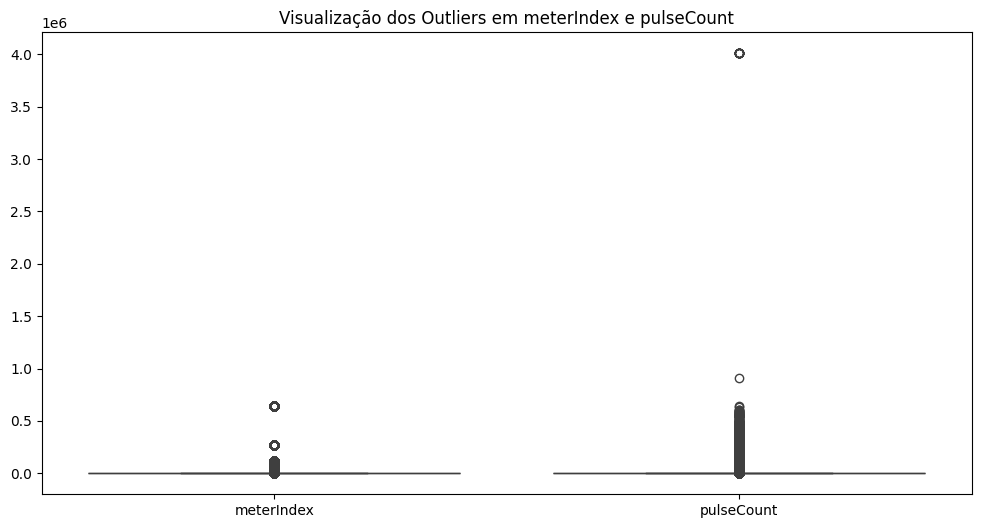

In [277]:
# Visualização dos outliers em meterIndex e pulseCount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['meterIndex', 'pulseCount']])
plt.title('Visualização dos Outliers em meterIndex e pulseCount')
plt.show()

# **Sprint 3**

## 4.3. Preparação dos Dados e Modelagem

Nesta seção, será criada a primeira versão do modelo preditivo, as escolhas de features e resultados serão explicados e analisados.

### 4.3.1. Modelo Não-Supervisionado - Modelagem, features e explicação

_Hipotese inicial_
Partimos da premissa de que dispúnhamos de uma quantidade suficiente de CEPs para realizar comparações significativas. Acreditávamos que indivíduos que moram próximos uns dos outros apresentariam padrões de consumo semelhantes. Nossa abordagem consistia em avaliar a variação da taxa de consumo ao longo de uma semana e, em seguida, comparar esses dados com indivíduos agrupados em clusters específicos.

No entanto, enfrentamos um problema: a quantidade de CEPs disponível não foi suficiente para realizar uma análise robusta. Como resultado, não conseguimos formar clusters que fossem suficientemente representativos para validar nossa hipótese.

_Nova Abordagem:_

Dado que decidimos não seguir com a hipótese inicial, adotamos uma nova estratégia para análise. Nossa abordagem agora foca na comparação entre o consumo individual e o comportamento médio/mediano da residência por dia da semana. A seguir, detalhamos os principais passos e considerações:

Análise Residência vs. Indivíduo por Dia da Semana:

O consumo de cada indivíduo será comparado com a média ou mediana de consumo do prédio (condomínio) onde reside.
A partir dessa comparação, os resultados entre os indivíduos serão agregados e comparados com a média ou mediana do consumo de cada agrupamento (condIndex).
A renda per capita, inferida pelo condCode, também será considerada como um fator influente.
Cada grupo de indivíduos dentro de um mesmo condomínio (condCode) será tratado como um cluster. No entanto, é importante notar que nem todos os consumidores estão vinculados a um condomínio.

Justificativa da Escolha das Features:

pulseCount (Contagem de Pulsos):
Esta feature é fundamental, pois representa a base do cálculo de consumo de gás. Cada pulso captado pelo medidor está diretamente relacionado à quantidade de gás consumida. É essencial para medir o consumo de cada cliente de forma precisa e granular.

gain (Fator de Multiplicação de Pulsos):
O fator de multiplicação de pulsos é necessário para converter a contagem de pulsos em uma unidade mais prática, como metros cúbicos de gás. Essa feature garante que os dados de consumo sejam interpretados corretamente, considerando possíveis diferenças entre medidores.

condCode (Código do Condomínio):
Essa feature permite identificar e agrupar consumidores que residem em um mesmo condomínio. A análise por agrupamentos, como clusters de consumidores que compartilham o mesmo condCode, facilita a identificação de padrões coletivos e anomalias que podem ser específicas de um determinado condomínio.

clientIndex (Identificador Único):
O clientIndex é essencial para diferenciar os consumidores individuais. Ele garante que cada unidade de medição seja tratada de forma única, permitindo análises individualizadas mesmo dentro de agrupamentos maiores, como os de condomínio.

_pulseCount será multiplicado pelo Gain_

Análise Comparativa:

Pontos Positivos:
Possibilita a identificação de padrões de consumo anômalos com base no comportamento diário.
Facilita a segmentação dos consumidores em clusters específicos, como os agrupados por condomínio, com base no consumo diário.
Pontos Negativos:
Medições coletivas podem influenciar os dados, dificultando a análise individual.
A limitação de informações específicas por condomínio pode restringir a precisão da formação dos clusters.


_Início do desenvolvimento da abordagem:_


Criação da coluna totalConsumption


In [278]:
df["totalConsumption"] = df.pulseCount * df.gain

Abaixo faremos a validação da hipotese de se é proveitoso ou não agrupar os clusters por condomínio.


Contagem de quem mais aparece na coluna condCode.


In [279]:
condCodeValues = df["condCode"].value_counts()
condCodeValues

condCode
d9eea3f08d842822cce7cc4d39635f5fe5df87c986f98124e64e990dab08ae71    268290
52236c6321c0b850935cc35d9c4cf364a2cabe67669a4cab0d79cf7555602a48    262165
c59fc5a4f8d22f810caf8923990d540306e4fbc058140e5d84cc01aebd005aad    234037
9f3f263dfe6cabe1dc7e2667be0a2a0da490fecc3c59c4c6072b3ab8588d049c    219001
e9312aaa5aa8e1453aff2e12b358bafb4c55b4e807bfe804447cf71cb411d635    218027
110fa56df8facc78fbeb28114cd315fbf183572a94873faab0c05dd53d64c1f5    188625
b83dcd91a7404bf9dcd5d852e9ac726378db01393f19282f91b3530e67db331a    139240
5f36799f6d408d2c59d3f4b64b421cb97a294b82a075e730d4b75a8b780891a8    123159
55968207e46b103c597706f9ced04f308ff5da92d1aa7ff34ce6ea10d9e6b67d    108238
aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8b2b7e02f9289d6e84c    105926
4d9960e7326e106744ca0c231b3901f516157da41d22e55eede244b88bb833eb     86207
2a30da99190c1179beddff7d2b09fefac3d83d5b75259bd37eaa0f22485810ad     74881
5c178412df44ab92fbf578c74200d9604f5acd1c931d56b668abc8358fa6c43d     66136
977b467c4789c2ca

Pegando o condomínio que mais aparece.


In [280]:
targetCondCode = condCodeValues.index[0]
print(targetCondCode)

d9eea3f08d842822cce7cc4d39635f5fe5df87c986f98124e64e990dab08ae71


Criando o targetCondCodeDf, contendo valores somente desse condomínio que mais aparece.


In [281]:
targetCondCodeDf = df[df["condCode"] == targetCondCode]
targetCondCodeDf

clientCode  clientIndex  \
20776    6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...            0   
20777    6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...            0   
20778    6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...            0   
20779    6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...            0   
20780    6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...            0   
...                                                    ...          ...   
2950914  ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...            0   
2950915  ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...            0   
2950916  ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...            0   
2950917  ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...            0   
2950918  ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...            0   

         meterIndex  initialIndex  pulseCount  gain            datetime  \
20776          3.47         3.447         2.0  0.01 2024-02-10 01:01:48   
20777          3.47         3.447         2.0  0.01 2024-02-10 06:10:07   
20778          3.47         3.447         2.0  0.01 2024-02-10 07:12:30   
20779          3.47         3.447         2.0  0.01 2024-02-10 09:16:27   
20780          3.47         3.447         2.0  0.01 2024-02-10 12:21:04   
...             ...           ...         ...   ...                 ...   
2950914       21.14         6.300      1484.0  0.01 2024-06-30 18:00:19   
2950915       21.14         6.300      1484.0  0.01 2024-06-30 20:05:25   
2950916       21.14         6.300      1484.0  0.01 2024-06-30 21:07:40   
2950917       21.14         6.300      1484.0  0.01 2024-06-30 22:10:58   
2950918       21.14         6.300      1484.0  0.01 2024-06-30 23:13:10   

              meterSN inputType      model  ...   bairro        cidade  \
20776    030C6423DA60       DI1  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
20777    030C6423DA60       DI1  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
20778    030C6423DA60       DI1  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
20779    030C6423DA60       DI1  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
20780    030C6423DA60       DI1  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
...               ...       ...        ...  ...      ...           ...   
2950914  4D700AC40362       DI3  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
2950915  4D700AC40362       DI3  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
2950916  4D700AC40362       DI3  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
2950917  4D700AC40362       DI3  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   
2950918  4D700AC40362       DI3  IG1K-L-v2  ...  BOM FIM  PORTO ALEGRE   

                           categoria  contratacao        situacao  \
20776    PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
20777    PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
20778    PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
20779    PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
20780    PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
...                              ...          ...             ...   
2950914  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
2950915  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
2950916  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
2950917  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
2950918  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   

             perfil_consumo  \
20776    Cocção + Aquecedor   
20777    Cocção + Aquecedor   
20778    Cocção + Aquecedor   
20779    Cocção + Aquecedor   
20780    Cocção + Aquecedor   
...                     ...   
2950914  Cocção + Aquecedor   
2950915  Cocção + Aquecedor   
2950916  Cocção + Aquecedor   
2950917  Cocção + Aquecedor   
2950918  Cocção + Aquecedor   

                                                  condCode condIndex  \
20776    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...       0.0   
20777    d9

_Criando a coluna measure diff:_

A coluna foi criada organizando o df em ordem crescente, primeiro pelo clientCode depois pelo datetime. depois foi criada uma coluna auxiliar, que depois foi removida, chamada 'match', com valores True se a linha n-1 for do mesmo cliente que a linha n. Se a coluna match for true, a coluna measure_diff calcula a diferença de total consumption da linha n para a linha n-1.


In [282]:
targetCondCodeDf = targetCondCodeDf.sort_values(
    by=["clientCode", "datetime"], ascending=True
)
targetCondCodeDf["match"] = df.clientCode.eq(df.clientCode.shift())
targetCondCodeDf["measure_diff"] = targetCondCodeDf["match"].where(
    targetCondCodeDf["match"] == False, targetCondCodeDf["totalConsumption"].diff()
)
targetCondCodeDf["measure_diff"] = pd.to_numeric(
    targetCondCodeDf["measure_diff"], errors="coerce"
)
targetCondCodeDf = targetCondCodeDf.dropna(subset=["match"])
targetCondCodeDf = targetCondCodeDf.drop(columns=["match"])
targetCondCodeDf.reset_index(drop=True, inplace=True)
targetCondCodeDf

clientCode  clientIndex  \
0       008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...            0   
1       008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...            0   
2       008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...            0   
3       008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...            0   
4       008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...            0   
...                                                   ...          ...   
268285  ff47c607f523998d1dc911033697a6bd33d09a34749ecd...            0   
268286  ff47c607f523998d1dc911033697a6bd33d09a34749ecd...            0   
268287  ff47c607f523998d1dc911033697a6bd33d09a34749ecd...            0   
268288  ff47c607f523998d1dc911033697a6bd33d09a34749ecd...            0   
268289  ff47c607f523998d1dc911033697a6bd33d09a34749ecd...            0   

        meterIndex  initialIndex  pulseCount  gain            datetime  \
0             2.02         2.022         0.0  0.01 2024-02-08 18:27:39   
1             2.02         2.022         0.0  0.01 2024-02-08 21:33:43   
2             2.02         2.022         0.0  0.01 2024-02-09 03:44:05   
3             2.02         2.022         0.0  0.01 2024-02-09 05:45:15   
4             2.02         2.022         0.0  0.01 2024-02-09 08:48:41   
...            ...           ...         ...   ...                 ...   
268285       17.21         3.333      1388.0  0.01 2024-06-30 12:03:03   
268286       17.21         3.333      1388.0  0.01 2024-06-30 15:06:25   
268287       17.21         3.333      1388.0  0.01 2024-06-30 16:07:15   
268288       17.22         3.333      1389.0  0.01 2024-06-30 19:12:44   
268289       17.23         3.333      1390.0  0.01 2024-06-30 20:14:59   

             meterSN inputType      model  ...        cidade  \
0       3C2D5A000067       DI5  IG1K-L-v2  ...  PORTO ALEGRE   
1       3C2D5A000067       DI5  IG1K-L-v2  ...  PORTO ALEGRE   
2       3C2D5A000067       DI5  IG1K-L-v2  ...  PORTO ALEGRE   
3       3C2D5A000067       DI5  IG1K-L-v2  ...  PORTO ALEGRE   
4       3C2D5A000067       DI5  IG1K-L-v2  ...  PORTO ALEGRE   
...              ...       ...        ...  ...           ...   
268285  1030ca76052d       DI1  IG1K-L-v2  ...  PORTO ALEGRE   
268286  1030ca76052d       DI1  IG1K-L-v2  ...  PORTO ALEGRE   
268287  1030ca76052d       DI1  IG1K-L-v2  ...  PORTO ALEGRE   
268288  1030ca76052d       DI1  IG1K-L-v2  ...  PORTO ALEGRE   
268289  1030ca76052d       DI1  IG1K-L-v2  ...  PORTO ALEGRE   

                          categoria  contratacao        situacao  \
0       PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
1       PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
2       PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
3       PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
4       PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
...                             ...          ...             ...   
268285  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
268286  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
268287  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
268288  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   
268289  PRÉDIO EXISTENTE INDIVIDUAL   2023-11-16  CONSUMINDO GÁS   

            perfil_consumo                                           condCode  \
0       Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
1       Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
2       Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
3       Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
4       Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
...                    ...                                                ...   
268285  Cocção + Aquecedor  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...   
268286  Cocção + Aquecedor  d9eea3f

Criação da coluna measure_avg_consumption agrupando os dados por dia e obtendo a média de measure_diff daquele período.


In [283]:
targetCondCodeDf.reset_index(drop=True, inplace=True)

targetCondCodeDf["datetime_yyyy-mm-dd"] = targetCondCodeDf["datetime"].dt.normalize()

targetCondCodeDf["measure_avg_consumption"] = None

targetCondCodeDf = targetCondCodeDf[targetCondCodeDf["measure_diff"] > 0]

for date in np.array(targetCondCodeDf["datetime_yyyy-mm-dd"].unique()):
    measure_avg_consumption = targetCondCodeDf[
        targetCondCodeDf["datetime_yyyy-mm-dd"].dt.to_period("D")
        == pd.to_datetime(date).to_period("D")
    ]
    measure_avg_consumption = measure_avg_consumption["measure_diff"].mean()
    targetCondCodeDf.loc[
        targetCondCodeDf["datetime_yyyy-mm-dd"] == date, "measure_avg_consumption"
    ] = measure_avg_consumption

Pegando os dados de um mês aleatório.


In [284]:
filtered_df = targetCondCodeDf[
    targetCondCodeDf["datetime"].dt.to_period("M")
    == pd.to_datetime("2024-06").to_period("M")
]

Gráfico de média de consumo do condomínio por dia vs usuários.


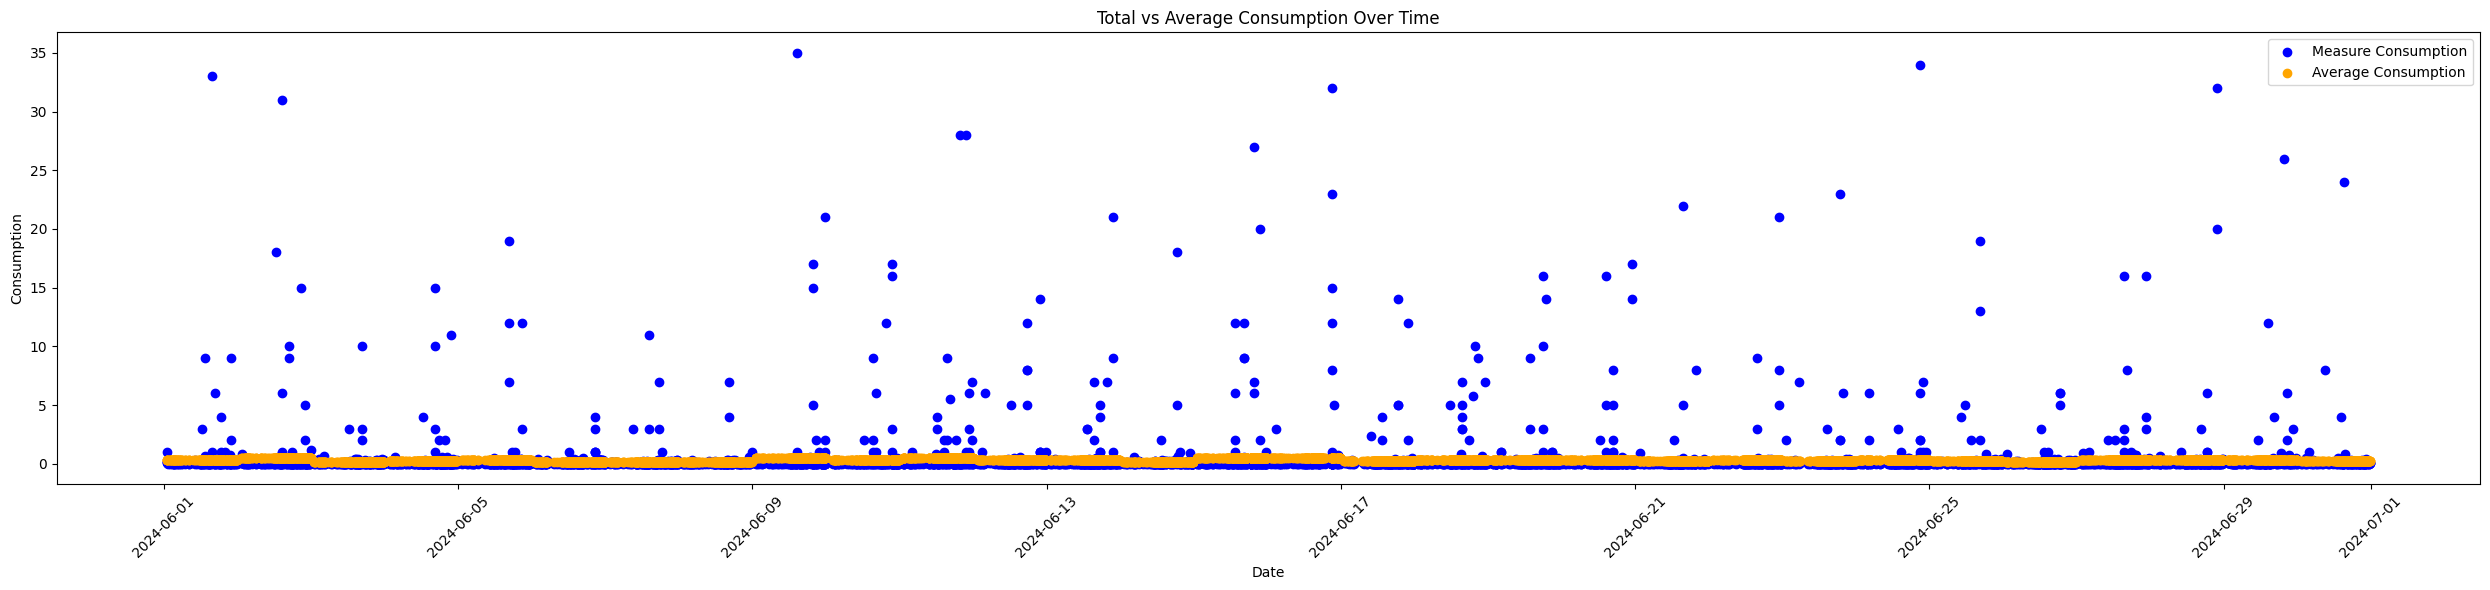

In [285]:
plt.figure(figsize=(25, 6))

plt.scatter(
    filtered_df["datetime"],
    filtered_df["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    filtered_df["datetime"],
    filtered_df["measure_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

Pegando um clientCode aleatório dentro aquele condomínio.


In [286]:
target_clientCode = targetCondCodeDf["clientCode"].value_counts().index[1]
print(target_clientCode)

d188f8473c5322fd449f46e533bb1006ab0e16fa26ba7b4b903e66945ae5011d


Gráfico do consumo desse cliente vs a média do condomínio.


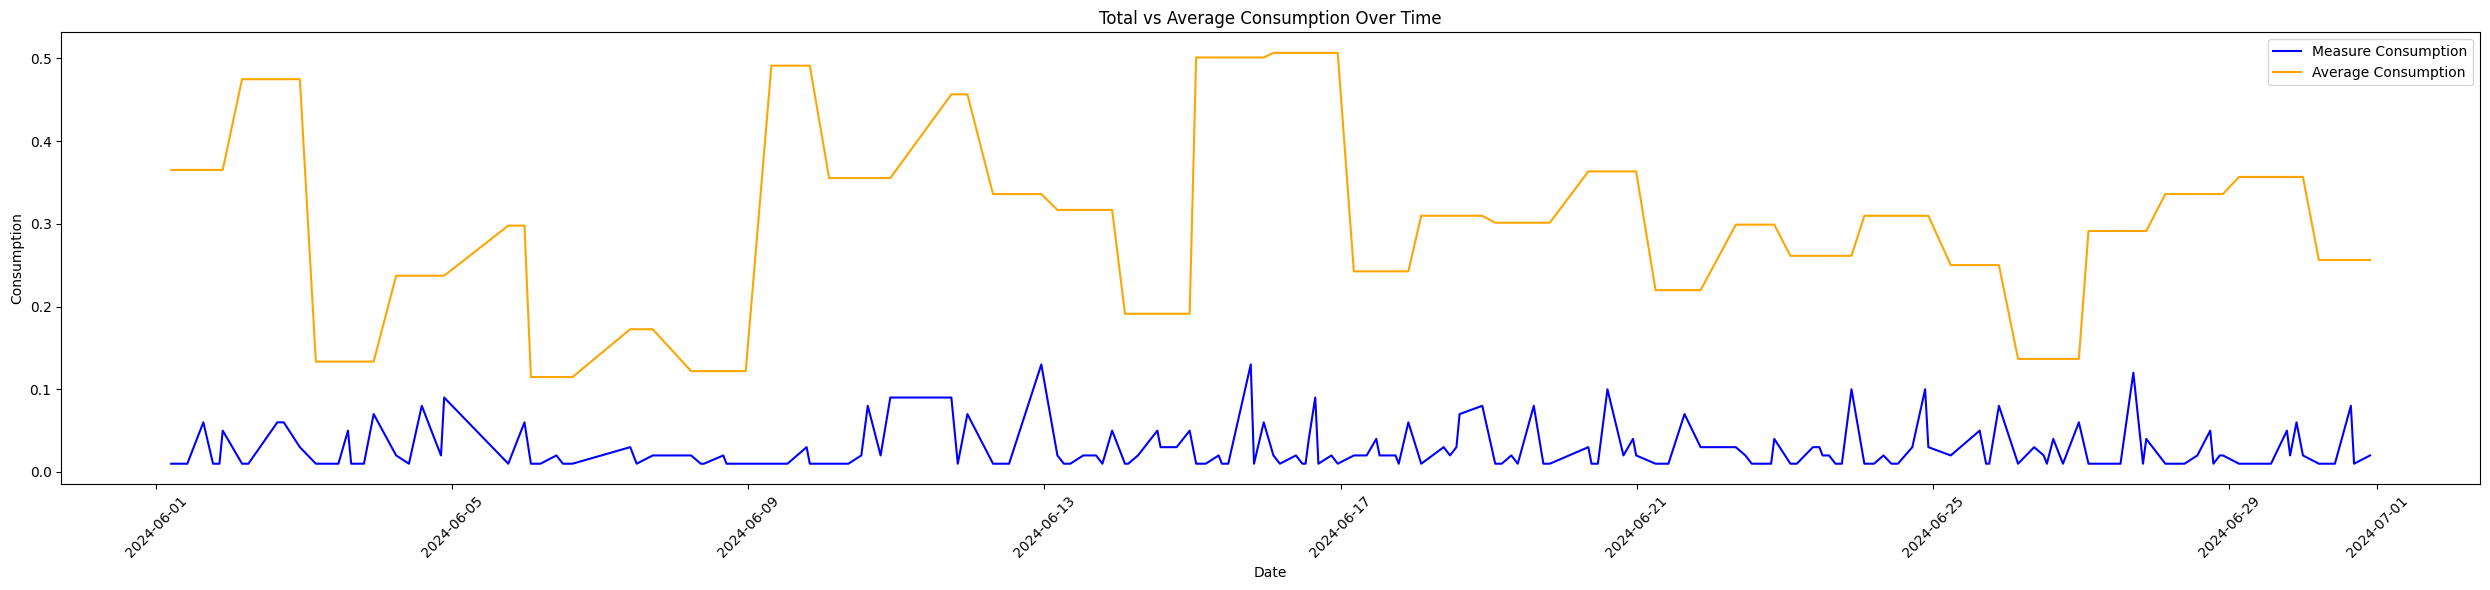

In [287]:
plt.figure(figsize=(25, 6))

plt.plot(
    filtered_df[filtered_df["clientCode"] == target_clientCode]["datetime"],
    filtered_df[filtered_df["clientCode"] == target_clientCode]["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.plot(
    filtered_df[filtered_df["clientCode"] == target_clientCode]["datetime"],
    filtered_df[filtered_df["clientCode"] == target_clientCode][
        "measure_avg_consumption"
    ],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
# plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()

Agora, aplicando a lógica de somente um condomínio de measure_diff para todo o df.


In [288]:
df["match"] = df.clientCode.eq(df.clientCode.shift())
df["measure_diff"] = df["match"].where(
    df["match"] == False, df["totalConsumption"].diff()
)
df["measure_diff"] = pd.to_numeric(df["measure_diff"], errors="coerce")
df = df.dropna(subset=["match"])
df = df.drop(columns=["match"])
df.reset_index(drop=True, inplace=True)
df

clientCode  clientIndex  \
0        7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0   
1        7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0   
2        7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...            0   
3        2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...            0   
4        2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...            0   
...                                                    ...          ...   
2951238  823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...            0   
2951239  823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...            0   
2951240  823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...            0   
2951241  823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...            0   
2951242  1985ad3cff2f49f0a7743ce6aedb725ce078466631cbf3...            1   

         meterIndex  initialIndex  pulseCount  gain            datetime  \
0             24.64        10.113     1453.00  0.01 2024-02-01 05:05:51   
1             24.64        10.113     1453.00  0.01 2024-02-01 17:34:40   
2             24.64        10.113     1453.00  0.01 2024-02-01 21:43:25   
3             69.08        25.916     4316.00  0.01 2024-02-01 00:34:16   
4             69.22        25.916     4330.00  0.01 2024-02-01 03:42:26   
...             ...           ...         ...   ...                 ...   
2951238       14.18         6.250      793.00  0.01 2024-06-30 20:29:22   
2951239       14.18         6.250      793.00  0.01 2024-06-30 21:31:57   
2951240       14.18         6.250      793.00  0.01 2024-06-30 22:34:48   
2951241       14.18         6.250      793.00  0.01 2024-06-30 23:37:00   
2951242       42.73         0.000       42.73  1.00 2024-06-30 21:18:53   

              meterSN      inputType        model  ...        cidade  \
0        5050102C02ZD            DI1    IG1K-L-v2  ...  PORTO ALEGRE   
1        5050102C02ZD            DI1    IG1K-L-v2  ...  PORTO ALEGRE   
2        5050102C02ZD            DI1    IG1K-L-v2  ...  PORTO ALEGRE   
3        Z1112C100D22            DI4    IG1K-L-v2  ...  PORTO ALEGRE   
4        Z1112C100D22            DI4    IG1K-L-v2  ...  PORTO ALEGRE   
...               ...            ...          ...  ...           ...   
2951238  6DA20240630C            DI8    IG1K-L-v2  ...      GRAVATAÍ   
2951239  6DA20240630C            DI8    IG1K-L-v2  ...      GRAVATAÍ   
2951240  6DA20240630C            DI8    IG1K-L-v2  ...      GRAVATAÍ   
2951241  6DA20240630C            DI8    IG1K-L-v2  ...      GRAVATAÍ   
2951242  082C320A0D93  leituraRemota  Infinity V2  ...  PORTO ALEGRE   

                           categoria  contratacao        situacao  \
0        PRÉDIO EXISTENTE INDIVIDUAL   2023-06-22  CONSUMINDO GÁS   
1        PRÉDIO EXISTENTE INDIVIDUAL   2023-06-22  CONSUMINDO GÁS   
2        PRÉDIO EXISTENTE INDIVIDUAL   2023-06-22  CONSUMINDO GÁS   
3        PRÉDIO EXISTENTE INDIVIDUAL   2023-06-22  CONSUMINDO GÁS   
4        PRÉDIO EXISTENTE INDIVIDUAL   2023-06-22  CONSUMINDO GÁS   
...                              ...          ...             ...   
2951238  PRÉDIO EXISTENTE INDIVIDUAL   2024-01-30  CONSUMINDO GÁS   
2951239  PRÉDIO EXISTENTE INDIVIDUAL   2024-01-30  CONSUMINDO GÁS   
2951240  PRÉDIO EXISTENTE INDIVIDUAL   2024-01-30  CONSUMINDO GÁS   
2951241  PRÉDIO EXISTENTE INDIVIDUAL   2024-01-30  CONSUMINDO GÁS   
2951242  PRÉDIO EXISTENTE INDIVIDUAL   2023-07-07  CONSUMINDO GÁS   

             perfil_consumo  \
0        Cocção + Aquecedor   
1        Cocção + Aquecedor   
2        Cocção + Aquecedor   
3        Cocção + Aquecedor   
4        Cocção + Aquecedor   
...                     ...   
2951238              Cocção   
2951239              Cocção   
2951240              Cocção   
2951241              Cocção   
2951242  Cocção + Aquecedor   

                                                  condCode condIndex  \
0        aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...       0.0   
1        aa635a4c8a7084b3218aa1da8d

Agora, aplicando a lógica de somente um condomínio de measure_avg_consumption para todo o df.


In [289]:
df.reset_index(drop=True, inplace=True)

df["datetime_yyyy-mm-dd"] = df["datetime"].dt.normalize()

df["measure_avg_consumption"] = None

for date in np.array(df["datetime_yyyy-mm-dd"].unique()):
    measure_avg_consumption = df[
        df["datetime_yyyy-mm-dd"].dt.to_period("D")
        == pd.to_datetime(date).to_period("D")
    ]
    measure_avg_consumption = measure_avg_consumption["measure_diff"].mean()
    df.loc[df["datetime_yyyy-mm-dd"] == date, "measure_avg_consumption"] = (
        measure_avg_consumption
    )

Escolha das colunas numéricas.


In [290]:
df = df[
    ["clientCode", "condCode", "timestamp", "measure_avg_consumption", "measure_diff"]
]

Label enconding de condCode e clientCode.


In [291]:
from sklearn.preprocessing import LabelEncoder

le_condCode = LabelEncoder()
le_clientCode = LabelEncoder()


le_condCode.fit(df["condCode"].dropna())
df["C_condCode"] = pd.Series(
    le_condCode.transform(df["condCode"].dropna()), index=df["condCode"].dropna().index
)
df["C_condCode"] = df["C_condCode"].reindex(df.index).astype(float)


le_clientCode.fit(df["clientCode"].dropna())
df["C_clientCode"] = pd.Series(
    le_clientCode.transform(df["clientCode"].dropna()),
    index=df["clientCode"].dropna().index,
)
df["C_clientCode"] = df["C_clientCode"].reindex(df.index).astype(float)

C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\895237859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_condCode"] = pd.Series(
C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\895237859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_condCode"] = df["C_condCode"].reindex(df.index).astype(float)
C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\895237859.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Gráfico da média de consumo de todos os condiminios por dia vs consumo de todos usuários.


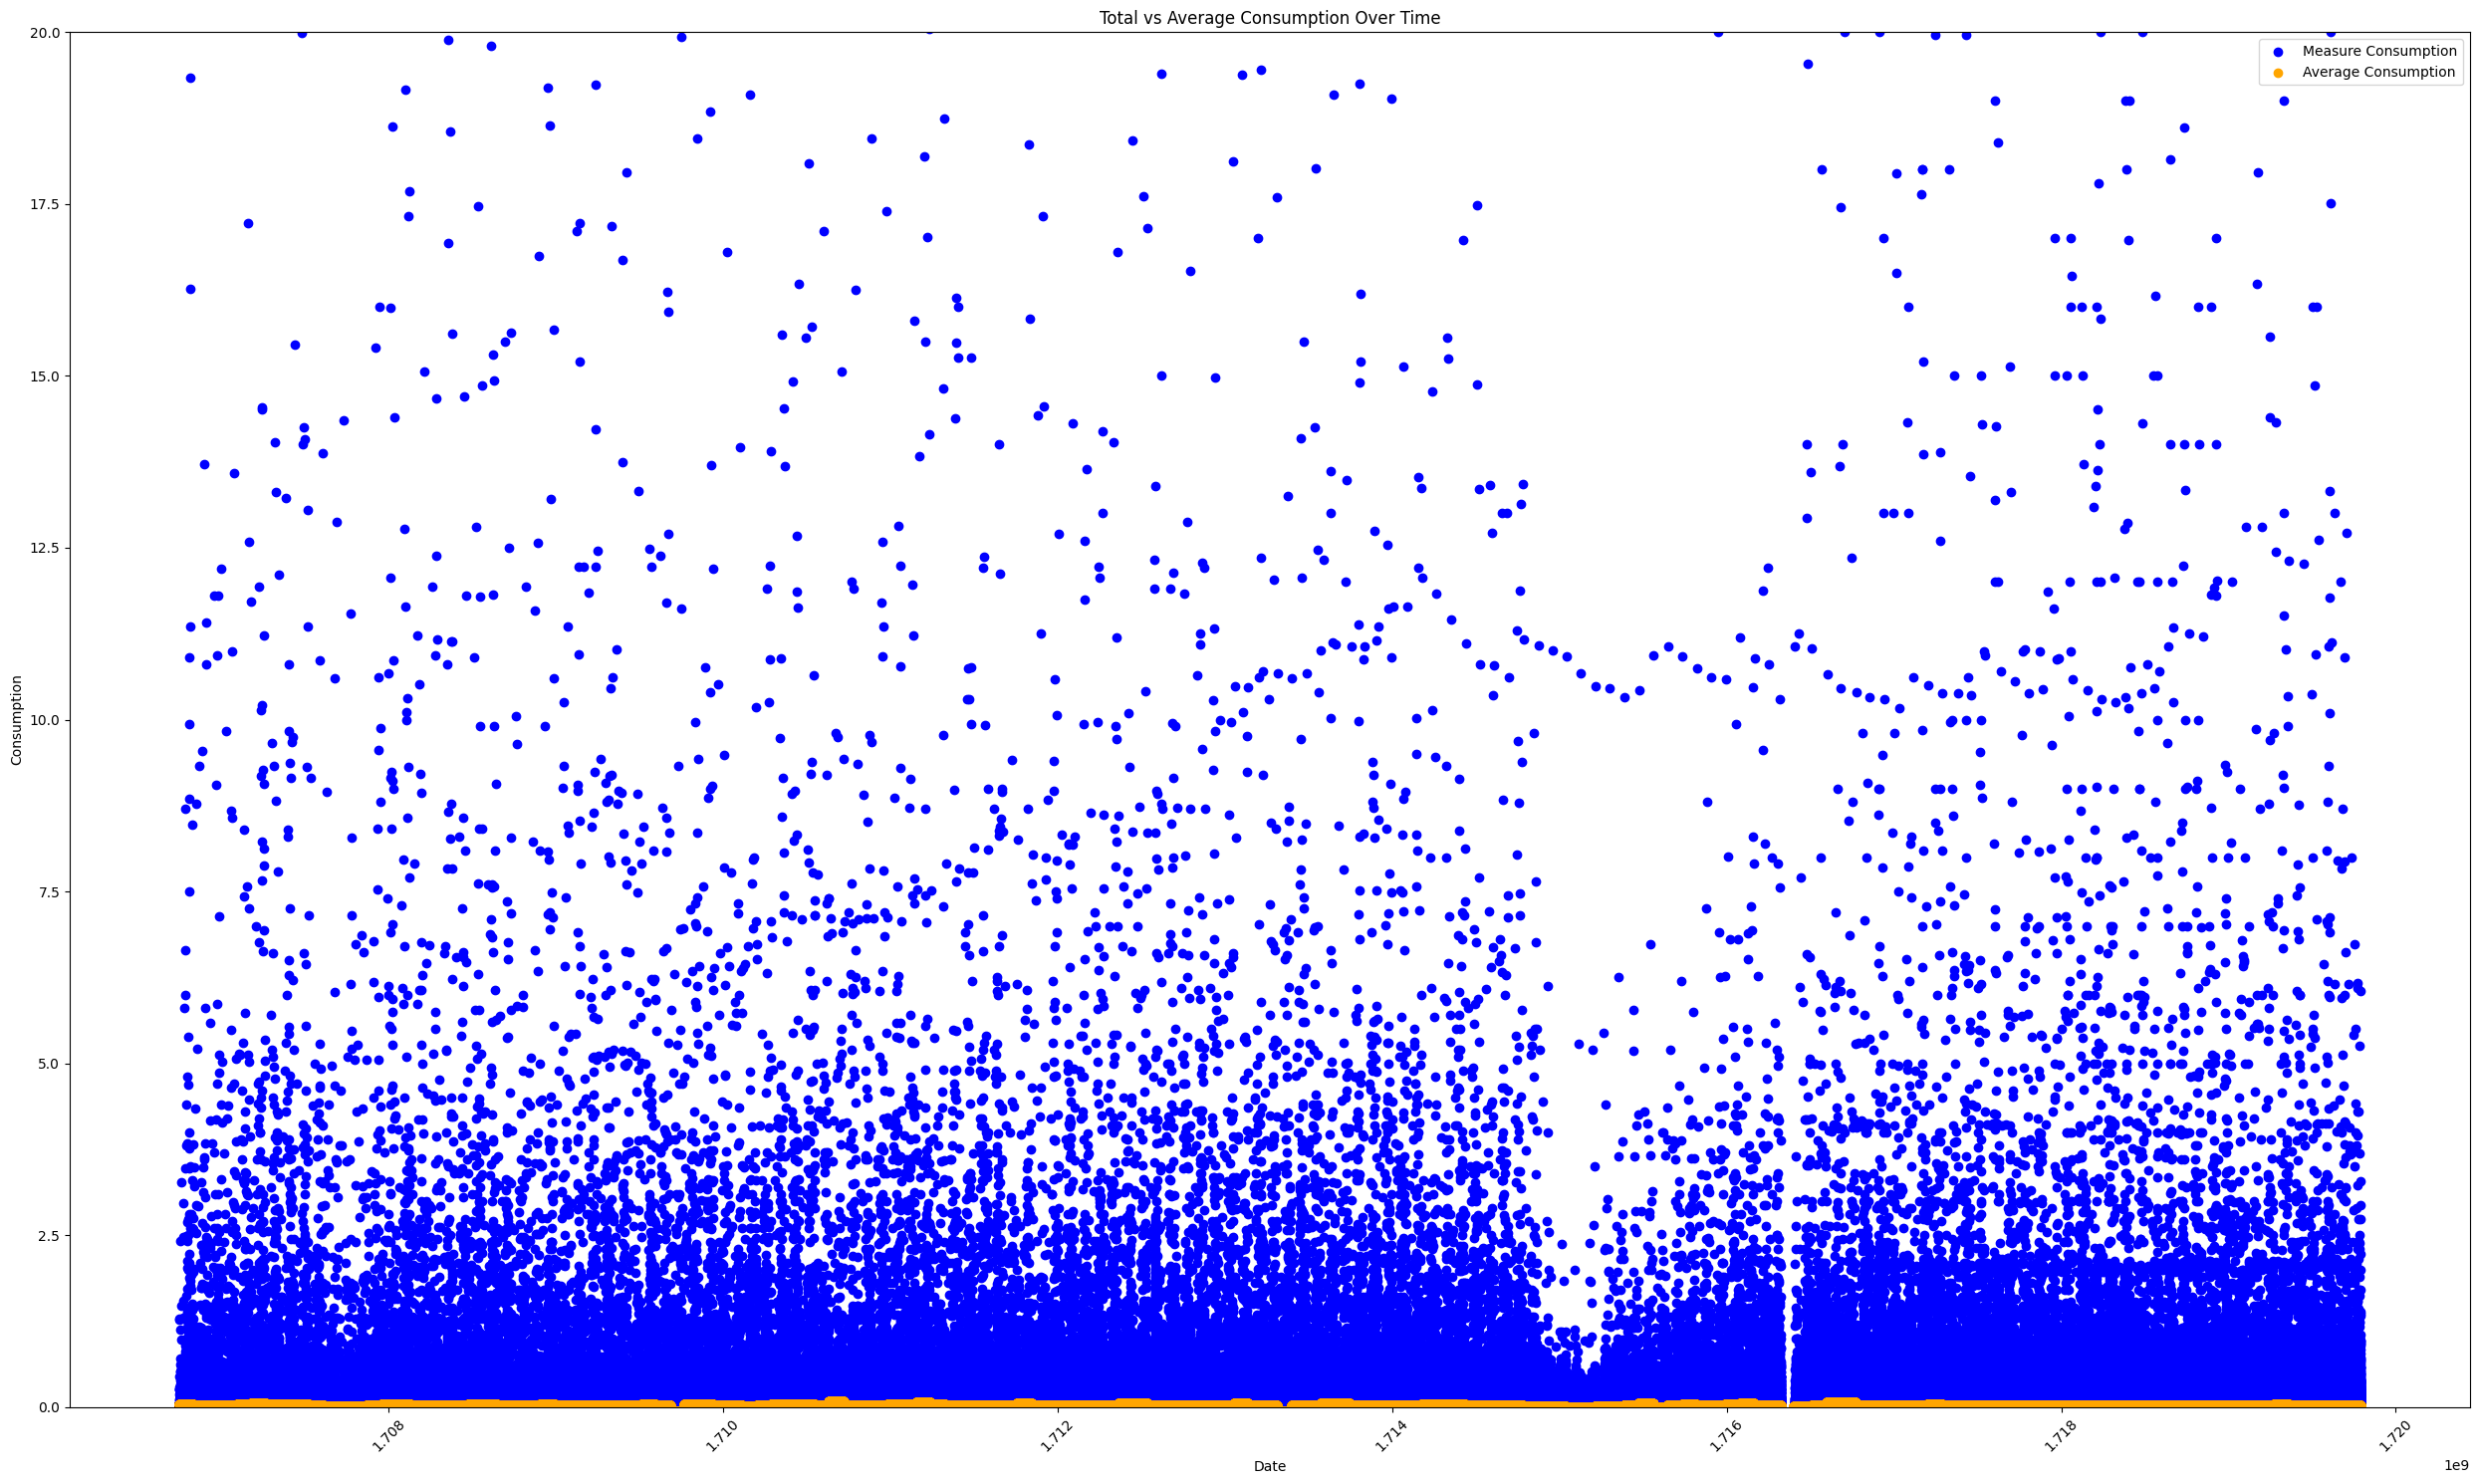

In [292]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df["timestamp"],
    df["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df["timestamp"],
    df["measure_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

### 4.3.2. Modelo Candidato

O modelo escolhido é o **KMeans**, um algoritmo de clustering amplamente utilizado para agrupar dados com base em similaridades. Neste caso, foram selecionadas três features relevantes:

- **measure_diff**: Diferença de medidas de consumo de gás.
- **C_condCode**: Código do condomínio para identificar agrupamentos.
- **C_clientCode**: Código do cliente, que representa cada unidade de medição individual.

O modelo foi configurado para gerar **3 clusters** e distribuiu os indivíduos com base na similaridade dessas variáveis. Os clusters foram visualizados em um gráfico 3D, com os centróides claramente marcados para indicar os pontos centrais de cada grupo.

### Discussão sobre os Resultados

O KMeans conseguiu segmentar os consumidores de maneira eficaz, agrupando-os em três clusters distintos. Cada cluster representa um padrão comum de consumo de gás, levando em consideração a localização (condCode) e o comportamento individual (clientCode).

- **Os clusters formados** revelam agrupamentos de consumidores com padrões de consumo semelhantes. Isso facilita a análise de comportamento coletivo (dentro de condomínios) e individual.
- **Os centróides indicam** os padrões médios de consumo de cada grupo, sendo pontos de referência claros para comparar consumidores dentro do cluster.

**Conclusão:**  
A escolha do KMeans com 3 clusters forneceu uma segmentação clara e útil dos consumidores, destacando padrões de consumo distintos e criando uma base sólida para análise de comportamento. Essa segmentação permite identificar anomalias ou padrões específicos que podem ser explorados.


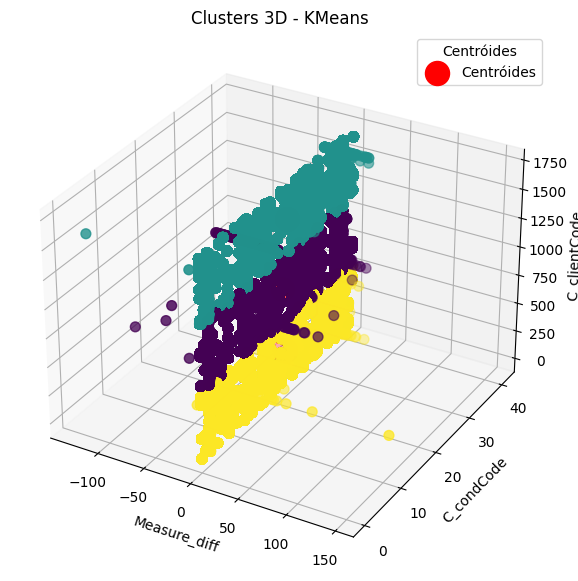

In [293]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

df = df.dropna()

X = df[["measure_diff", "C_condCode", "C_clientCode"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Configurar o gráfico em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotar os dados, usando as três features e colorindo de acordo com os clusters
scatter = ax.scatter(
    df["measure_diff"],
    df["C_condCode"],
    df["C_clientCode"],
    c=df["cluster"],
    cmap="viridis",
    s=50,
)

# Adicionar os centróides no gráfico
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    s=300,
    c="red",
    label="Centróides",
)

# Configurar rótulos e título
ax.set_title("Clusters 3D - KMeans")
ax.set_xlabel("Measure_diff")
ax.set_ylabel("C_condCode")
ax.set_zlabel("C_clientCode")

# Adicionar uma legenda
legend = ax.legend(loc="upper right", title="Centróides")

# Mostrar o gráfico
plt.show()

### 4.3.3. Definição do K e Justificativa

Inicialmente, definimos o valor de **K = 3** de forma arbitrária para segmentar os consumidores. No entanto, para garantir uma escolha mais embasada, utilizamos duas métricas:

1. **Elbow Method**: Essa métrica sugere o K ideal ao avaliar a variação na soma das distâncias dentro dos clusters. O gráfico do método Elbow indicou que o valor ideal de K estaria entre **4 e 5**, já que a curva começou a suavizar nesse ponto.

2. **Silhouette Score**: Essa métrica mede a coesão e separação dos clusters. O Silhouette Score recomendou o valor de **K = 3**, indicando que, com 3 clusters, os grupos estavam mais bem definidos, com maior distância entre clusters e melhor compactação interna.

Seguindo a recomendação do **Silhouette Score**, optamos por manter **K = 3**, pois essa métrica demonstrou que esse número de clusters proporcionava uma segmentação mais clara e precisa dos consumidores.


### Definição do Elbow.


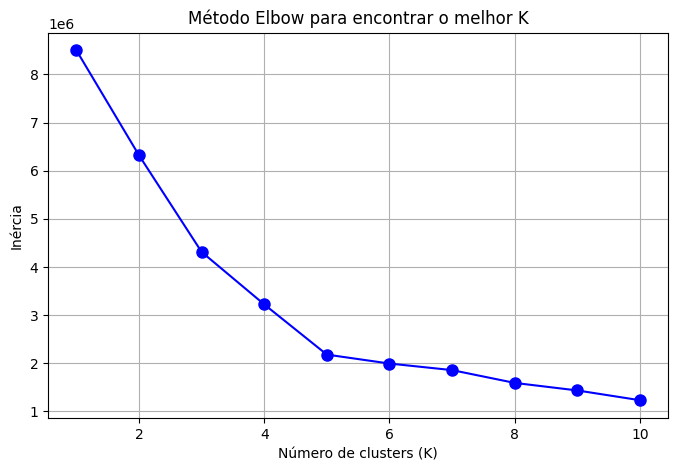

In [294]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[["measure_diff", "C_condCode", "C_clientCode"]]

features = features.dropna()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, "bo-", markersize=8)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia")
plt.title("Método Elbow para encontrar o melhor K")
plt.grid(True)
plt.show()

### Gráfico da Silhueta


Coeficiente médio de silhueta para K = 3: 0.5821456459696633


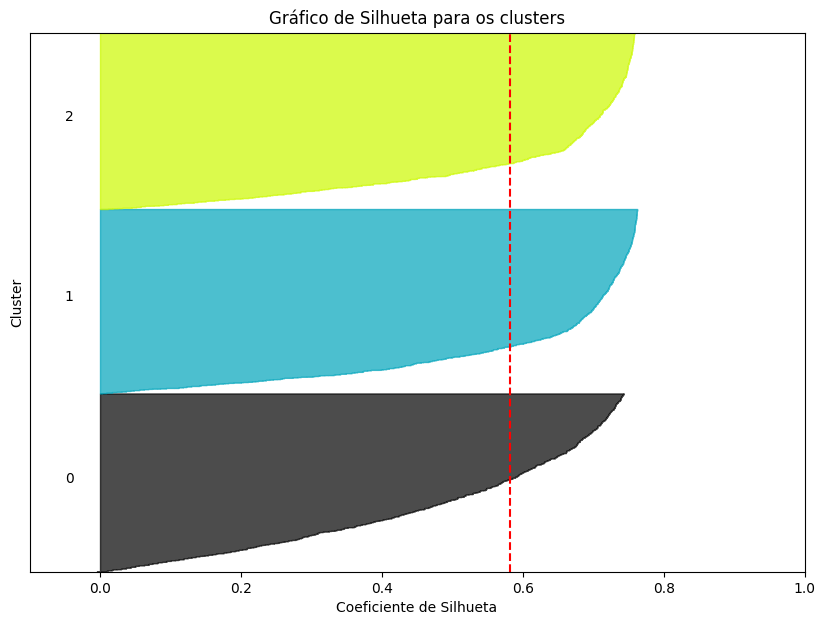

In [295]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Usando 10% dos dados como no exemplo anterior
df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample[["measure_diff", "C_condCode", "C_clientCode"]]
X = X.dropna()

# Defina o valor de K (número de clusters que você deseja usar)
n_clusters = 3  # Exemplo, escolha o K apropriado

# Criando o modelo KMeans e ajustando aos dados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculando o coeficiente da silhueta para cada ponto
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Coeficiente médio de silhueta para K = {n_clusters}: {silhouette_avg}")

# Calcula os valores da silhueta para cada amostra
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Iniciando o gráfico
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# Configuração do gráfico
ax1.set_xlim([-0.1, 1])  # O coeficiente da silhueta vai de -1 a 1
ax1.set_ylim(
    [0, len(X) + (n_clusters + 1) * 10]
)  # Para deixar espaço entre os clusters

y_lower = 10
for i in range(n_clusters):
    # Agrega os valores da silhueta para o cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Rotula os clusters no meio do gráfico
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcula a nova posição do eixo y
    y_lower = y_upper + 10  # 10 para o espaço entre os clusters

# Adicionar títulos e labels ao gráfico
ax1.set_title("Gráfico de Silhueta para os clusters")
ax1.set_xlabel("Coeficiente de Silhueta")
ax1.set_ylabel("Cluster")

# A linha vertical para a média do coeficiente de silhueta
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Remover labels y
ax1.set_yticks([])

# Exibir o gráfico
plt.show()

### 4.3.4. Escolha do Tipo de Sistema de Recomendação

Optamos por um **sistema de recomendação baseado em análise de clusters e detecção de anomalias**, adequado para o cenário de monitoramento de consumo de gás. Essa abordagem permite que o sistema:

- **Identifique padrões de consumo anômalos** que desviam do comportamento usual de um determinado cluster, o que pode indicar vazamentos ou falhas em equipamentos.
- **Sugira áreas prioritárias para intervenção técnica**, utilizando dados de proximidade geográfica e consumo para identificar regiões que necessitam de manutenção preventiva.
- **Compare o consumo individual com a média do grupo**, facilitando a detecção de discrepâncias que justifiquem inspeções ou ajustes, aumentando a eficiência no controle e gestão do consumo de gás.

Essa escolha é justificada pela necessidade de um sistema que detecte variações no comportamento de consumo e priorize ações preventivas de forma precisa e ágil.


### Abaixo segue análise de cliente que mais aparece com medidas acima de 20.

Exemplo de como os insights do modelo devem ser utilizados.


In [296]:
df[df["measure_diff"] > 20]["C_clientCode"].value_counts()

C_clientCode
1685.0    12
660.0      8
223.0      6
720.0      4
73.0       3
1641.0     2
622.0      1
540.0      1
290.0      1
Name: count, dtype: int64

DF desse cliente.


In [297]:
df[df["C_clientCode"] == 1685]

clientCode  \
21116    fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
21117    fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
21118    fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
21119    fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
21120    fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
...                                                    ...   
2944070  fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
2944071  fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
2944072  fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
2944073  fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   
2944074  fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...   

                                                  condCode     timestamp  \
21116    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.707549e+09   
21117    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.707557e+09   
21118    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.707568e+09   
21119    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.707572e+09   
21120    d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.707591e+09   
...                                                    ...           ...   
2944070  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.719738e+09   
2944071  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.719746e+09   
2944072  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.719757e+09   
2944073  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.719761e+09   
2944074  d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...  1.719779e+09   

        measure_avg_consumption  measure_diff  C_condCode  C_clientCode  \
21116                  0.022471           0.0        36.0        1685.0   
21117                  0.022471           0.0        36.0        1685.0   
21118                  0.022471           0.0        36.0        1685.0   
21119                  0.022471           0.0        36.0        1685.0   
21120                  0.022471           0.0        36.0        1685.0   
...                         ...           ...         ...           ...   
2944070                  0.0227           8.0        36.0        1685.0   
2944071                  0.0227           0.0        36.0        1685.0   
2944072                  0.0227           4.0        36.0        1685.0   
2944073                  0.0227          24.0        36.0        1685.0   
2944074                  0.0227           0.0        36.0        1685.0   

         cluster  
21116          1  
21117          1  
21118          1  
21119          1  
21120          1  
...          ...  
2944070        1  
2944071        1  
2944072        1  
2944073        1  
2944074        1  

[1692 rows x 8 columns]

Coluna datetime a partir da timestamp.


In [298]:
import datetime

df["datetime"] = df["timestamp"].apply(
    lambda x: (datetime.datetime.fromtimestamp(x) if pd.notnull(x) else None)
)

Usuário vs média de seu condominio em diferentes escalas.

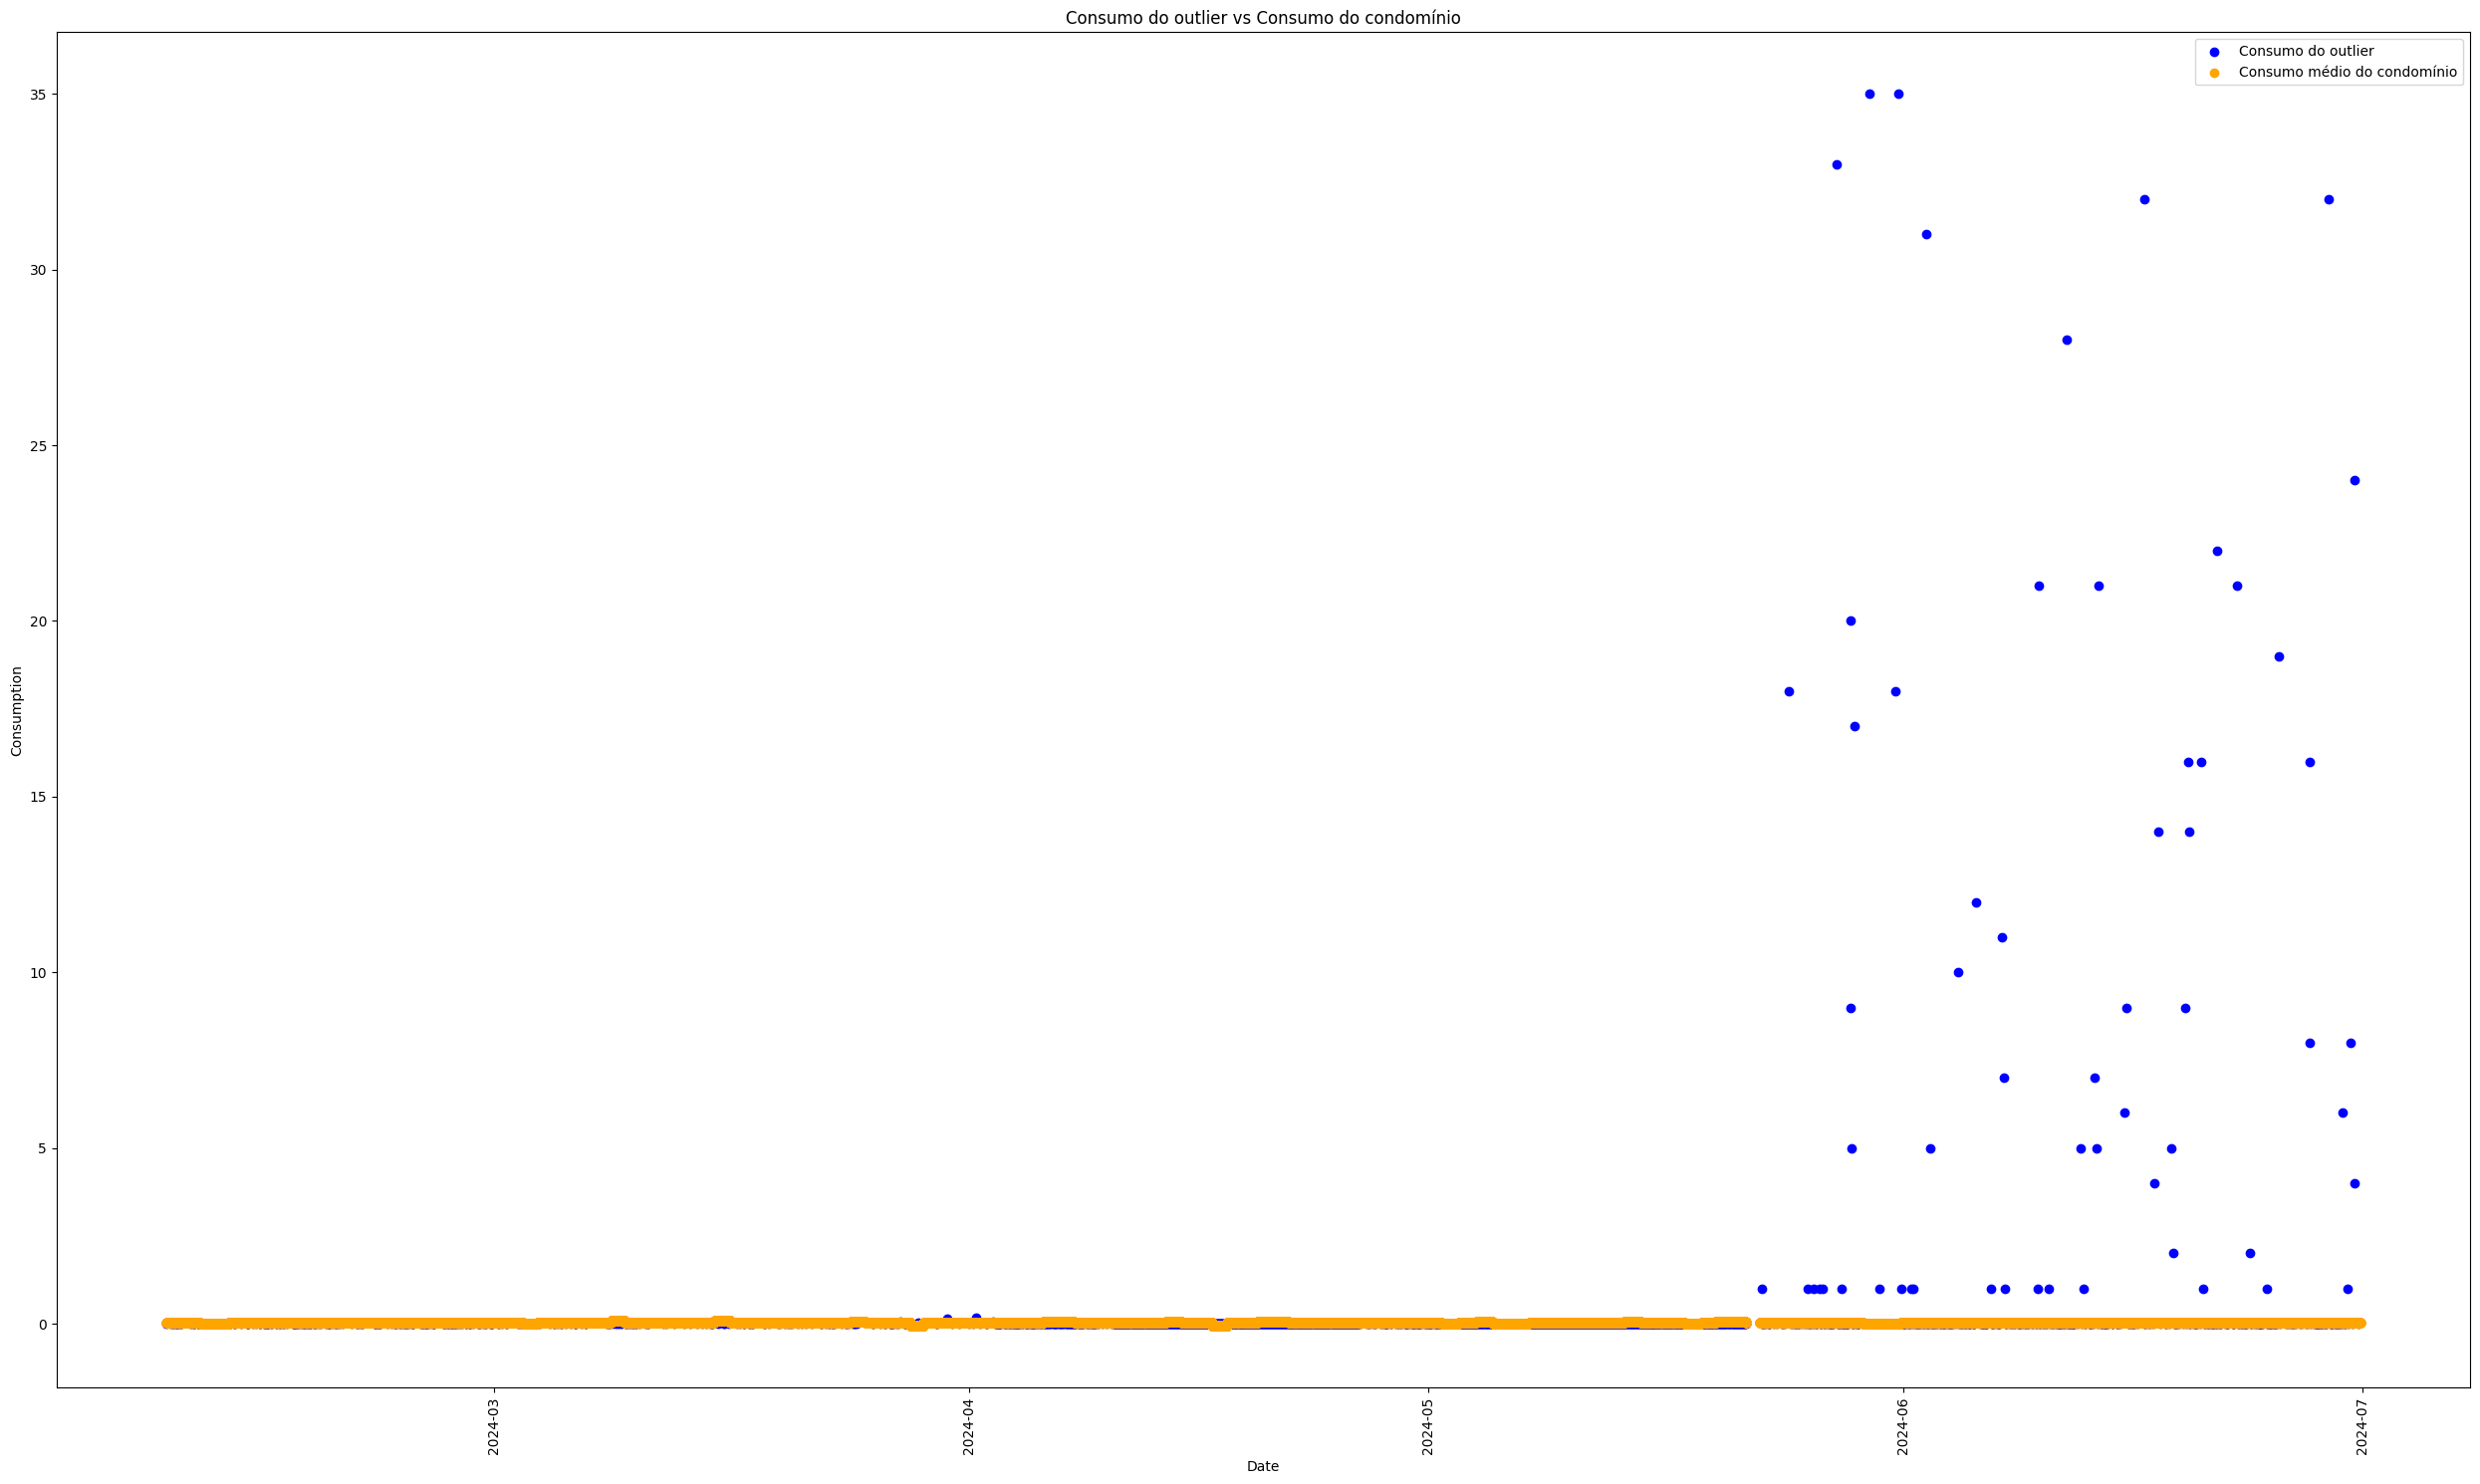

In [299]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685)]["datetime"],
    df[(df["C_clientCode"] == 1685)]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36)]["datetime"].sort_values(ascending=True),
    df[(df["C_condCode"] == 36)]["measure_avg_consumption"],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

# Usuário vs Média de Consumo no Condomínio em Diferentes Escalas

Neste gráfico, estamos comparando o consumo de um cliente específico (código 1685) com o consumo médio de um condomínio (código 36) ao longo do tempo. 

- **Pontos azuis**: Representam o consumo de um "outlier", ou seja, um cliente cujo consumo se distancia significativamente do comportamento esperado.
- **Pontos laranja**: Representam o consumo médio de todos os usuários do condomínio 36 no mesmo período.

Essa visualização é importante para identificarmos padrões anômalos em comparação com o consumo regular do condomínio. O comportamento do cliente fora da curva pode sugerir a necessidade de uma investigação mais detalhada, como possíveis fraudes, falhas no medidor ou vazamentos.

A análise do gráfico mostra que o consumo do outlier tem um comportamento muito mais volátil e disperso do que a média estável do condomínio.


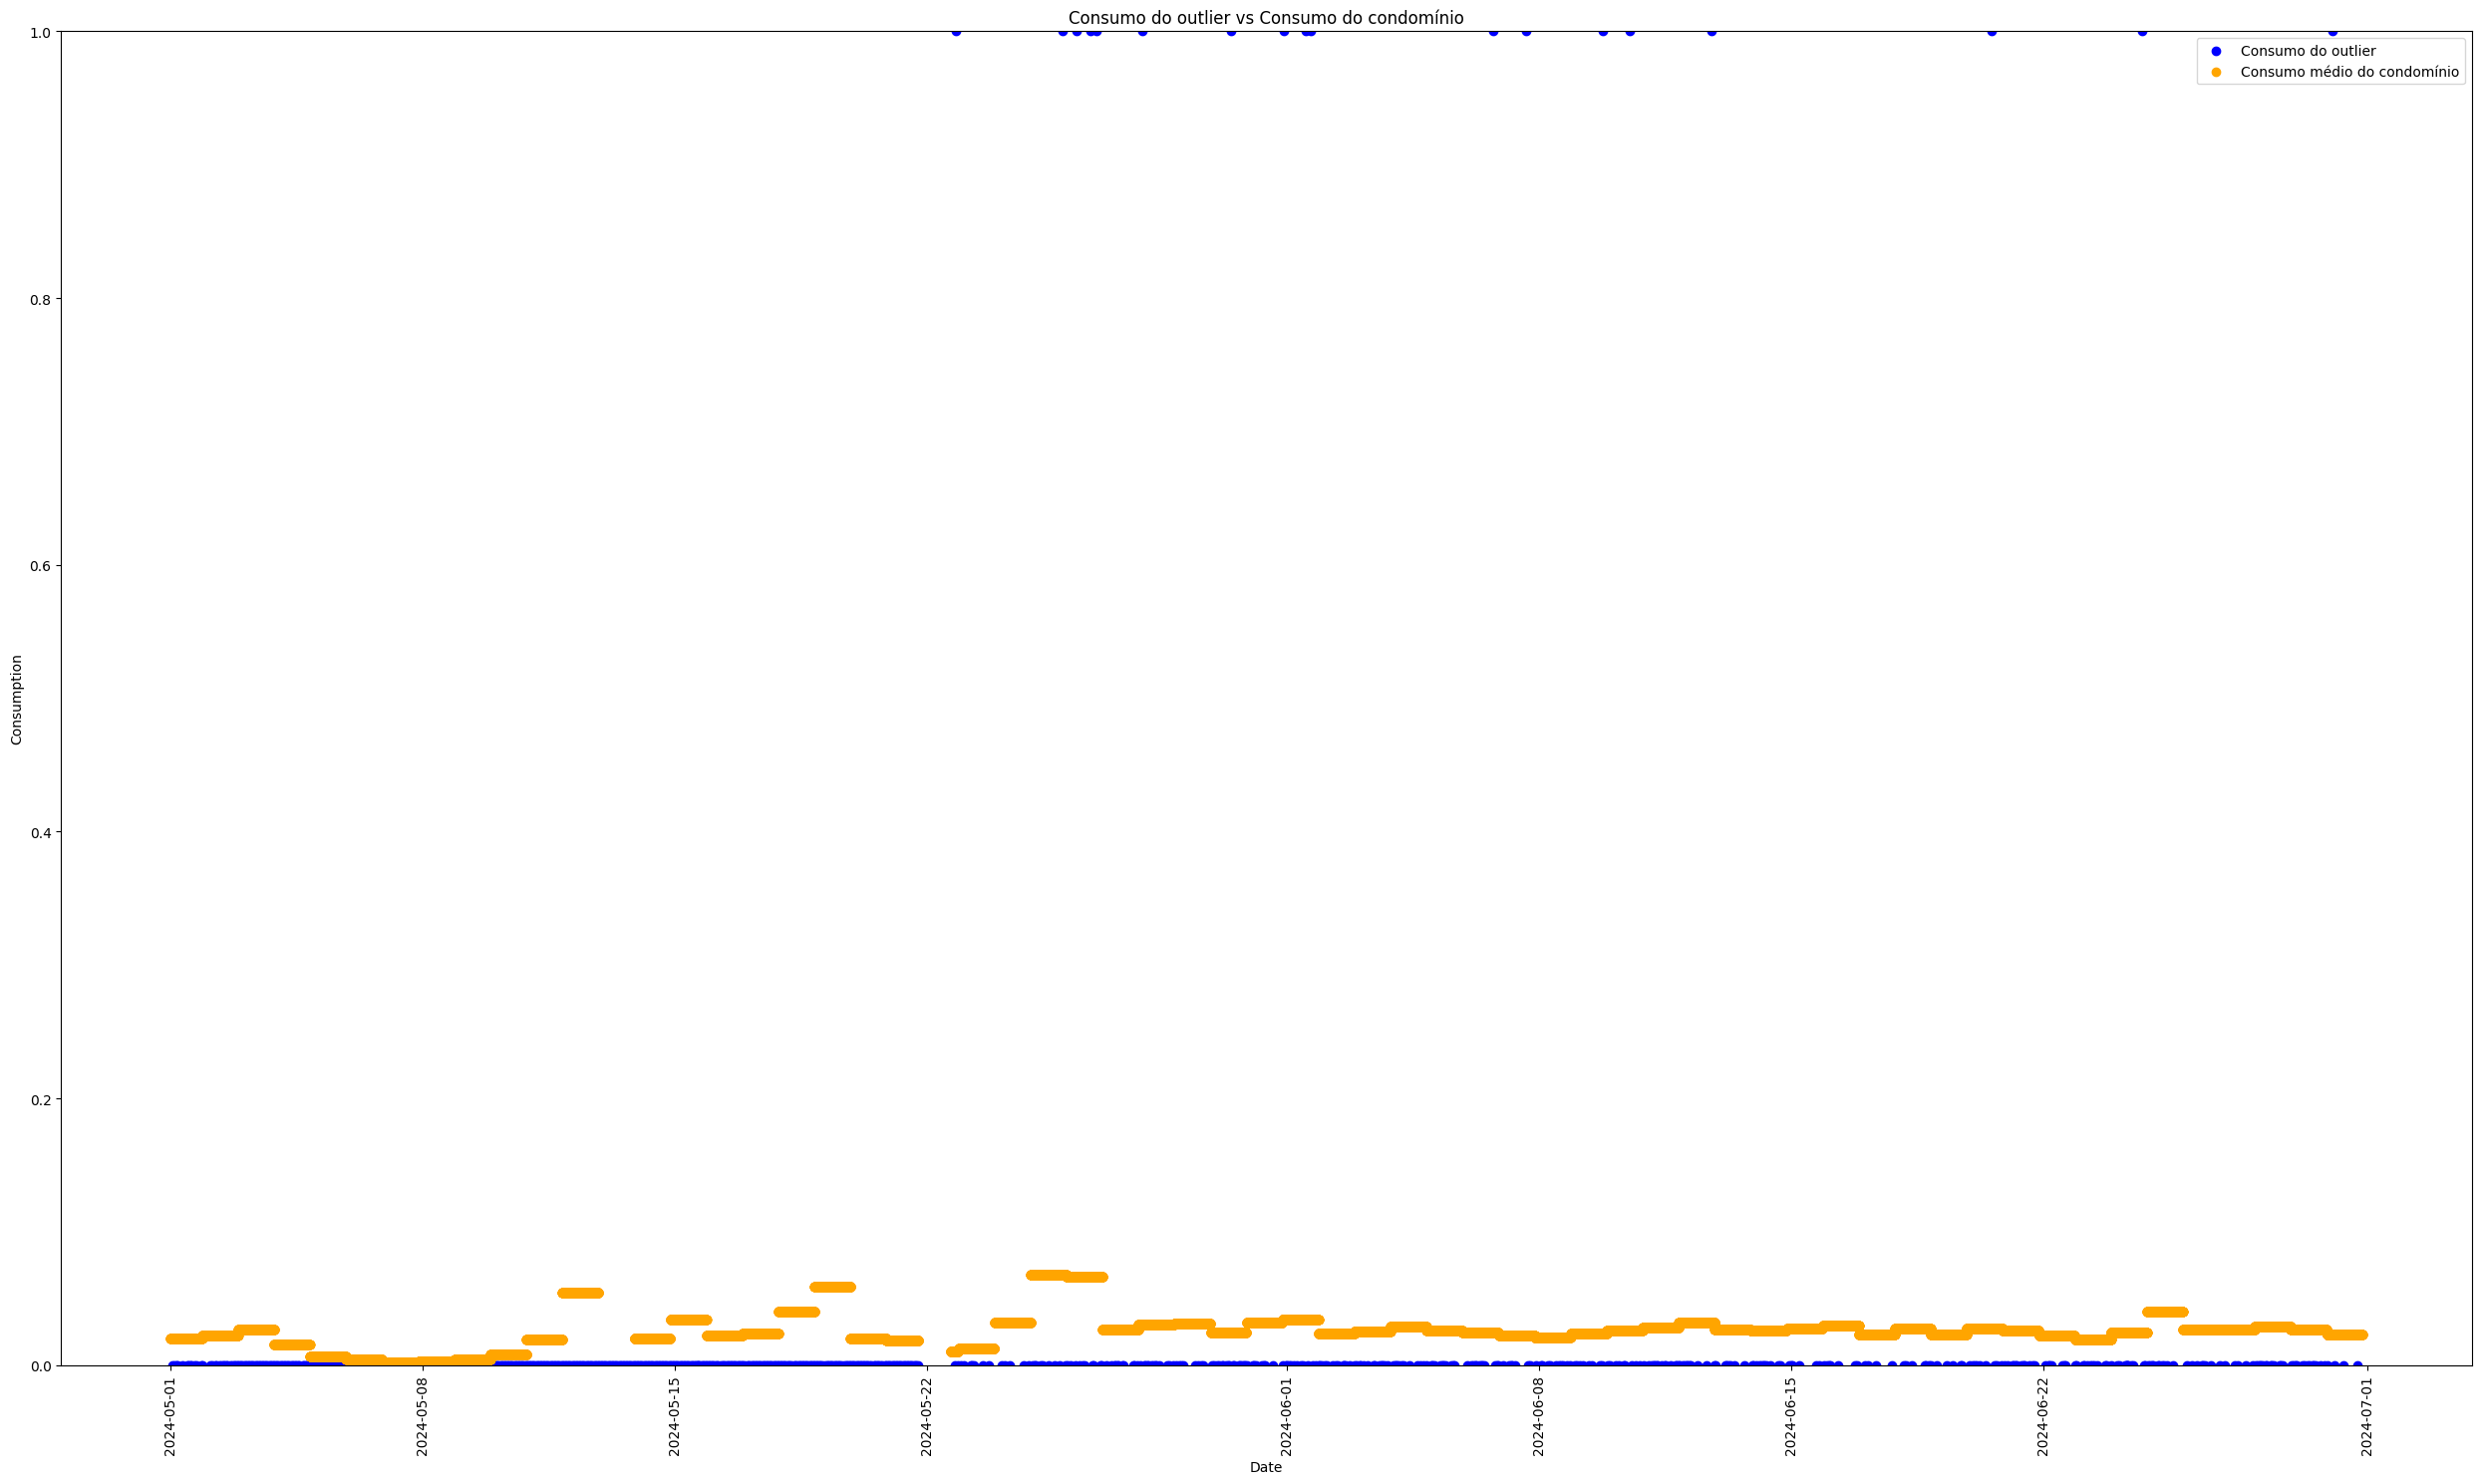

In [300]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")][
        "measure_avg_consumption"
    ],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Análise Refinada do Período após Maio de 2024

Neste gráfico, restringimos a análise para datas posteriores a maio de 2024, focando em um intervalo mais recente de consumo. 

- **Escala Ajustada**: A escala do eixo Y foi ajustada para entre 0 e 1 para melhorar a visualização das diferenças no consumo médio e do outlier nesse período.
- **Padrões Visíveis**: Embora o consumo médio continue estável, o consumo do outlier exibe picos que devem ser observados de perto.

A escolha de um período mais curto nos permite visualizar com maior clareza qualquer variação anômala no comportamento de consumo do cliente, facilitando a identificação de eventos significativos para análises mais detalhadas.


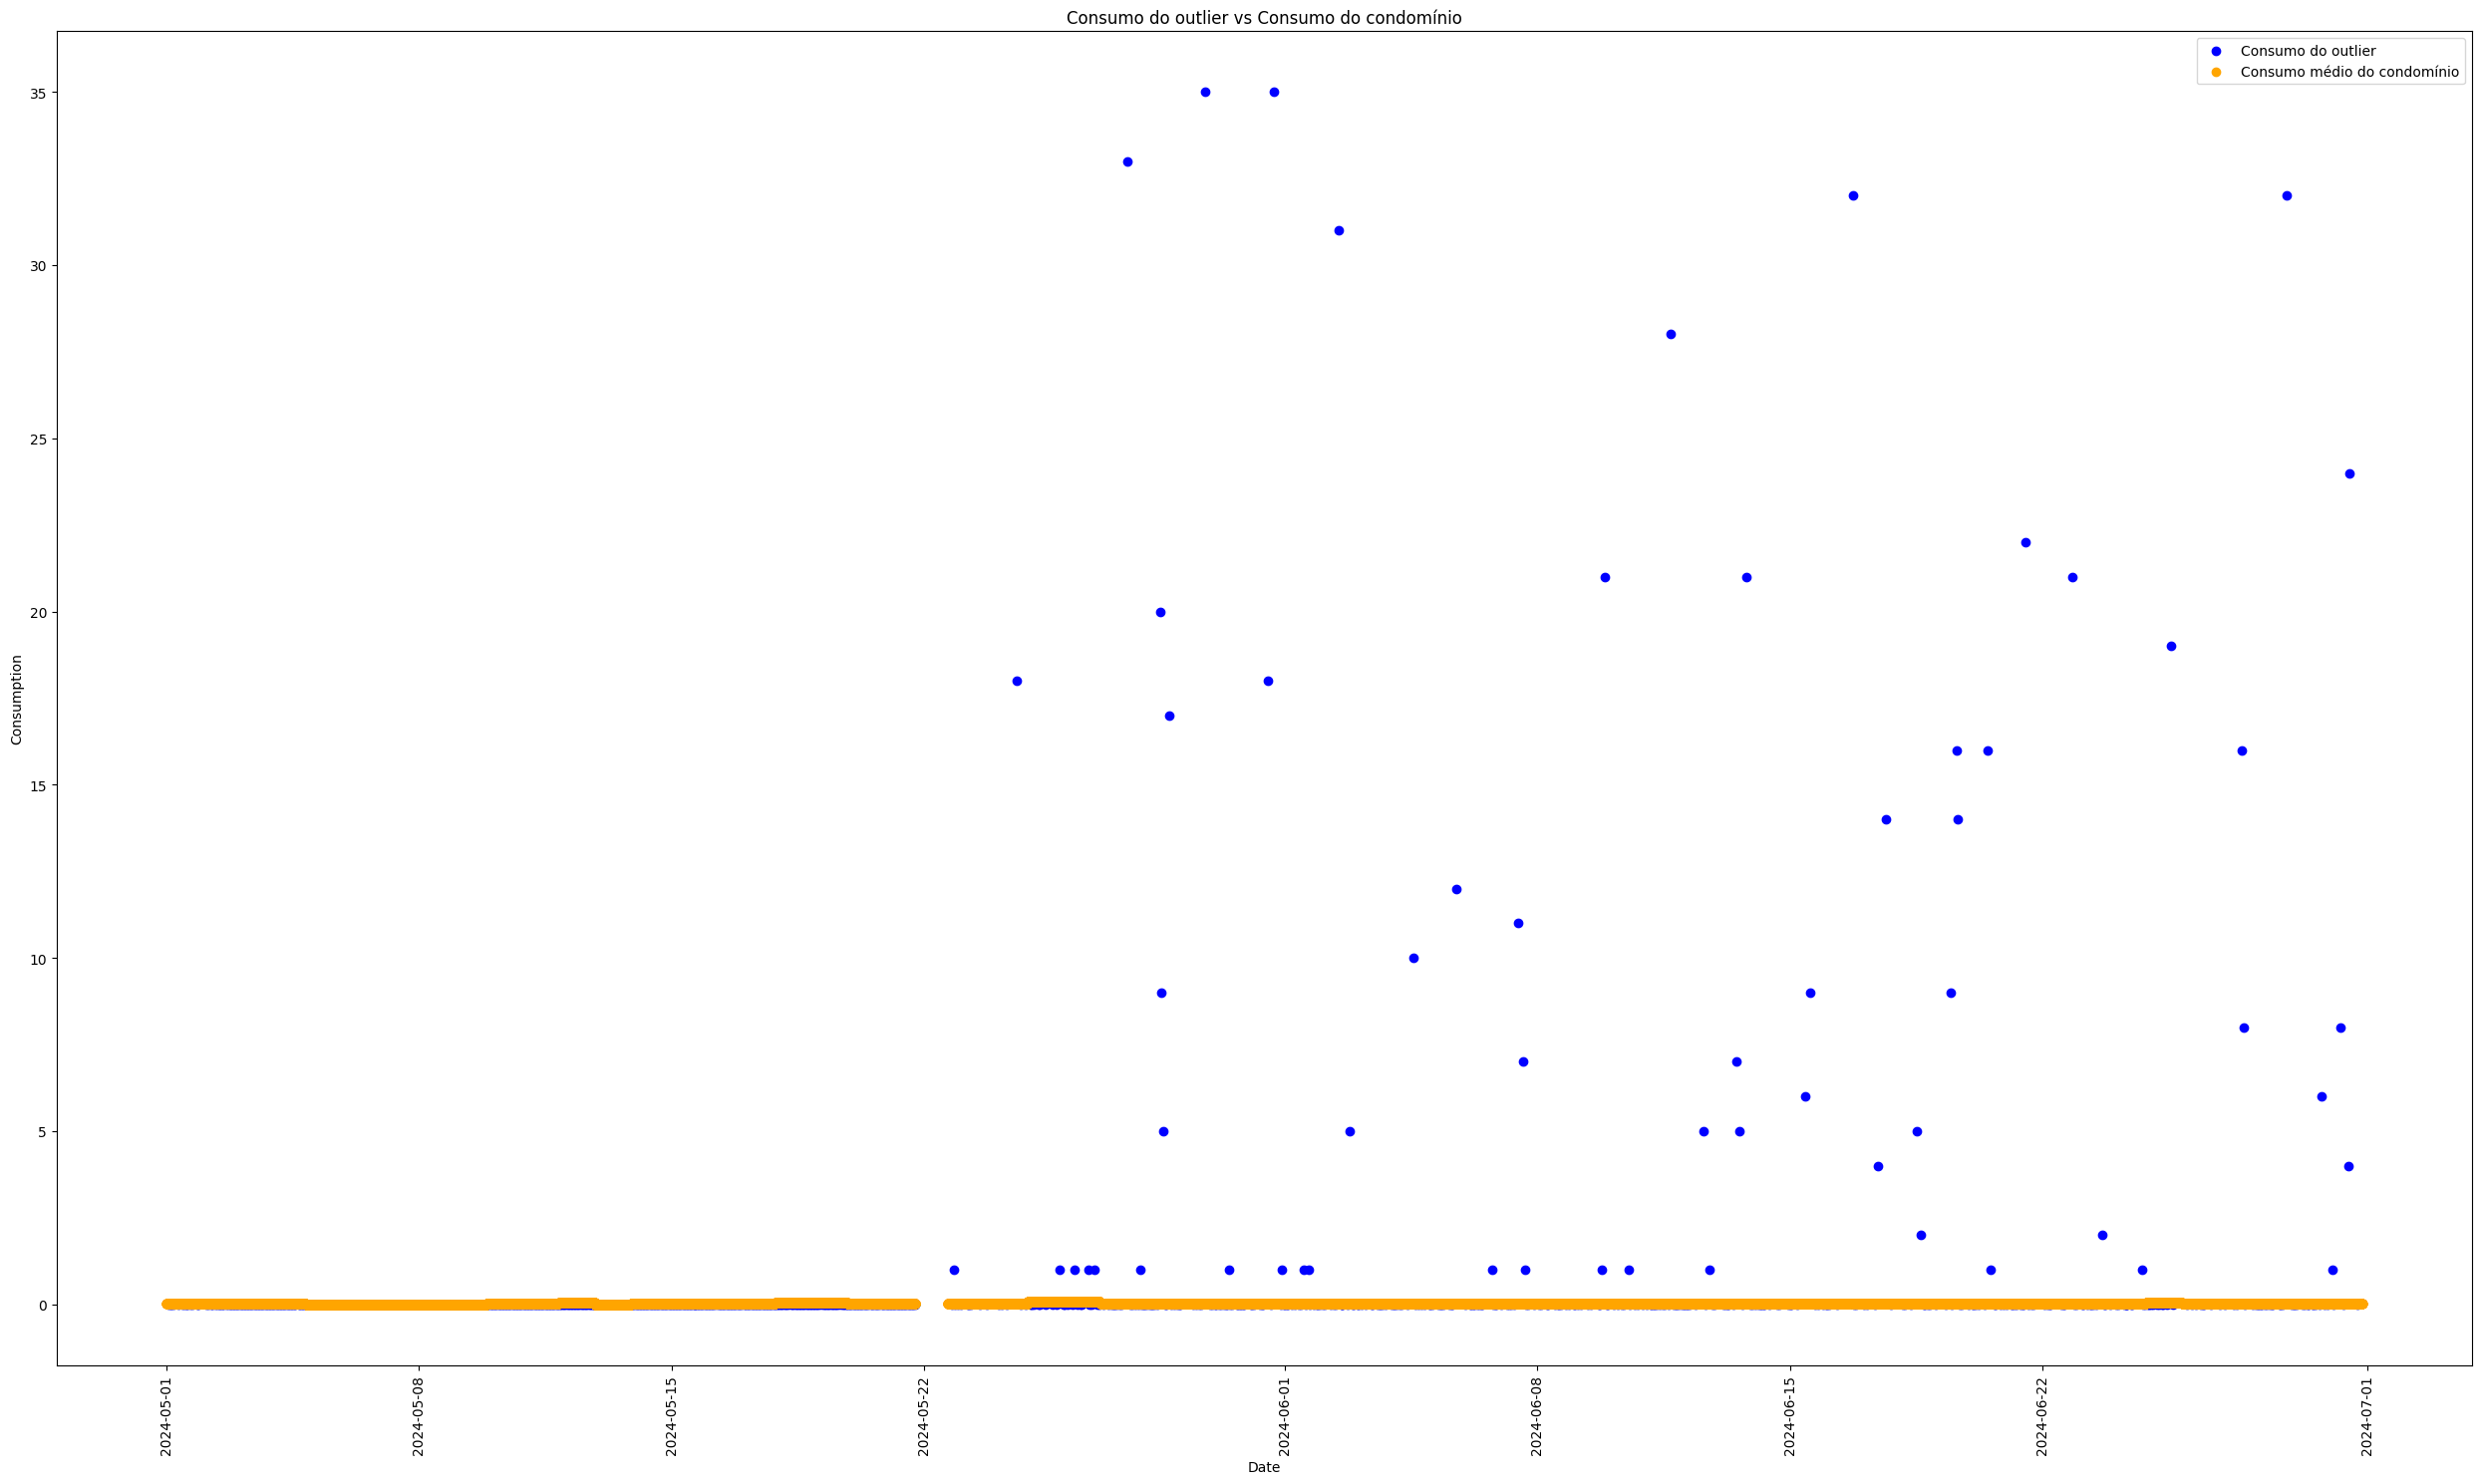

In [301]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")][
        "measure_avg_consumption"
    ],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

Para cálculo do consumo de cada consumidor, precisamos que o consumo leve em conta a ausência de acrescimo do pulseCount apesar do aumento do consumo. A ausência dessa relação incorre na falsa impressão de que um consumidor teve um alto consumo repentino, gerando spikes de consumo e dando uma falsa indicação
Pegar o consumo e dividir entre o consumo médio acumulado entre medições

Dividir o consumo médio pelo delta do tempo


# **Sprint 4**

# 4.4 Competição entre modelos
#### Abaixo desenvolveremos 3 modelos a partir de hipóteses e avaliações diferentes que serão explicados abaixo

## Modelo 1

# Cálculo do Consumo Médio e Detecção de Picos

Nesta etapa, o objetivo é calcular o consumo de cada cliente levando em consideração a ausência de aumento no contador de pulsos (`pulseCount`), o que pode resultar em picos falsos de consumo. Para evitar essas inconsistências, o consumo médio entre medições é utilizado, dividido pelo delta de tempo entre cada leitura.

**Etapas:**
1. **Ordenação dos Dados**: O dataframe é ordenado pelo código do cliente (`C_clientCode`) e pela data da medição (`datetime`), para garantir que as comparações entre leituras consecutivas façam sentido.
2. **Criação da Coluna `match`**: A nova coluna `match` é criada para identificar se a linha atual pertence ao mesmo cliente que a linha anterior, facilitando a detecção de mudanças no cliente ou no medidor.

Essa abordagem ajuda a evitar a detecção de falsos picos de consumo que podem ocorrer devido à falta de incremento do contador de pulsos, garantindo uma análise mais robusta dos dados.

In [302]:
df_1 = df.copy()

In [303]:
df_1 = df_1.sort_values(by=["C_clientCode", "datetime"], ascending=True)

df_1["match"] = df_1.clientCode.eq(df_1.clientCode.shift())

In [304]:
df_1.reset_index(drop=True, inplace=True)

In [305]:
x = df_1["datetime"][1] - df_1["datetime"][0]
print(x.total_seconds())

14.0


In [306]:
from datetime import timedelta

df_1["time_diff_secs"] = None

df_1["time_diff_secs"] = df_1["match"].where(df_1["match"] == False, df_1["datetime"].diff())

df_1["time_diff_secs"] = df_1["time_diff_secs"].where(
    df_1["match"] != False,
    timedelta(seconds=0).total_seconds(),
)

# Cálculo do Delta de Tempo Entre Medições

Nesta etapa, estamos calculando a diferença de tempo (`time_diff_secs`) entre medições consecutivas para cada cliente, o que é fundamental para calcular o consumo corretamente ao longo do tempo.

**Etapas:**
1. **Reset do Índice**: O índice do dataframe foi redefinido para garantir que as operações subsequentes sejam realizadas de forma sequencial após a ordenação anterior.
2. **Cálculo da Diferença de Tempo**: A diferença de tempo é calculada usando a função `.diff()` para determinar o intervalo entre cada medição.
   - Caso seja o mesmo cliente, o delta de tempo real é calculado.
   - Caso o cliente mude entre as medições (valor `False` na coluna `match`), o delta de tempo é ajustado para `0` segundos, evitando cálculos incorretos.

Este cálculo de delta de tempo é importante para garantir que as comparações de consumo sejam consistentes entre medições e que qualquer falha na continuidade da medição seja devidamente tratada.


In [307]:
df_1["time_diff_secs"] = df_1["time_diff_secs"].apply(
    lambda x: x.total_seconds() if x != 0.0 else x
)

In [308]:
df_1[df_1["C_clientCode"] == 1716.0]

clientCode  \
2833399  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2833400  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2833401  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2833402  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2833403  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
...                                                    ...   
2834150  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834151  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834152  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834153  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834154  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   

                                                  condCode     timestamp  \
2833399  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.706765e+09   
2833400  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.706769e+09   
2833401  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.706773e+09   
2833402  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.706792e+09   
2833403  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.706840e+09   
...                                                    ...           ...   
2834150  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719714e+09   
2834151  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719718e+09   
2834152  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719744e+09   
2834153  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719751e+09   
2834154  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719762e+09   

        measure_avg_consumption  measure_diff  C_condCode  C_clientCode  \
2833399                0.041905          0.00         6.0        1716.0   
2833400                0.041905          0.00         6.0        1716.0   
2833401                0.041905          0.00         6.0        1716.0   
2833402                0.041905          0.20         6.0        1716.0   
2833403                0.026447          0.00         6.0        1716.0   
...                         ...           ...         ...           ...   
2834150                  0.0227          0.00         6.0        1716.0   
2834151                  0.0227          0.00         6.0        1716.0   
2834152                  0.0227          0.00         6.0        1716.0   
2834153                  0.0227          0.14         6.0        1716.0   
2834154                  0.0227          0.21         6.0        1716.0   

         cluster            datetime  match  time_diff_secs  
2833399        1 2024-02-01 02:28:16  False             0.0  
2833400        1 2024-02-01 03:30:22   True          3726.0  
2833401        1 2024-02-01 04:33:18   True          3776.0  
2833402        1 2024-02-01 09:45:50   True         18752.0  
2833403        1 2024-02-01 23:15:52   True         48602.0  
...          ...                 ...    ...             ...  
2834150        1 2024-06-29 23:21:41   True         29902.0  
2834151        1 2024-06-30 00:22:42   True          3661.0  
2834152        1 2024-06-30 07:36:12   True         26010.0  
2834153        1 2024-06-30 09:40:01   True          7429.0  
2834154        1 2024-06-30 12:47:41   True         11260.0  

[756 rows x 11 columns]

In [309]:
df_1["measure_by_time"] = df_1["measure_diff"] / df_1["time_diff_secs"]

# Ajuste do Delta de Tempo e Cálculo do Consumo por Unidade de Tempo

Nesta etapa, estamos refinando o cálculo do delta de tempo e utilizando essa métrica para calcular o consumo por unidade de tempo para cada cliente.

**Etapas:**
1. **Ajuste do Delta de Tempo**: O delta de tempo em segundos foi refinado utilizando a função `apply()` com uma `lambda function`. Isso garante que os casos onde o delta de tempo é zero sejam tratados adequadamente. Se o delta for zero, mantemos o valor de zero, caso contrário, convertemos para o total em segundos.
2. **Filtragem por Cliente**: Filtramos os dados para focar no cliente de código `1716.0`, permitindo uma análise mais detalhada de um único cliente para verificar seus padrões de consumo.
3. **Cálculo do Consumo por Tempo (`measure_by_time`)**: O consumo diferenciado (`measure_diff`) é dividido pelo delta de tempo em segundos para obter o consumo por unidade de tempo. Essa métrica é essencial para padronizar o consumo e identificar padrões de comportamento ao longo do tempo.

Essas operações ajudam a garantir que o consumo seja calculado de forma precisa, mesmo em intervalos de tempo irregulares, o que facilita a detecção de anomalias no comportamento de consumo.


In [310]:
df_1["measure_by_time"] = df_1["measure_by_time"].replace(np.inf, 0)
df_1["measure_by_time"] = df_1["measure_by_time"].replace(np.nan, 0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834155 entries, 0 to 2834154
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   clientCode               object        
 1   condCode                 object        
 2   timestamp                float64       
 3   measure_avg_consumption  object        
 4   measure_diff             float64       
 5   C_condCode               float64       
 6   C_clientCode             float64       
 7   cluster                  int32         
 8   datetime                 datetime64[ns]
 9   match                    bool          
 10  time_diff_secs           float64       
 11  measure_by_time          float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int32(1), object(3)
memory usage: 229.7+ MB


# Normalização dos Dados e Clustering com K-Means

Nesta etapa, estamos preparando os dados para a aplicação do algoritmo de clustering K-Means. O objetivo é identificar grupos (clusters) de comportamento de consumo similares entre os clientes.

**Etapas:**
1. **Tratamento de Valores Infinitos e Nulos**: 
   - Primeiramente, os valores infinitos e `NaN` na coluna `measure_by_time` são substituídos por zero, garantindo que o dataset não contenha valores inválidos que possam comprometer o algoritmo.
   - Em seguida, removemos qualquer linha que contenha valores nulos nas colunas de features selecionadas.

2. **Normalização dos Dados**: 
   - Usamos o `StandardScaler` para normalizar os dados, o que é crucial para algoritmos como o K-Means, já que ele é sensível à escala das features.

3. **Aplicação do K-Means**: 
   - Testamos diferentes valores de `K` (número de clusters) para o K-Means, variando de 1 a 10 clusters.
   - Para cada valor de `K`, calculamos a inércia, que é a soma das distâncias quadradas dentro de cada cluster.

4. **Plot do Método Elbow**: 
   - O gráfico "Elbow" (cotovelo) é gerado para visualizar a inércia em função do número de clusters. O ponto onde o gráfico faz uma "curva" é sugerido como o valor ideal de `K`.
   - Isso ajuda a determinar o número de clusters que melhor segmenta os padrões de consumo dos clientes.

Essa análise nos permite agrupar clientes com padrões de consumo similares, facilitando a identificação de anomalias ou comportamentos fora do padrão em cada cluster.


C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\3861675668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.replace([np.inf, -np.inf], np.nan, inplace=True)


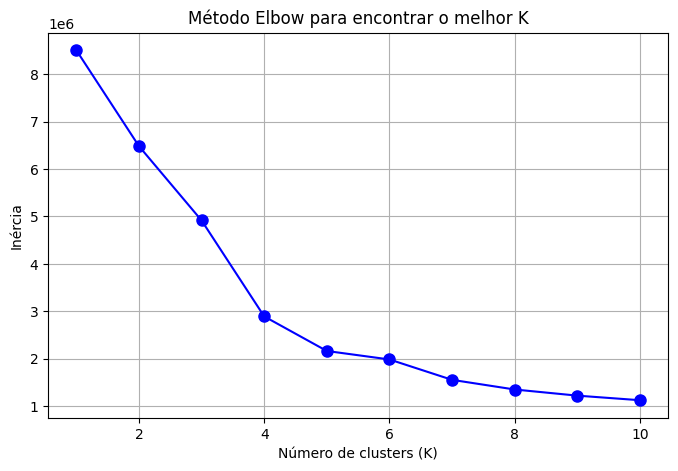

In [311]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df_1[["measure_by_time", "C_condCode", "C_clientCode"]]
features.replace([np.inf, -np.inf], np.nan, inplace=True)

features = features.dropna()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, "bo-", markersize=8)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia")
plt.title("Método Elbow para encontrar o melhor K")
plt.grid(True)
plt.show()

# Refinamento do Consumo por Tempo e Análise por Data

**Gráfico Elbow**: O gráfico acima mostra o resultado da aplicação do **método Elbow** para identificar o número ideal de clusters. Aqui, podemos observar que a inércia diminui drasticamente até cerca de 3-4 clusters, o que sugere que esse pode ser o número ideal de clusters para segmentar os dados.

Após essa análise, continuamos refinando o dataset:

**Etapas:**
1. **Tratamento de Valores Infinitos e Nulos**: Assim como nas etapas anteriores, os valores infinitos (`np.inf`) e `NaN` são removidos para garantir a integridade dos dados.
   
2. **Escalonamento do Consumo**: 
   - A coluna `measure_by_time` é escalada por um fator de 100, armazenada na nova coluna `measure_by_time_scaled`, para normalizar os valores de consumo e facilitar comparações subsequentes.
   - Filtramos para manter apenas os registros onde o consumo escalado é maior que zero, garantindo que apenas dados válidos sejam considerados.

3. **Análise por Data e Condomínio**: 
   - Normalizamos a data (`datetime`) para criar uma coluna no formato `YYYY-MM-DD`, facilitando a agregação por dias.
   - Para cada data única e cada condomínio, calculamos o consumo médio diário (`measure_by_time_avg_consumption`), garantindo que tenhamos uma métrica confiável de consumo para cada dia e condomínio.

Este refinamento é essencial para garantir a consistência dos dados ao longo do tempo e facilitar a análise de padrões diários de consumo, permitindo que anomalias possam ser detectadas em diferentes escalas temporais.


In [312]:
df_1["measure_by_time"] = df_1["measure_by_time"].replace([np.inf, -np.inf], np.nan)
df_1["measure_by_time"] = df_1["measure_by_time"].dropna()

df_1["measure_by_time_scaled"] = df_1["measure_by_time"] * 100
df_1 = df_1[df_1["measure_by_time_scaled"] > 0]

In [313]:
df_1.reset_index(inplace=True, drop=True)
df_1["datetime_yyyy-mm-dd"] = df_1["datetime"].dt.normalize()

for date in np.array(df_1["datetime_yyyy-mm-dd"].unique()):
    measure_days_df_1 = df_1[df_1["datetime_yyyy-mm-dd"] == date]
    for cond in np.array(measure_days_df_1["C_condCode"].unique()):
        measure_avg_consumption = measure_days_df_1[
            measure_days_df_1["C_condCode"] == cond
        ]["measure_by_time"].mean()
        df_1.loc[
            ((df_1["datetime_yyyy-mm-dd"] == date) & (df_1["C_condCode"] == cond)),
            "measure_by_time_avg_consumption",
        ] = measure_avg_consumption

# Comparação do Consumo Total vs Consumo Médio ao Longo do Tempo

Neste gráfico, estamos comparando duas métricas importantes de consumo ao longo do tempo:

1. **Consumo Total (Medido)**:
   - Representado pelos **pontos azuis**, essa métrica (`measure_by_time`) indica o consumo total medido para cada ponto no tempo.
   
2. **Consumo Médio**:
   - Representado pelos **pontos laranja**, essa métrica (`measure_by_time_avg_consumption`) reflete o consumo médio diário do condomínio. É útil para observar a tendência geral de consumo ao longo do tempo.

**Objetivo do Gráfico**:
- Visualizar como o consumo total se comporta em relação à média.
- Identificar períodos onde o consumo total se desvia da média, o que pode indicar anomalias, picos de consumo ou eventos específicos que devem ser investigados.

**Configurações do Gráfico**:
- O eixo Y está limitado entre 0 e 0.01 para facilitar a visualização de pequenas variações de consumo ao longo do tempo.
- A rotação dos rótulos de data no eixo X foi ajustada para melhorar a legibilidade das datas ao longo do tempo.

Esse gráfico é útil para identificar possíveis outliers, picos de consumo e avaliar a eficiência energética ao comparar o comportamento real com a média.


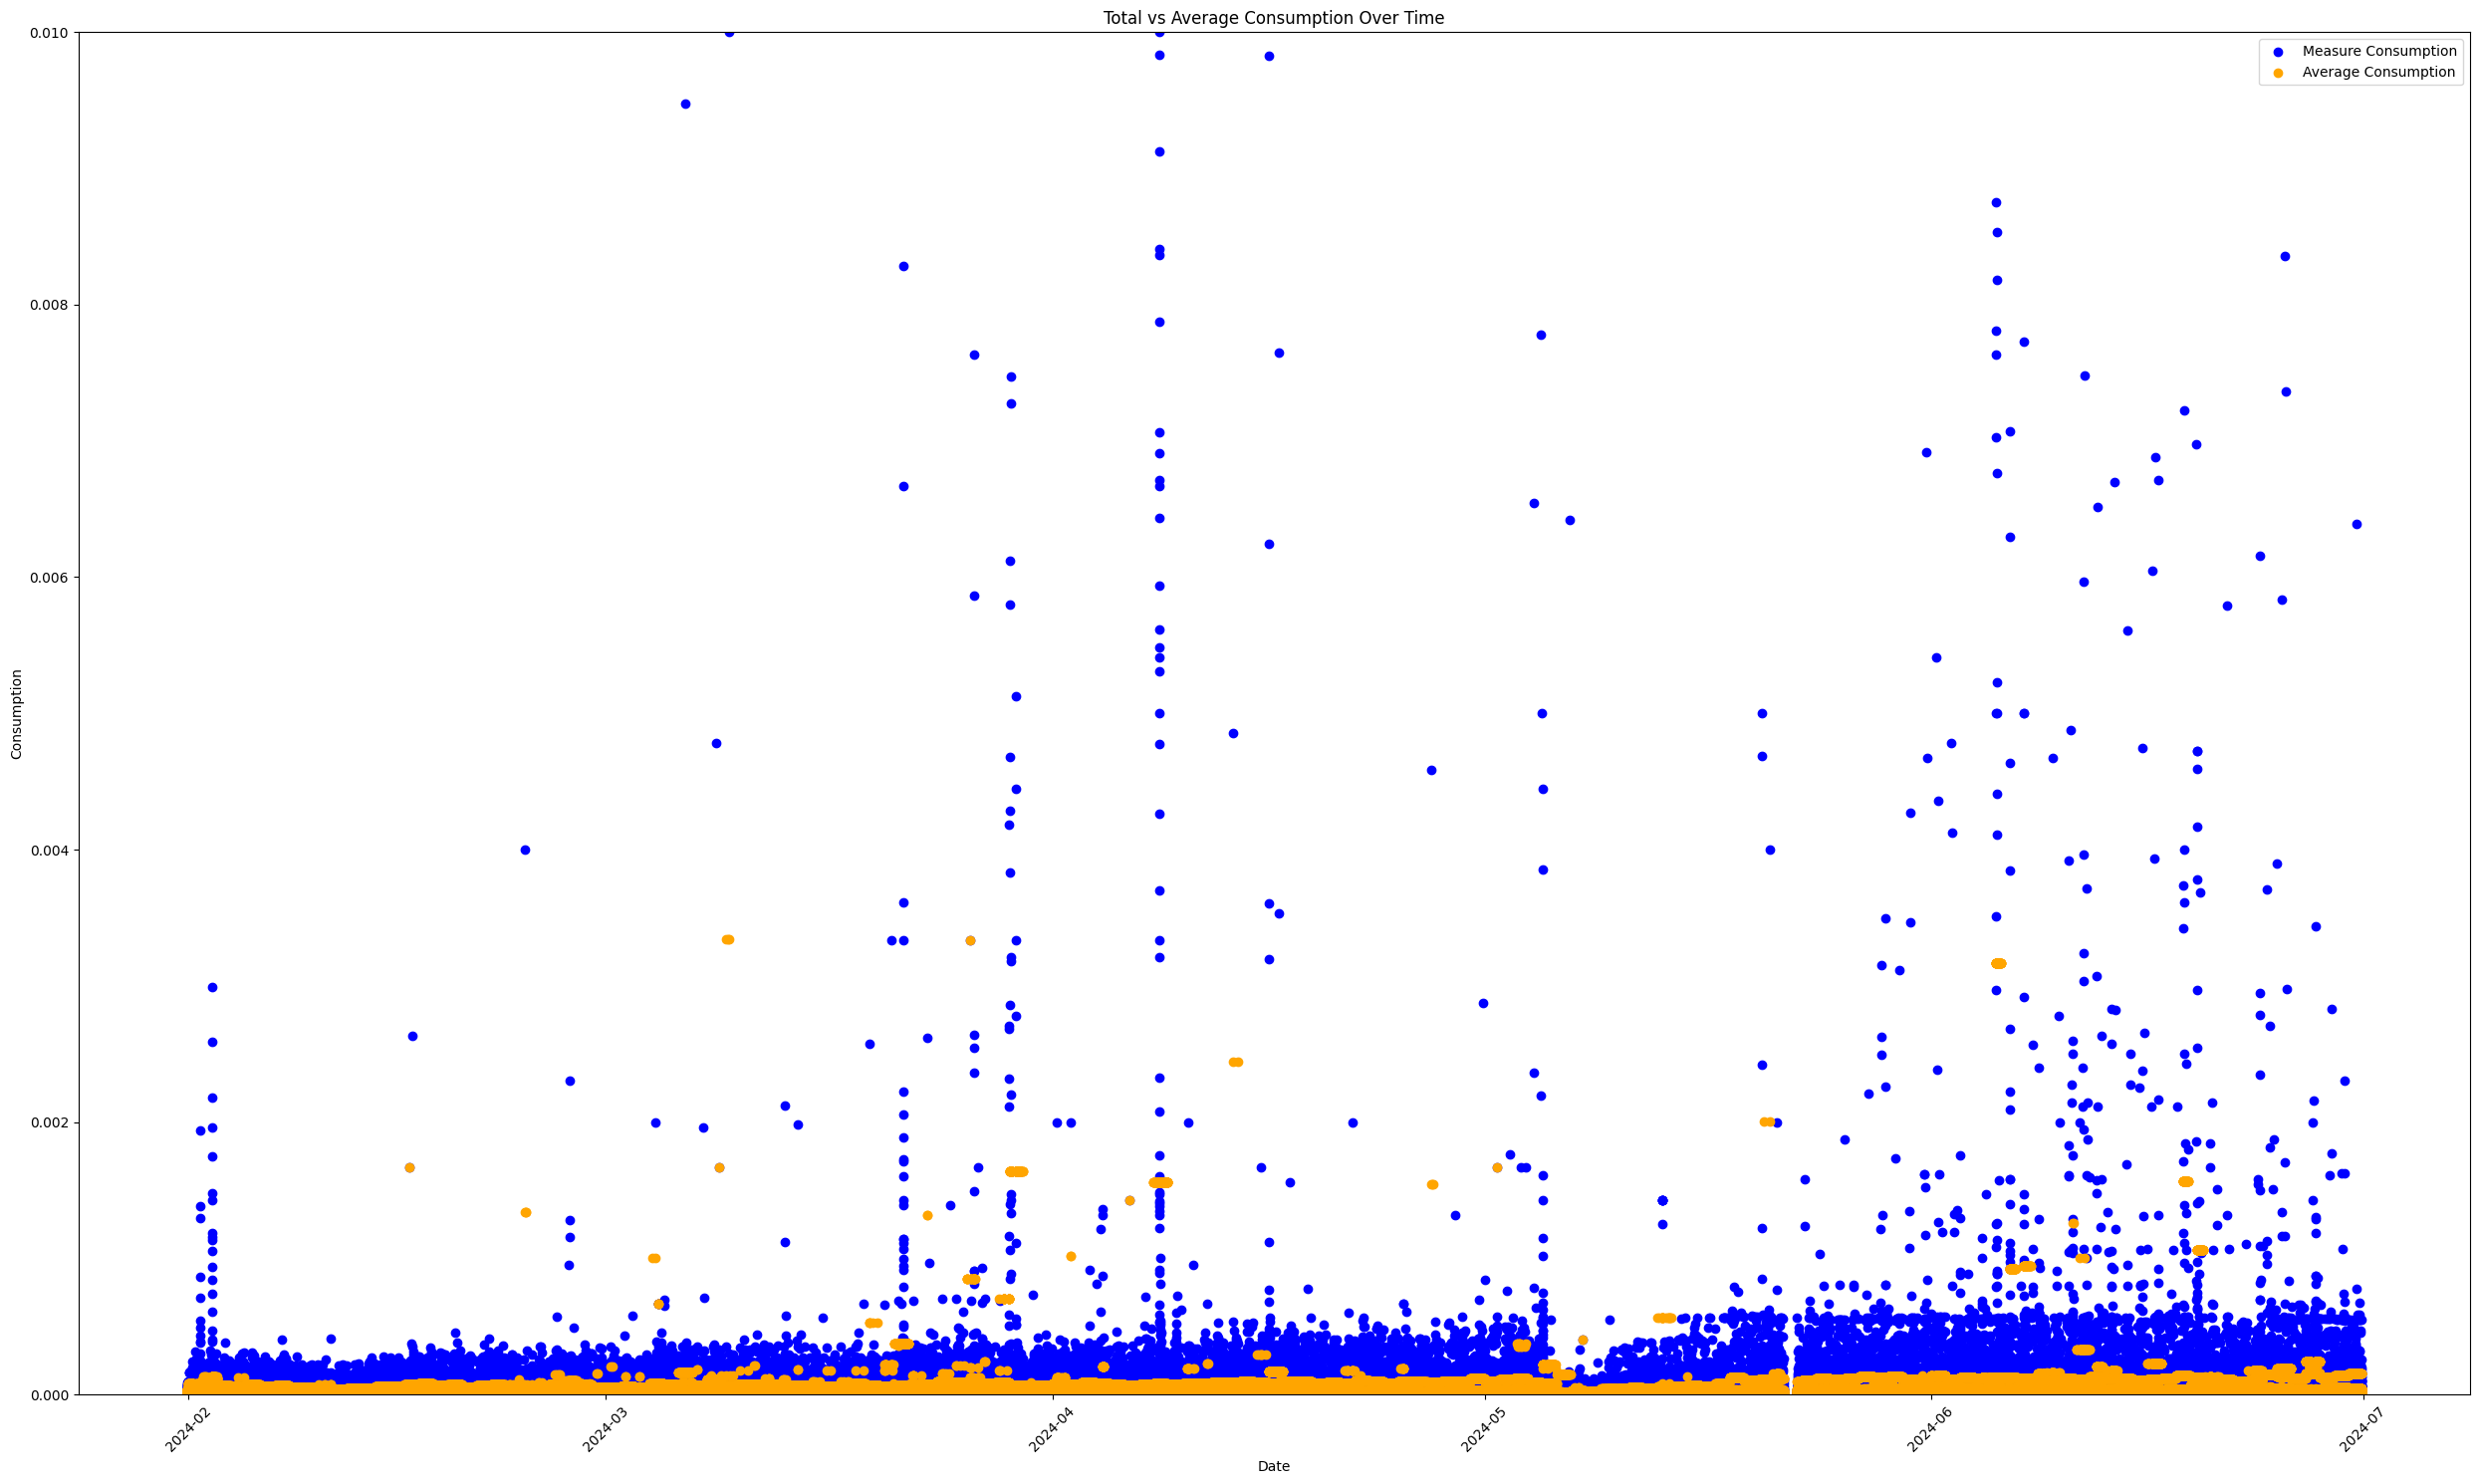

In [314]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df_1["datetime"],
    df_1["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1["datetime"],
    df_1["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
plt.ylim(0, 0.01)
plt.tight_layout()
plt.show()

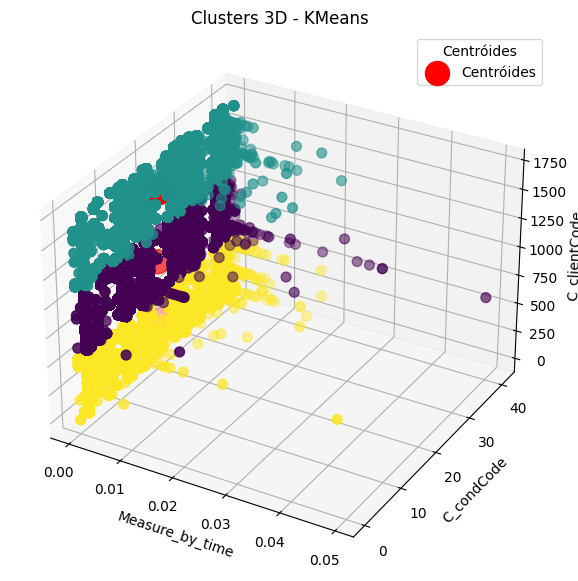

In [315]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Selecionar as features para o KMeans
X = df_1[["measure_by_time", "C_condCode", "C_clientCode"]]

# Aplicar o KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_1["cluster"] = kmeans.fit_predict(X)

# Configurar o gráfico em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotar os dados, usando as três features e colorindo de acordo com os clusters
scatter = ax.scatter(
    df_1["measure_by_time"],
    df_1["C_condCode"],
    df_1["C_clientCode"],
    c=df_1["cluster"],
    cmap="viridis",
    s=50,
)

# Adicionar os centróides no gráfico
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    s=300,
    c="red",
    label="Centróides",
)

# Configurar rótulos e título
ax.set_title("Clusters 3D - KMeans")
ax.set_xlabel("Measure_by_time")
ax.set_ylabel("C_condCode")
ax.set_zlabel("C_clientCode")

# Adicionar uma legenda
legend = ax.legend(loc="upper right", title="Centróides")

# Mostrar o gráfico
plt.show()

# Visualização 3D dos Clusters com K-Means

Neste gráfico 3D, utilizamos o algoritmo K-Means para agrupar os dados de consumo com base em três variáveis principais:
- **Measure_by_time**: Consumo por unidade de tempo.
- **C_condCode**: Código do condomínio.
- **C_clientCode**: Código do cliente.

**Etapas:**
1. **Aplicação do K-Means**: 
   - O algoritmo foi ajustado para gerar 3 clusters com base nas features selecionadas.
   - O resultado da previsão (`cluster`) é adicionado ao dataframe para colorir os pontos no gráfico de acordo com os clusters atribuídos.

2. **Visualização em 3D**: 
   - As três dimensões do gráfico representam as variáveis de entrada. Cada ponto é colorido conforme o cluster ao qual pertence, permitindo uma visão clara da segmentação dos dados.
   - Foram adicionados os **centroides** dos clusters em vermelho, que representam o "centro" de cada grupo. Esses pontos ajudam a visualizar onde estão concentradas as características médias de cada cluster.

**Objetivo do Gráfico**:
- A visualização 3D permite explorar a distribuição dos dados e identificar como os clientes e condomínios estão agrupados com base no consumo. 
- Clusters bem definidos podem ajudar a identificar padrões de consumo similares e distinguir outliers ou comportamentos incomuns.

Este tipo de análise é útil para segmentar clientes com comportamentos similares e entender padrões de consumo em diferentes condomínios.


In [316]:
target_outlier = df_1[df_1["measure_by_time"] > 0.01]["C_clientCode"].value_counts().index[0]
target_outlier

614.0

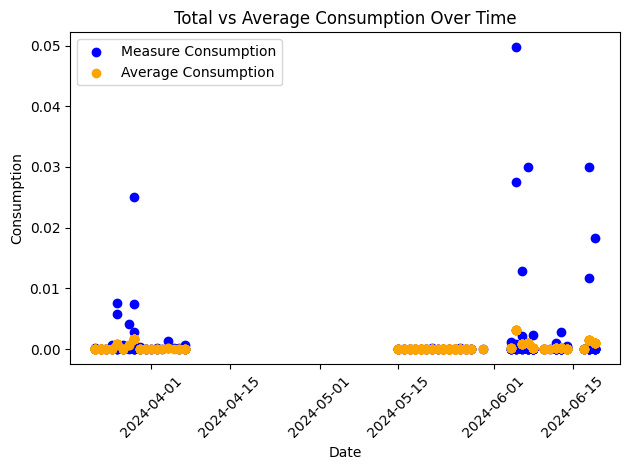

In [317]:
# plt.figure(figsize=(25, 15))

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier]["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier]["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
# plt.ylim(0, 0.01)
plt.tight_layout()
plt.show()

# Identificação e Análise de Outlier no Consumo

Nesta etapa, estamos focando em identificar um **outlier** no consumo, ou seja, um cliente cujo consumo é significativamente maior que o padrão observado.

**Etapas:**
1. **Identificação do Outlier**:
   - Usamos um filtro para identificar o cliente cujo `measure_by_time` (consumo por tempo) excede o limite de 0.01, sendo considerado um consumo fora do normal.
   - A variável `target_outlier` armazena o código do cliente identificado como outlier, para que possamos focar em seu comportamento de consumo.

2. **Comparação do Consumo Total com a Média**:
   - No gráfico, o **consumo total** do outlier é representado pelos **pontos azuis**, enquanto o **consumo médio** é mostrado pelos **pontos laranja**.
   - Esta visualização permite observar claramente a discrepância entre o consumo do outlier e a média do condomínio ao longo do tempo.

**Objetivo do Gráfico**:
- Monitorar o comportamento do cliente fora do padrão e verificar se há picos significativos em determinados períodos.
- Comparar o consumo total com a média para entender o quanto esse cliente se distancia do padrão de consumo geral.

Este tipo de análise é crucial para identificar anomalias de consumo que podem indicar problemas como vazamentos, fraudes ou uso atípico de energia.


In [318]:
df_1[df_1["C_clientCode"] == target_outlier].sort_values(by="datetime")

clientCode  \
111897  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
111898  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
111899  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
111900  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
111901  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
...                                                   ...   
112169  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
112170  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
112171  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
112172  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   
112173  5da85a5135da3d32e222e1aec7672d3d3c15613abf62fb...   

                                                 condCode     timestamp  \
111897  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.711120e+09   
111898  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.711124e+09   
111899  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.711127e+09   
111900  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.711131e+09   
111901  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.711140e+09   
...                                                   ...           ...   
112169  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.718817e+09   
112170  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.718826e+09   
112171  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.718832e+09   
112172  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.718835e+09   
112173  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...  1.718840e+09   

       measure_avg_consumption  measure_diff  C_condCode  C_clientCode  \
111897                0.034869          0.32        40.0         614.0   
111898                0.034869          0.14        40.0         614.0   
111899                0.034869          0.04        40.0         614.0   
111900                0.034869          0.01        40.0         614.0   
111901                0.034869          0.01        40.0         614.0   
...                        ...           ...         ...           ...   
112169                 0.02299          0.11        40.0         614.0   
112170                 0.02299          0.01        40.0         614.0   
112171                 0.02299          0.03        40.0         614.0   
112172                 0.02299          0.20        40.0         614.0   
112173                 0.02299          0.01        40.0         614.0   

        cluster            datetime  match  time_diff_secs  measure_by_time  \
111897        0 2024-03-22 12:07:33   True          2506.0         0.000128   
111898        0 2024-03-22 13:09:40   True          3727.0         0.000038   
111899        0 2024-03-22 14:04:22   True          3282.0         0.000012   
111900        0 2024-03-22 15:08:13   True          3831.0         0.000003   
111901        0 2024-03-22 17:43:41   True          9328.0         0.000001   
...         ...                 ...    ...             ...              ...   
112169        0 2024-06-19 14:03:37   True          1487.0         0.000074   
112170        0 2024-06-19 16:48:10   True          6280.0         0.000002   
112171        0 2024-06-19 18:11:47   True          3567.0         0.000008   
112172        0 2024-06-19 19:14:30   True          3763.0         0.000053   
112173        0 2024-06-19 20:31:14   True          4604.0         0.000002   

        measure_by_time_scaled datetime_yyyy-mm-dd  \
111897                0.012769          2024-03-22   
111898                0.003756          2024-03-22   
111899                0.001219          2024-03-22   
111900                0.000261          2024-03-22   
111901                0.000107          2024-03-22   
...                        ...                 ...   
112169                0.007397          2024-06-19   
112170                0.000159          2024-06-19   
112171                0.000841          2024-06-19   
112172                0.005315     

In [319]:
df_1[df_1["C_clientCode"] == target_outlier]["datetime_yyyy-mm-dd"].unique()

<DatetimeArray>
['2024-03-22 00:00:00', '2024-03-23 00:00:00', '2024-03-24 00:00:00',
 '2024-03-25 00:00:00', '2024-03-26 00:00:00', '2024-03-27 00:00:00',
 '2024-03-28 00:00:00', '2024-03-29 00:00:00', '2024-03-30 00:00:00',
 '2024-03-31 00:00:00', '2024-04-01 00:00:00', '2024-04-02 00:00:00',
 '2024-04-03 00:00:00', '2024-04-04 00:00:00', '2024-04-05 00:00:00',
 '2024-04-06 00:00:00', '2024-04-07 00:00:00', '2024-05-15 00:00:00',
 '2024-05-16 00:00:00', '2024-05-17 00:00:00', '2024-05-18 00:00:00',
 '2024-05-19 00:00:00', '2024-05-20 00:00:00', '2024-05-21 00:00:00',
 '2024-05-22 00:00:00', '2024-05-23 00:00:00', '2024-05-24 00:00:00',
 '2024-05-25 00:00:00', '2024-05-26 00:00:00', '2024-05-27 00:00:00',
 '2024-05-28 00:00:00', '2024-05-30 00:00:00', '2024-06-04 00:00:00',
 '2024-06-05 00:00:00', '2024-06-06 00:00:00', '2024-06-07 00:00:00',
 '2024-06-08 00:00:00', '2024-06-10 00:00:00', '2024-06-11 00:00:00',
 '2024-06-12 00:00:00', '2024-06-13 00:00:00', '2024-06-14 00:00:00',
 '20

# Ordenação e Análise Temporal do Outlier

Nesta etapa, estamos examinando mais de perto o comportamento do cliente identificado como outlier. O objetivo é entender melhor o padrão de consumo desse cliente ao longo do tempo.

**Etapas:**
1. **Ordenação por Data**:
   - O dataframe foi filtrado para o `target_outlier` (cliente fora do padrão), e os dados foram ordenados pela coluna `datetime` para garantir que as análises sigam a sequência cronológica correta.
   - Isso nos permite observar como o consumo evolui ao longo do tempo e se há padrões temporais consistentes de consumo elevado.

2. **Identificação de Datas Únicas**:
   - Usamos o método `.unique()` na coluna de datas para listar todas as datas únicas em que há registros de consumo do outlier.
   - Isso facilita a análise dos dias em que o consumo foi registrado, permitindo identificar se o comportamento anômalo se concentra em datas específicas ou é distribuído de forma mais uniforme.

**Objetivo**:
- Através dessa análise detalhada, conseguimos observar o comportamento do outlier ao longo de diferentes períodos, o que pode ajudar a identificar padrões sazonais, eventos específicos ou falhas no sistema de medição.
- Essa investigação mais profunda pode ser usada para alertar os operadores de possíveis problemas ou anomalias no consumo de energia desse cliente.


# Modelo 2

Nossa abordagem busca melhorar a visualização dos consumos negativos, que foram muito proeminentes nas análises anteriores, expandindo o que apresentamos na última sprint. Para isso, segmentamos a base de dados em duas partes: indivíduos que apresentam consumo negativo e aqueles que não apresentam. Dentro de cada grupo, aplicamos técnicas de clusterização para identificar padrões que possam explicar os consumos negativos.

### Etapas da Análise

1. **Segmentação da Base de Dados:** A base foi dividida em dois subconjuntos: 
   - Pessoas com consumo negativo.
   - Pessoas sem consumo negativo.

2. **Clusterização Inicial com K-Means:**
   - Em cada subconjunto, aplicamos o algoritmo K-Means para identificar agrupamentos dentro das duas populações.
   - Utilizamos o método do cotovelo (Elbow Method) para determinar o número ideal de clusters para cada grupo.
   - Inicialmente, o K-Means não gerou agrupamentos suficientemente distintos para uma análise aprofundada.

3. **Ajuste do Número de Clusters:**
   - Diante dos resultados iniciais, aumentamos o número de clusters para verificar se uma divisão mais granular melhoraria a separação dos grupos.
   - Essa abordagem trouxe uma leve melhora na identificação de padrões, mas ainda não foi o suficiente para explicar completamente os consumos negativos.

4. **Identificação de Anomalias com Isolation Forest:**
   - Para complementar a análise, aplicamos o algoritmo Isolation Forest, que é especializado na detecção de anomalias.
   - Utilizamos o Grid Search para otimizar os hiperparâmetros do Isolation Forest, buscando o melhor ajuste para identificar comportamentos atípicos dentro dos clusters.

### Resultados e Próximos Passos

- A combinação de K-Means e Isolation Forest permitiu uma identificação mais refinada de padrões e anomalias entre os indivíduos com consumo negativo.
- A análise revelou que, em alguns casos, os consumos negativos podem ser atribuídos a comportamentos específicos que se destacam como outliers nos clusters.
- Os próximos passos incluem a análise mais detalhada dos clusters e das anomalias identificadas, com o objetivo de compreender as causas subjacentes dos consumos negativos e propor intervenções específicas.

Com essa abordagem, buscamos não apenas mapear os padrões de consumo, mas também entender as anomalias que surgem nos dados, oferecendo uma visão mais completa e direcionada para a resolução desses casos.

In [320]:
df2 = df.copy()

**Ordenação do DataFrame por código de cliente e data/hora**  
   Neste bloco, os dados são ordenados primeiro pelo código do cliente e, em seguida, pela data/hora. Após isso, é feita a comparação dos códigos de clientes adjacentes para identificar se há continuidade entre os registros.

In [321]:
df2 = df2.sort_values(by=["C_clientCode", "datetime"], ascending=True)

df2["match"] = df2.clientCode.eq(df2.clientCode.shift())

df2

clientCode  \
713520   000b07fd81c1770b514fb2998527b682c4600e0e768680...   
713521   000b07fd81c1770b514fb2998527b682c4600e0e768680...   
713522   000b07fd81c1770b514fb2998527b682c4600e0e768680...   
713523   000b07fd81c1770b514fb2998527b682c4600e0e768680...   
731392   000b07fd81c1770b514fb2998527b682c4600e0e768680...   
...                                                    ...   
2932132  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2932133  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2932134  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2932135  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2932136  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   

                                                  condCode     timestamp  \
713520   0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
713521   0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
713522   0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
713523   0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711668e+09   
731392   0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711754e+09   
...                                                    ...           ...   
2932132  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719714e+09   
2932133  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719718e+09   
2932134  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719744e+09   
2932135  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719751e+09   
2932136  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719762e+09   

        measure_avg_consumption  measure_diff  C_condCode  C_clientCode  \
713520                 0.029778          0.00         0.0           0.0   
713521                 0.029778          0.00         0.0           0.0   
713522                 0.029778          0.00         0.0           0.0   
713523                 0.029778          0.04         0.0           0.0   
731392                 0.022994          0.00         0.0           0.0   
...                         ...           ...         ...           ...   
2932132                  0.0227          0.00         6.0        1716.0   
2932133                  0.0227          0.00         6.0        1716.0   
2932134                  0.0227          0.00         6.0        1716.0   
2932135                  0.0227          0.14         6.0        1716.0   
2932136                  0.0227          0.21         6.0        1716.0   

         cluster            datetime  match  
713520         2 2024-03-28 16:26:06  False  
713521         2 2024-03-28 16:26:20   True  
713522         2 2024-03-28 16:26:39   True  
713523         2 2024-03-28 20:15:58   True  
731392         2 2024-03-29 20:16:08   True  
...          ...                 ...    ...  
2932132        1 2024-06-29 23:21:41   True  
2932133        1 2024-06-30 00:22:42   True  
2932134        1 2024-06-30 07:36:12   True  
2932135        1 2024-06-30 09:40:01   True  
2932136        1 2024-06-30 12:47:41   True  

[2834155 rows x 10 columns]

**Reinicialização dos índices do DataFrame**  
   Aqui, o índice do DataFrame é redefinido para garantir que esteja sequencial, removendo qualquer numeração anterior e ajustando os índices após o processo de ordenação.

In [322]:
df2.reset_index(drop=True, inplace=True)
df2

clientCode  \
0        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
1        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
2        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
3        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
4        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
...                                                    ...   
2834150  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834151  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834152  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834153  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834154  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   

                                                  condCode     timestamp  \
0        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
1        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
2        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
3        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711668e+09   
4        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711754e+09   
...                                                    ...           ...   
2834150  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719714e+09   
2834151  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719718e+09   
2834152  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719744e+09   
2834153  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719751e+09   
2834154  2af8215f2caa0055065c6edf73ac7f638e1c85606545fc...  1.719762e+09   

        measure_avg_consumption  measure_diff  C_condCode  C_clientCode  \
0                      0.029778          0.00         0.0           0.0   
1                      0.029778          0.00         0.0           0.0   
2                      0.029778          0.00         0.0           0.0   
3                      0.029778          0.04         0.0           0.0   
4                      0.022994          0.00         0.0           0.0   
...                         ...           ...         ...           ...   
2834150                  0.0227          0.00         6.0        1716.0   
2834151                  0.0227          0.00         6.0        1716.0   
2834152                  0.0227          0.00         6.0        1716.0   
2834153                  0.0227          0.14         6.0        1716.0   
2834154                  0.0227          0.21         6.0        1716.0   

         cluster            datetime  match  
0              2 2024-03-28 16:26:06  False  
1              2 2024-03-28 16:26:20   True  
2              2 2024-03-28 16:26:39   True  
3              2 2024-03-28 20:15:58   True  
4              2 2024-03-29 20:16:08   True  
...          ...                 ...    ...  
2834150        1 2024-06-29 23:21:41   True  
2834151        1 2024-06-30 00:22:42   True  
2834152        1 2024-06-30 07:36:12   True  
2834153        1 2024-06-30 09:40:01   True  
2834154        1 2024-06-30 12:47:41   True  

[2834155 rows x 10 columns]

**Cálculo da diferença de tempo entre os dois primeiros registros**  
   Este bloco calcula a diferença de tempo (em segundos) entre os dois primeiros registros da coluna de data/hora, permitindo medir o intervalo de tempo entre eventos consecutivos.

In [323]:
x = df2["datetime"][1] - df2["datetime"][0]
print(x.total_seconds())

14.0


**Adição da diferença de tempo entre eventos de clientes iguais**  
   Neste trecho, é criada uma nova coluna para armazenar a diferença de tempo entre medições sucessivas de um mesmo cliente, atribuindo zero quando não há correspondência de cliente.

In [324]:
from datetime import timedelta
df2["time_diff_secs"] = None

df2["time_diff_secs"] = df2["match"].where(df2["match"] == False, df2["datetime"].diff())

df2["time_diff_secs"] = df2["time_diff_secs"].where(
    df2["match"] != False, timedelta(seconds=0).total_seconds(),
)

**Conversão da diferença de tempo para segundos nos eventos de clientes**  
   Aqui, os valores de diferença de tempo calculados anteriormente são convertidos para segundos, simplificando a análise dos intervalos de tempo entre as medições.

In [325]:
df2["time_diff_secs"] = df2["time_diff_secs"].apply(
    lambda x: x.total_seconds() if x != 0.0 else x
)

**Identificação de clientes com medições negativas no consumo médio**  
   Neste bloco, é verificado se algum cliente tem medições de consumo negativo, e uma coluna adicional é criada para marcar os clientes que possuem tais valores.

In [326]:
# Agrupando por cliente e verificando se existe ao menos um valor negativo em 'measure_avg_consumption'
df2['tem_negativos'] = df2.groupby('C_clientCode')['measure_avg_consumption'].transform(lambda x: (x < 0).any())

# Exibindo o resultado
print(df2)



                                                clientCode  \
0        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
1        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
2        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
3        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
4        000b07fd81c1770b514fb2998527b682c4600e0e768680...   
...                                                    ...   
2834150  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834151  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834152  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834153  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   
2834154  ffca45d6539eddf6e5e2c6378f42d5a9c6707e541a628c...   

                                                  condCode     timestamp  \
0        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
1        0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...  1.711654e+09   
2        0fa74b85a2a2ecc65d

**Clusterização de clientes com base no consumo médio usando K-Means**  
   Este trecho aplica o algoritmo K-Means para agrupar clientes em dois cenários: com e sem medições negativas de consumo, permitindo analisar padrões distintos entre os grupos.

C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\3666604031.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


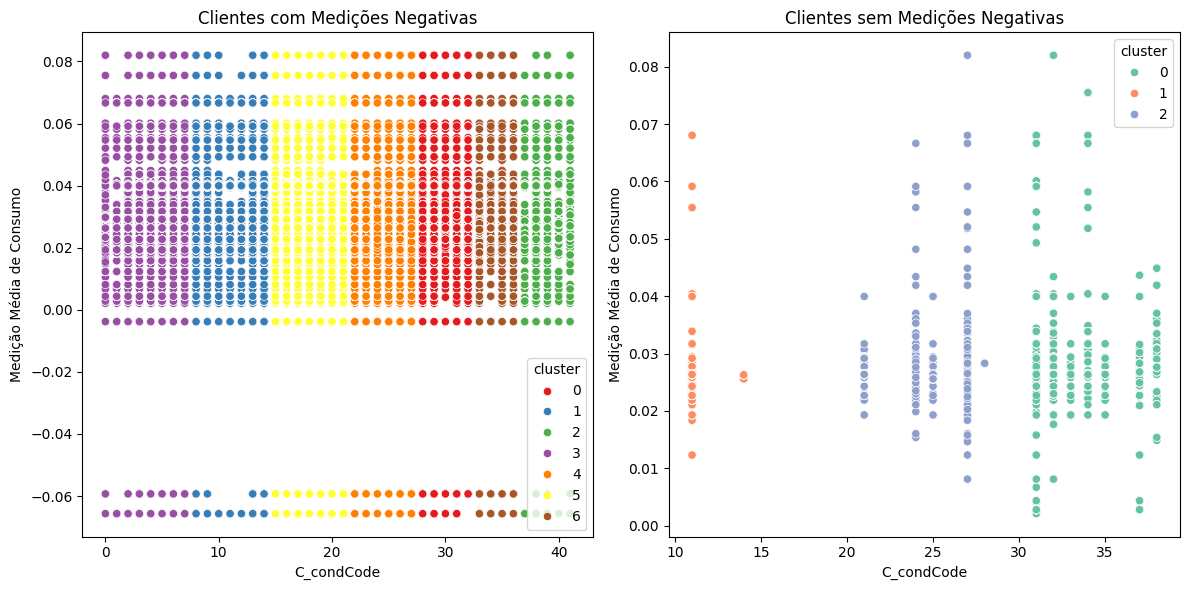

Clusters para clientes com medições negativas:
         C_condCode measure_avg_consumption  cluster
0               0.0                0.029778        3
1               0.0                0.029778        3
2               0.0                0.029778        3
3               0.0                0.029778        3
4               0.0                0.022994        3
...             ...                     ...      ...
2834150         6.0                  0.0227        3
2834151         6.0                  0.0227        3
2834152         6.0                  0.0227        3
2834153         6.0                  0.0227        3
2834154         6.0                  0.0227        3

[2826848 rows x 3 columns]

Clusters para clientes sem medições negativas:
         C_condCode measure_avg_consumption  cluster
42806          37.0                0.023856        0
104018         35.0                0.028297        0
104019         35.0                0.028297        0
104020         35.0          

In [327]:
import seaborn as sns

# Filtrando os dados para clientes com medições negativas
df_negativos = df2[df2['tem_negativos'] == True][['C_condCode', 'measure_avg_consumption']]
df_positivos = df2[df2['tem_negativos'] == False][['C_condCode', 'measure_avg_consumption']]

# Número de clusters definidos a partir dos resultados do Elbow e Silhueta
n_clusters_negativos = 7  # Defina o número de clusters ideal para clientes com medições negativas
n_clusters_positivos = 3  # Defina o número de clusters ideal para clientes sem medições negativas

# Aplicando o K-Means para clientes com medições negativas
kmeans_negativos = KMeans(n_clusters=n_clusters_negativos, random_state=42)
df_negativos['cluster'] = kmeans_negativos.fit_predict(df_negativos)

# Aplicando o K-Means para clientes sem medições negativas
kmeans_positivos = KMeans(n_clusters=n_clusters_positivos, random_state=42)
df_positivos['cluster'] = kmeans_positivos.fit_predict(df_positivos)

# Plotando os clusters para clientes com medições negativas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='C_condCode', y='measure_avg_consumption', hue='cluster', data=df_negativos, palette='Set1')
plt.title('Clientes com Medições Negativas')
plt.xlabel('C_condCode')
plt.ylabel('Medição Média de Consumo')

# Plotando os clusters para clientes sem medições negativas
plt.subplot(1, 2, 2)
sns.scatterplot(x='C_condCode', y='measure_avg_consumption', hue='cluster', data=df_positivos, palette='Set2')
plt.title('Clientes sem Medições Negativas')
plt.xlabel('C_condCode')
plt.ylabel('Medição Média de Consumo')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

# Exibindo os resultados dos clusters
print("Clusters para clientes com medições negativas:")
print(df_negativos)

print("\nClusters para clientes sem medições negativas:")
print(df_positivos)


**Detecção de anomalias em clientes com consumo negativo usando Isolation Forest**  
   Neste bloco, é utilizado o algoritmo Isolation Forest para identificar anomalias (outliers) entre os clientes com medições negativas, ajudando a diferenciar comportamentos anômalos.

C:\Users\paiva\AppData\Local\Temp\ipykernel_14836\2064920300.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


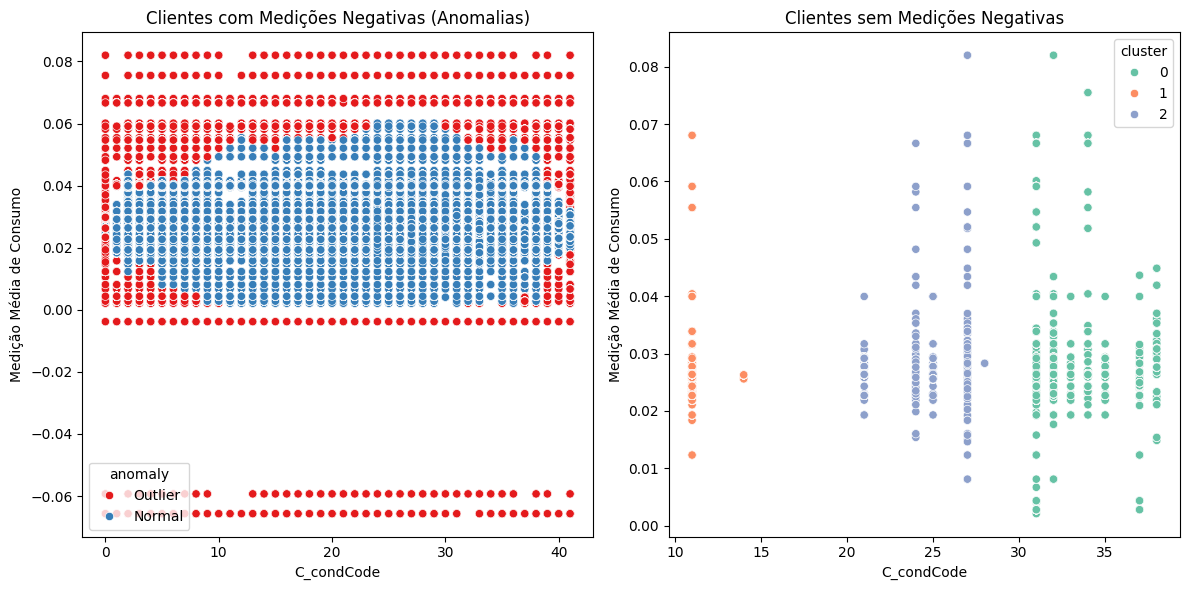

Anomalias para clientes com medições negativas:
         C_condCode measure_avg_consumption  anomaly
0               0.0                0.029778  Outlier
1               0.0                0.029778  Outlier
2               0.0                0.029778  Outlier
3               0.0                0.029778  Outlier
4               0.0                0.022994  Outlier
...             ...                     ...      ...
2834150         6.0                  0.0227   Normal
2834151         6.0                  0.0227   Normal
2834152         6.0                  0.0227   Normal
2834153         6.0                  0.0227   Normal
2834154         6.0                  0.0227   Normal

[2826848 rows x 3 columns]

Clusters para clientes sem medições negativas:
         C_condCode measure_avg_consumption  cluster
42806          37.0                0.023856        0
104018         35.0                0.028297        0
104019         35.0                0.028297        0
104020         35.0         

In [328]:
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrando os dados para clientes com medições negativas
df_negativos = df2[df2['tem_negativos'] == True][['C_condCode', 'measure_avg_consumption']]
df_positivos = df2[df2['tem_negativos'] == False][['C_condCode', 'measure_avg_consumption']]

# Aplicando o Isolation Forest para clientes com medições negativas
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Define 5% dos dados como outliers
df_negativos['anomaly'] = iso_forest.fit_predict(df_negativos)

# O Isolation Forest retorna -1 para anomalias (outliers) e 1 para pontos normais
df_negativos['anomaly'] = df_negativos['anomaly'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')

# Plotando os resultados do Isolation Forest para clientes com medições negativas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='C_condCode', y='measure_avg_consumption', hue='anomaly', data=df_negativos, palette='Set1')
plt.title('Clientes com Medições Negativas (Anomalias)')
plt.xlabel('C_condCode')
plt.ylabel('Medição Média de Consumo')

# Aplicando o K-Means para clientes sem medições negativas (mantendo como K-Means para comparação)
n_clusters_positivos = 3  # Defina o número de clusters ideal para clientes sem medições negativas
kmeans_positivos = KMeans(n_clusters=n_clusters_positivos, random_state=42)
df_positivos['cluster'] = kmeans_positivos.fit_predict(df_positivos)

# Plotando os clusters para clientes sem medições negativas
plt.subplot(1, 2, 2)
sns.scatterplot(x='C_condCode', y='measure_avg_consumption', hue='cluster', data=df_positivos, palette='Set2')
plt.title('Clientes sem Medições Negativas')
plt.xlabel('C_condCode')
plt.ylabel('Medição Média de Consumo')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

# Exibindo os resultados do Isolation Forest
print("Anomalias para clientes com medições negativas:")
print(df_negativos)

print("\nClusters para clientes sem medições negativas:")
print(df_positivos)


**Otimização dos hiperparâmetros do Isolation Forest usando GridSearchCV**  
   Aqui, o algoritmo de Isolation Forest é ajustado utilizando o GridSearchCV, buscando os melhores parâmetros para maximizar a detecção de anomalias em clientes com medições negativas.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros encontrados pelo GridSearch:
{'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50}
Melhor modelo de Isolation Forest:
IsolationForest(contamination=0.01, n_estimators=50, random_state=42)


C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


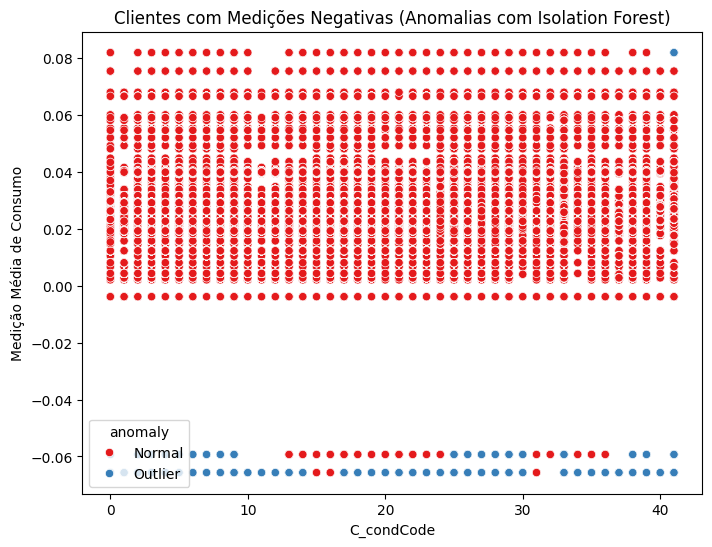

In [329]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Filtrando os dados para clientes com medições negativas
df_negativos = df2[df2['tem_negativos'] == True][['C_condCode', 'measure_avg_consumption']]

# Definindo o modelo de Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Definindo o Grid de Hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100],  # Testar 50, 100 e 200 árvores
    'max_samples': ['auto', 0.6],  # Auto, 60%, 80% ou 100% das amostras
    'contamination': [0.01, 0.05, 0.1],  # Testar 1%, 5% e 10% de contaminação (outliers)
    'max_features': [1.0, 0.5, 0.75]  # Testar todas as features, 50%, 75% das features
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=iso_forest,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    cv=5,  # Validação cruzada com 5 folds
    verbose=1,  # Exibir progresso
    n_jobs=-1  # Usar todos os processadores disponíveis
)

# Rodando o GridSearch
grid_search.fit(df_negativos)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados pelo GridSearch:")
print(grid_search.best_params_)

# Exibindo o melhor modelo
best_model = grid_search.best_estimator_
print("Melhor modelo de Isolation Forest:")
print(best_model)

# Aplicando o melhor modelo aos dados
df_negativos['anomaly'] = best_model.predict(df_negativos)

# Convertendo -1 para "Outlier" e 1 para "Normal"
df_negativos['anomaly'] = df_negativos['anomaly'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')

# Plotando os resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='C_condCode', y='measure_avg_consumption', hue='anomaly', data=df_negativos, palette='Set1')
plt.title('Clientes com Medições Negativas (Anomalias com Isolation Forest)')
plt.xlabel('C_condCode')
plt.ylabel('Medição Média de Consumo')
plt.show()


**Cálculo do número ideal de clusters utilizando o método Elbow**  
   Este bloco implementa o método Elbow para determinar o número ótimo de clusters em clientes sem medições negativas, com base na soma dos erros quadráticos dos clusters.


Clientes sem medições negativas:


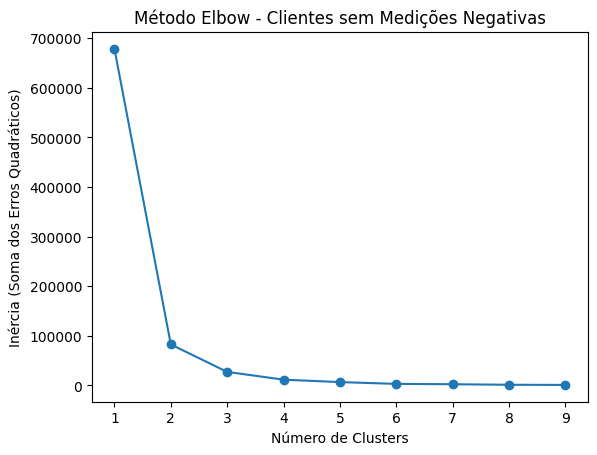

In [330]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Função para calcular e plotar o método Elbow
def plot_elbow(df2, cluster_range, title):
    inertia = []
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df2)
        inertia.append(kmeans.inertia_)
    
    # Plot do método Elbow
    plt.plot(cluster_range, inertia, marker='o')
    plt.title(f'Método Elbow - {title}')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
    plt.show()

cluster_range = range(1, 10)
# Clientes sem medições negativas
print("\nClientes sem medições negativas:")
plot_elbow(df_positivos, cluster_range, 'Clientes sem Medições Negativas')


# Modelo 3

Assim como no primeiro modelo, nos motivamos a comparar um indivíduo contra a média de seu condomínio, mas dessa vez em dias específicos.
### 1. **Preprocessamento dos Dados**
   - **Conversão da Coluna de Tempo**: A coluna `timestamp` foi convertida para um formato de data e hora (`datetime`) para facilitar a manipulação dos dados.
   - **Filtro por Dia da Semana**: O código foi ajustado para filtrar os dados de consumo de acordo com o dia da semana escolhido.
   - **Ordenação dos Dados**: Os dados foram ordenados por condomínio (`condCode`), cliente (`clientCode`) e data (`datetime`) para garantir a consistência temporal das medições.
   - **Cálculo da Diferença de Tempo**: A diferença de tempo entre medições consecutivas foi calculada (`time_diff`), e os valores negativos ou nulos foram removidos para evitar problemas com cálculos de consumo.
### 2. **Tratamento de Valores de Consumo**
   - **Cálculo da Diferença de Consumo**: A coluna `measure_diff` foi criada para calcular a diferença de consumo entre medições consecutivas para cada cliente.
   - **Remoção de Valores Negativos**: Como valores negativos de consumo não fazem sentido no contexto do projeto, eles foram removidos do dataset.
   - **Cálculo do Consumo por Segundo**: A taxa de consumo por segundo foi calculada dividindo `measure_diff` por `time_diff`, criando a coluna `consumption_seconds`. Essa abordagem normaliza o consumo considerando a irregularidade nas medições temporais.
### 3. **Agrupamento de Consumo**
   - **Consumo Individual**: Para cada cliente, foi calculado o consumo total normalizado ao longo do dia, somando a coluna `consumption_seconds`. O resultado foi armazenado na coluna `total_individual_consumption`.
   - **Média de Consumo do Condomínio**: A média de consumo de todos os clientes dentro de cada condomínio, em um determinado dia, foi calculada e armazenada na coluna `mean_cond`.
### 4. **Método do Cotovelo (Elbow Method)**
   - O **método do cotovelo** foi aplicado para determinar o número ideal de clusters ao aplicar o algoritmo **K-Means**. A inércia (soma dos quadrados das distâncias dos pontos ao centróide mais próximo) foi calculada para diferentes valores de K (número de clusters).
   - Um gráfico foi gerado para identificar o ponto de "cotovelo", onde o ganho em separar os dados em mais clusters começa a diminuir, indicando o número ideal de clusters.
### 5. **Aplicação de K-Means**
   - Após determinar o número ideal de clusters pelo método do cotovelo, o algoritmo **K-Means** foi aplicado para agrupar os clientes com base no consumo total individual (`total_individual_consumption`) e na média de consumo do condomínio (`mean_cond`).
   - Os resultados da clusterização foram armazenados na coluna `cluster`, representando a qual grupo cada cliente pertence.
### 6. **Detecção de Anomalias com DBSCAN**
   - O algoritmo **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) foi utilizado para detectar anomalias no comportamento de consumo dos clientes.
   - Dois parâmetros principais foram ajustados:
     - **`eps` (raio de alcance)**: Determina a distância máxima para que dois pontos sejam considerados vizinhos.
     - **`min_samples`**: Define o número mínimo de clientes próximos necessários para formar um cluster.
   - Clientes cujos padrões de consumo estavam muito distantes dos demais foram classificados como **anomalias** e marcados com o rótulo `-1` pelo DBSCAN.
   - Um gráfico de **K-vizinho mais próximo (KNN Distance Plot)** foi utilizado para ajustar o valor de `eps`. O ponto onde a curva da distância começa a subir rapidamente foi identificado como o valor ideal para `eps`.
### 7. **Visualizações e Interpretação**
   - Várias visualizações foram geradas para facilitar a interpretação dos resultados, incluindo:
     - **Gráfico K-Vizinho Mais Próximo**: Utilizado para ajustar o parâmetro `eps` no DBSCAN.
     - **Gráfico do Método do Cotovelo**: Utilizado para determinar o número ideal de clusters para o K-Means.
     - **Gráficos de Dispersão (Scatter Plots)**: Visualizaram os clientes em relação ao consumo individual e ao consumo médio do condomínio, destacando as anomalias detectadas pelo DBSCAN.
### 8. **Análise Final e Conclusões**
   - A análise dos clusters ajudou a identificar grupos de clientes com comportamentos de consumo semelhantes, facilitando a interpretação dos padrões de consumo de energia.
   - O **DBSCAN** foi especialmente útil na detecção de **anomalias**, ou seja, clientes que apresentaram um comportamento de consumo muito diferente do esperado. Esses clientes foram marcados como "anomalias" e podem representar fraudes, erros de medição ou mudanças inesperadas no padrão de consumo.
   - A utilização de técnicas de clusterização e detecção de anomalias forneceu insights valiosos sobre o comportamento de consumo dos clientes, permitindo identificar padrões e possíveis problemas de forma eficiente.
Esse resumo cobre todas as alterações e melhorias feitas no projeto. Ele documenta de forma clara o que foi implementado e como as diferentes técnicas foram utilizadas para alcançar os resultados desejados. Caso precise de mais ajustes ou explicações detalhadas sobre algum ponto específico, estou à disposição!

In [331]:
df3 = df.copy()

**Ordenação do DataFrame e Criação de Coluna de Correspondência**  
Este bloco ordena o DataFrame `df3` pelos códigos do cliente (`C_clientCode`) e pela data/hora (`datetime`) em ordem crescente, e cria uma coluna chamada `match` que indica se o código do cliente atual é igual ao anterior.

In [332]:
df3 = df3.sort_values(by=["C_clientCode", "datetime"], ascending=True)

df3["match"] = df3.clientCode.eq(df3.clientCode.shift())


**Redefinição do Índice do DataFrame**  
Neste trecho, o índice do DataFrame `df3` é redefinido, descartando o índice antigo para facilitar o acesso aos dados.

In [333]:
df3.reset_index(drop=True, inplace=True)

**Cálculo da Diferença de Tempo entre as Primeiras Medições**  
Aqui, a diferença de tempo entre os dois primeiros valores da coluna `datetime` é calculada e impressa em segundos, fornecendo uma visão inicial sobre a periodicidade das medições.

In [334]:
x = df3["datetime"][1] - df3["datetime"][0]
print(x.total_seconds())

14.0


**Criação de Coluna para Diferença de Tempo**  
Importando a classe `timedelta`, este bloco inicializa uma nova coluna `time_diff_secs` e a preenche com a diferença de tempo entre os registros, usando a coluna `match` para determinar se a diferença deve ser considerada ou não.

In [335]:
from datetime import timedelta
df3["time_diff_secs"] = None

df3["time_diff_secs"] = df3["match"].where(df3["match"] == False, df3["datetime"].diff())

df3["time_diff_secs"] = df3["time_diff_secs"].where(
    df3["match"] != False, timedelta(seconds=0).total_seconds(),
)

**Conversão de Diferença de Tempo em Segundos**  
Uma função é aplicada para converter a diferença de tempo em segundos, mantendo os valores zero inalterados, permitindo uma análise mais simples das diferenças de tempo.

In [336]:
df3["time_diff_secs"] = df3["time_diff_secs"].apply(
    lambda x: x.total_seconds() if x != 0.0 else x
)

**Criação de Coluna com o Nome do Dia da Semana**  
Neste bloco, uma coluna que contém o nome do dia da semana é criada a partir da coluna `datetime`. Os dados são filtrados para incluir apenas os registros de domingo, e a diferença de tempo entre medições consecutivas é calculada.

                                            condCode  \
0  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
1  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
2  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
3  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
4  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   

                                          clientCode day_name  \
0  000b07fd81c1770b514fb2998527b682c4600e0e768680...   Sunday   
1  17faf4674e7abf0386d196e0f64c59309c9cadf8f4cbef...   Sunday   
2  45566c91c07c313987d5e9f957be1fa5f432285f638c82...   Sunday   
3  45c710d8b4877aa61c645e9e95b511222b13539db35600...   Sunday   
4  4b306dd84f65d96afdda2a7892c7ac74f79aef8b83783a...   Sunday   

   total_individual_consumption     mean_cond  
0                      0.000000  1.116076e-07  
1                      0.000000  1.116076e-07  
2                      0.000000  1.116076e-07  
3                      0.000108  1.116076e-07  
4                      0.000032 

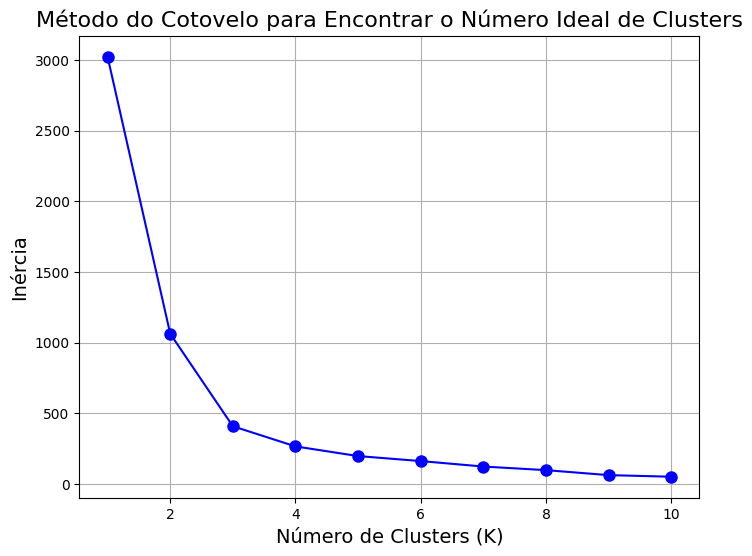

In [337]:

# Cria uma coluna com o nome do dia da semana
df3['day_name'] = df3['datetime'].dt.day_name()

# Filtrar para o dia escolhido
df3 = df3[df3['day_name'] == 'Sunday']

# Garantir que os dados estão ordenados corretamente por condomínio (condCode), cliente (clientCode) e data
df3 = df3.sort_values(by=['condCode', 'clientCode', 'datetime'])

df3['time_diff'] = df3.groupby('clientCode')['datetime'].diff().dt.total_seconds()

# df3 = df3.dropna(subset=['measure_diff', 'time_diff'])

# Evitar divisões por zero ou valores negativos de tempo
df3 = df3[df3['time_diff'] > 0]

# Calcular a taxa de consumo (consumo por segundo) entre as medições
df3['consumption_seconds'] = df3['measure_diff'] / df3['time_diff']

# Agrupar por condCode, clientCode e dia da semana e calcular a diferença de consumo para cada grupo
individual_result = df3.groupby(['condCode', 'clientCode', 'day_name'])['consumption_seconds'].sum().reset_index(name='total_individual_consumption')

cond_result = df3.groupby(['condCode', 'day_name'])['consumption_seconds'].mean().reset_index(name='mean_cond')

df_result = individual_result.merge(cond_result, on=['condCode', 'day_name'], how='left')

print(df_result.head())

X = df_result[['total_individual_consumption', 'mean_cond']]

# X = X.dropna()

# Escalar os dados para a clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o método do cotovelo para encontrar o número ideal de clusters
inertia = []  # Lista para armazenar as inércias
K = range(1, 11)  # Testando de 1 até 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (K)', fontsize=14)
plt.ylabel('Inércia', fontsize=14)
plt.title('Método do Cotovelo para Encontrar o Número Ideal de Clusters', fontsize=16)
plt.grid(True)
plt.show()


**Agrupamento por Condomínio e Cliente**  
Os dados são agrupados por código do condomínio e código do cliente, calculando a soma da taxa de consumo e a média da taxa de consumo para cada condomínio, permitindo uma análise mais profunda do consumo.

In [338]:
# Aplicar K-Means com o número de clusters ideal após analisar o gráfico do método do cotovelo
kmeans = KMeans(n_clusters=2, random_state=42)  # Substitua 3 pelo número ideal encontrado
kmeans.fit(X_scaled)

# Adicionar os rótulos de cluster ao DataFrame original
df_result['cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

# Reverter a escala dos centros para o espaço original
cluster_centers_og = scaler.inverse_transform(cluster_centers)

# Exibir as primeiras linhas para verificar o resultado dos clusters
print(df_result.head())

                                            condCode  \
0  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
1  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
2  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
3  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   
4  0fa74b85a2a2ecc65d2e527e807be6afc0f102eb021cd6...   

                                          clientCode day_name  \
0  000b07fd81c1770b514fb2998527b682c4600e0e768680...   Sunday   
1  17faf4674e7abf0386d196e0f64c59309c9cadf8f4cbef...   Sunday   
2  45566c91c07c313987d5e9f957be1fa5f432285f638c82...   Sunday   
3  45c710d8b4877aa61c645e9e95b511222b13539db35600...   Sunday   
4  4b306dd84f65d96afdda2a7892c7ac74f79aef8b83783a...   Sunday   

   total_individual_consumption     mean_cond  cluster  
0                      0.000000  1.116076e-07        0  
1                      0.000000  1.116076e-07        0  
2                      0.000000  1.116076e-07        0  
3                      0.000108  1.116076e-0

**Filtragem e Exibição do Cluster 1**  
Os dados do Cluster 1 são filtrados, e as primeiras linhas são exibidas, permitindo uma visualização dos clientes pertencentes a esse cluster.

In [339]:
cluster_1 = df_result[df_result['cluster'] == 1]

print(cluster_1.head())

                                               condCode  \
919   b35d3d98f1b3ca1566bdad35916d2ca0150f2e5b75fcf9...   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   
1487  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1488  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1489  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   

                                             clientCode day_name  \
919   89f6635a8eeb858e2477902b481e7daddb939c3a88bc7b...   Sunday   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   Sunday   
1487  030842686c3e45306d96b42f051998d71649402923b6dc...   Sunday   
1488  08d8ecc7118131722904bd4b833c0e854b0bb10a5e53fd...   Sunday   
1489  195a93d4421f7f9f34666f22c44cc3b212c4f4f2e8ee70...   Sunday   

      total_individual_consumption  mean_cond  cluster  
919                      -0.192409  -0.000051        1  
1486                     -0.197435  -0.000145        1  
1487                     -0.101733  -0.000604        1  
1488    

**Identificação de Anomalias com DBSCAN**  
O algoritmo DBSCAN é configurado e aplicado aos dados de consumo, identificando anomalias nos dados com base nos parâmetros definidos.

Anomalias detectadas pelo DBSCAN:
                                               condCode  \
742   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
766   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
919   b35d3d98f1b3ca1566bdad35916d2ca0150f2e5b75fcf9...   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   
1487  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1495  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1500  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1501  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   

                                             clientCode day_name  \
742   4162e4a359ba93cd0acae2746aadff52608c949b67a05f...   Sunday   
766   c73cafe49e656ac94c5d696087817b965a211faff4d15d...   Sunday   
919   89f6635a8eeb858e2477902b481e7daddb939c3a88bc7b...   Sunday   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   Sunday   
1487  030842686c3e45306d96b42f051998d71649402923b6dc...   Sunday   
1495  5da85a5135da3d32e222

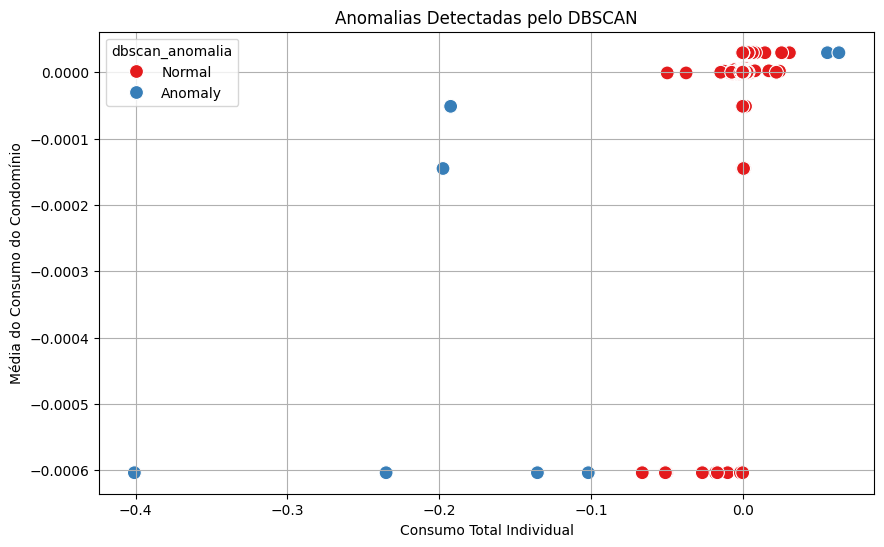

In [340]:
from sklearn.cluster import DBSCAN
# Configurar DBSCAN
dbscan = DBSCAN(eps=0.016, min_samples=3)  # eps define o raio de alcance para formar um cluster, min_samples define o número mínimo de pontos para formar um cluster
# Aplicar DBSCAN nos dados de consumo
X_dbscan = df_result[['total_individual_consumption', 'mean_cond']]
df_result['dbscan_cluster'] = dbscan.fit_predict(X_dbscan)
# DBSCAN atribui o valor -1 para anomalias
df_result['dbscan_anomalia'] = df_result['dbscan_cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
# Visualizar os resultados
print("Anomalias detectadas pelo DBSCAN:")
print(df_result[df_result['dbscan_anomalia'] == 'Anomaly'])
# Visualizar as anomalias detectadas pelo DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_individual_consumption', y='mean_cond', hue='dbscan_anomalia', data=df_result, palette='Set1', s=100)
plt.title('Anomalias Detectadas pelo DBSCAN')
plt.xlabel('Consumo Total Individual')
plt.ylabel('Média do Consumo do Condomínio')
plt.grid(True)
plt.show()

**Cálculo de Distâncias com Nearest Neighbors**  
Este bloco utiliza o algoritmo `NearestNeighbors` para calcular as distâncias entre pontos e gera um gráfico para determinar um valor apropriado para o parâmetro `eps` do DBSCAN.

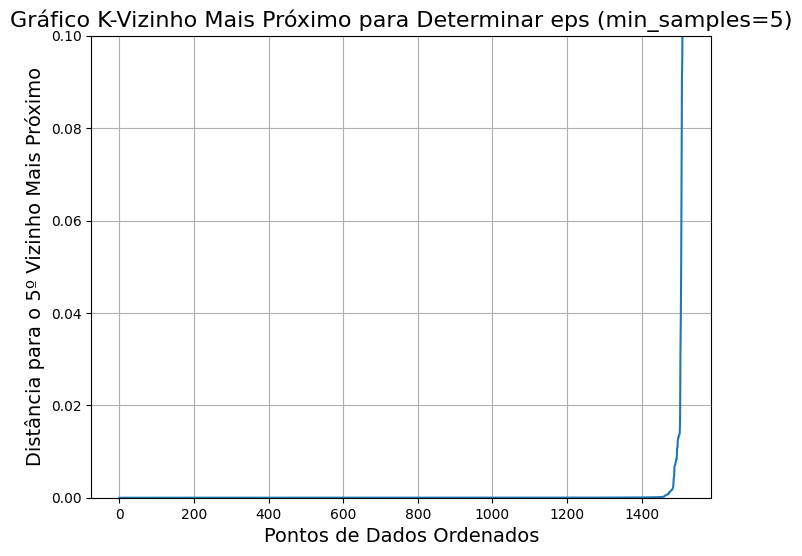

In [341]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Definir o número de vizinhos (min_samples)
min_samples = 5
# Ajustar o modelo Nearest Neighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_dbscan)
distances, indices = nbrs.kneighbors(X_dbscan)
# Ordenar as distâncias dos vizinhos mais próximos
distances = np.sort(distances[:, min_samples-1])
# Plotar o gráfico da distância K-vizinho mais próximol

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel('Pontos de Dados Ordenados', fontsize=14)
plt.ylabel(f'Distância para o {min_samples}º Vizinho Mais Próximo', fontsize=14)
plt.title(f'Gráfico K-Vizinho Mais Próximo para Determinar eps (min_samples={min_samples})', fontsize=16)
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()


**Teste de Vários Valores de `eps` e `min_samples`**  
Diferentes valores de `eps` e `min_samples` são testados para o DBSCAN, e o score de Silhouette é calculado para cada combinação, armazenando a melhor configuração encontrada.

In [342]:
from sklearn.metrics import silhouette_score
# Testar diferentes valores de eps e min_samples
eps_values = [0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.025]  # Exemplo de valores de eps
min_samples_values = [3, 5, 7]  # Exemplo de valores de min_samples
best_score = -1
best_params = None
# Iterar sobre combinações de eps e min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_dbscan)
        # Checar se mais de um cluster foi formado
        if len(set(labels)) > 1:
            # Calcular o score de Silhouette
            score = silhouette_score(X_dbscan, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')
            # Armazenar a melhor configuração de parâmetros
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
print(f'Melhores parâmetros encontrados: eps={best_params[0]}, min_samples={best_params[1]}, Silhouette Score={best_score}')

eps: 0.002, min_samples: 3, Silhouette Score: 0.9608229358651882
eps: 0.002, min_samples: 5, Silhouette Score: 0.964641805314446
eps: 0.002, min_samples: 7, Silhouette Score: 0.960694608932524
eps: 0.003, min_samples: 3, Silhouette Score: 0.9465106644068505
eps: 0.003, min_samples: 5, Silhouette Score: 0.9658625404177943
eps: 0.003, min_samples: 7, Silhouette Score: 0.964641805314446
eps: 0.004, min_samples: 3, Silhouette Score: 0.9465106644068505
eps: 0.004, min_samples: 5, Silhouette Score: 0.9658625404177943
eps: 0.004, min_samples: 7, Silhouette Score: 0.964641805314446
eps: 0.005, min_samples: 3, Silhouette Score: 0.94236677845414
eps: 0.005, min_samples: 5, Silhouette Score: 0.9693011185552359
eps: 0.005, min_samples: 7, Silhouette Score: 0.9670385899467491
eps: 0.006, min_samples: 3, Silhouette Score: 0.9466653256119746
eps: 0.006, min_samples: 5, Silhouette Score: 0.9693011185552359
eps: 0.006, min_samples: 7, Silhouette Score: 0.9693011185552359
eps: 0.007, min_samples: 3, Sil

**Distribuição dos Clusters Formados pelo K-Means**  
Um gráfico é gerado para visualizar a distribuição dos clusters formados pelo K-Means, destacando os centros dos clusters para facilitar a interpretação dos resultados.

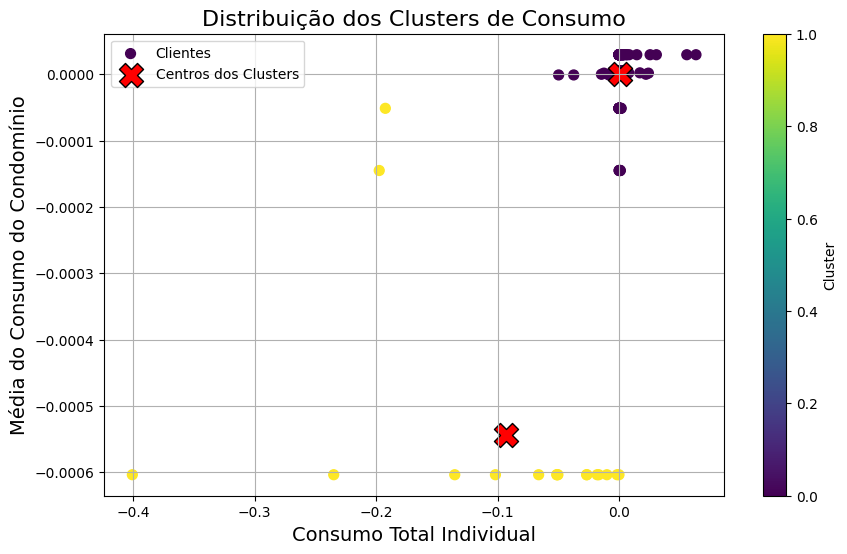

In [343]:
# Plotar os clusters após aplicar o K-Means
plt.figure(figsize=(10, 6))

# Scatter plot dos clusters formados
plt.scatter(df_result['total_individual_consumption'], df_result['mean_cond'], 
            c=df_result['cluster'], cmap='viridis', s=50, label='Clientes')

# Plotar os centros dos clusters
plt.scatter(cluster_centers_og[:, 0], cluster_centers_og[:, 1], 
            c='red', s=300, marker='X', edgecolor='black', label='Centros dos Clusters')

# Rótulos e título
plt.colorbar(label='Cluster')
plt.xlabel('Consumo Total Individual', fontsize=14)
plt.ylabel('Média do Consumo do Condomínio', fontsize=14)
plt.title('Distribuição dos Clusters de Consumo', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

**Contagem de Clientes por Cluster e Cálculo de Estatísticas**  
A quantidade de clientes em cada cluster é contada, e as estatísticas de consumo são calculadas, definindo limites para identificar anomalias no consumo.

In [344]:
# Contar a quantidade de clientes em cada cluster
cluster_counts = df_result['cluster'].value_counts()
print("Quantidade de clientes em cada cluster:")
print(cluster_counts)
# Calcular as estatísticas dos clusters
cluster_stats = df_result.groupby('cluster').agg({
    'total_individual_consumption': ['mean', 'std'],
    'mean_cond': ['mean', 'std']
}).reset_index()

print(cluster_stats)

# Definir um limite para identificar anomalias
def identify_anomaly(row, stats):
    cluster = row['cluster']
    mean_individual = stats.loc[stats['cluster'] == cluster, ('total_individual_consumption', 'mean')].values[0]
    std_individual = stats.loc[stats['cluster'] == cluster, ('total_individual_consumption', 'std')].values[0]
 
    if row['total_individual_consumption'] > mean_individual + 2 * std_individual:
        return 'Acima da media'
    elif row['total_individual_consumption'] < mean_individual - 2 * std_individual:
        return 'Abaixo da media'
    else:
        return 'Normal'
# Aplicar a função para identificar anomalias
df_result['anomaly'] = df_result.apply(identify_anomaly, axis=1, stats=cluster_stats)

print("Clientes com possíveis anomalias:")
print(df_result[df_result['anomaly'] != 'Normal'])

Quantidade de clientes em cada cluster:
cluster
0    1495
1      17
Name: count, dtype: int64
  cluster total_individual_consumption               mean_cond          
                                  mean       std          mean       std
0       0                     0.000438  0.003272  5.837458e-07  0.000013
1       1                    -0.092958  0.108336 -5.442187e-04  0.000169
Clientes com possíveis anomalias:
                                               condCode  \
182   2a30da99190c1179beddff7d2b09fefac3d83d5b75259b...   
611   5f36799f6d408d2c59d3f4b64b421cb97a294b82a075e7...   
619   5f36799f6d408d2c59d3f4b64b421cb97a294b82a075e7...   
735   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
742   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
743   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
744   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
745   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
766   9b2d5b4678781e53038e91ea5324530a03f27dc1d0e

**Detecção de Anomalias com Isolation Forest**  
O algoritmo Isolation Forest é configurado e aplicado aos dados de consumo para identificar anomalias, fornecendo insights sobre comportamentos atípicos.

Anomalias detectadas pelo Isolation Forest:
                                               condCode  \
919   b35d3d98f1b3ca1566bdad35916d2ca0150f2e5b75fcf9...   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   
1487  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1488  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1489  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1490  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1491  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1492  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1493  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1494  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1495  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1496  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1498  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1499  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1500  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1501  ebf704

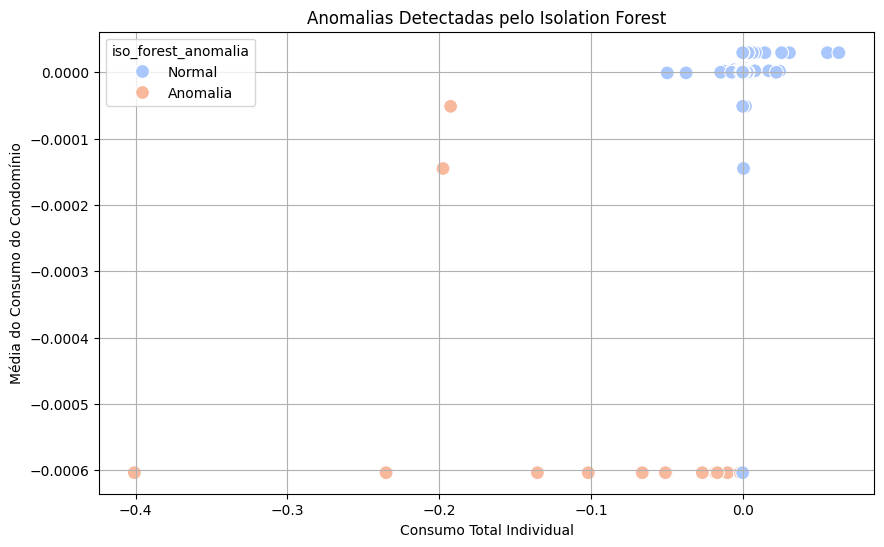

In [345]:
from sklearn.ensemble import IsolationForest
# Configurar Isolation Forest
iso_forest = IsolationForest(bootstrap = False, contamination = 0.01, max_features = 1, max_samples = 0.1, n_estimators = 12, random_state=42)  # Contamination define a proporção esperada de anomalias
# Aplicar Isolation Forest nos dados de consumo
X_iso = df_result[['total_individual_consumption', 'mean_cond']]
df_result['iso_forest_anomalia'] = iso_forest.fit_predict(X_iso)
# -1 indica anomalias, 1 indica pontos normais
df_result['iso_forest_anomalia'] = df_result['iso_forest_anomalia'].map({1: 'Normal', -1: 'Anomalia'})
# Visualizar os resultados  
print("Anomalias detectadas pelo Isolation Forest:")
print(df_result[df_result['iso_forest_anomalia'] == 'Anomalia'])
# Visualizar as anomalias detectadas pelo Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_individual_consumption', y='mean_cond', hue='iso_forest_anomalia', data=df_result, palette='coolwarm', s=100)
plt.title('Anomalias Detectadas pelo Isolation Forest')
plt.xlabel('Consumo Total Individual')
plt.ylabel('Média do Consumo do Condomínio')
plt.grid(True)
plt.show()

**Busca em Grade para Otimização de Hiperparâmetros**  
Uma busca em grade (`GridSearchCV`) é realizada para encontrar os melhores hiperparâmetros do Isolation Forest, garantindo a otimização do modelo.

In [346]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [12, 25, 50, 100, 200, 400, 800],  # Número de árvores
    'max_samples': [0.1,0.25,0.5, 0.75, 1.0],  # Fração das amostras
    'contamination': np.linspace(start=0.01, stop=0.05, num=10),  # Valores de contaminação
    'max_features': [1, 2],  # Número de features
    'bootstrap': [False, True],  # Se deve usar bootstrap
}

# Instanciar o Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Aplicar o GridSearchCV nos dados
X_iso = df_result[['total_individual_consumption', 'mean_cond']]
grid_search.fit(X_iso)

# Verificar os melhores parâmetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Melhores parâmetros encontrados:", best_params)
print("Melhor pontuação F1 obtida:", best_score)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Melhores parâmetros encontrados: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.1, 'n_estimators': 12}
Melhor pontuação F1 obtida: nan


C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


**Busca Aleatória para Ajuste de Hiperparâmetros**  
Neste bloco, uma busca aleatória (`RandomizedSearchCV`) é aplicada ao Isolation Forest para otimizar os hiperparâmetros, permitindo uma análise eficiente.

In [347]:
from sklearn.model_selection import RandomizedSearchCV

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=iso_forest, param_distributions=param_grid, n_iter=50, scoring='f1', cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_iso)

# Verificar os melhores parâmetros encontrados
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Melhores parâmetros encontrados:", best_params)
print("Melhor pontuação F1 obtida:", best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'n_estimators': 12, 'max_samples': 0.1, 'max_features': 2, 'contamination': 0.05, 'bootstrap': False}
Melhor pontuação F1 obtida: nan


C:\Users\paiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


**Visualização do Consumo de Outlier vs. Consumo do Condomínio**  
Um gráfico de dispersão é gerado para comparar o consumo de um outlier com o consumo médio do condomínio, facilitando a identificação de discrepâncias.

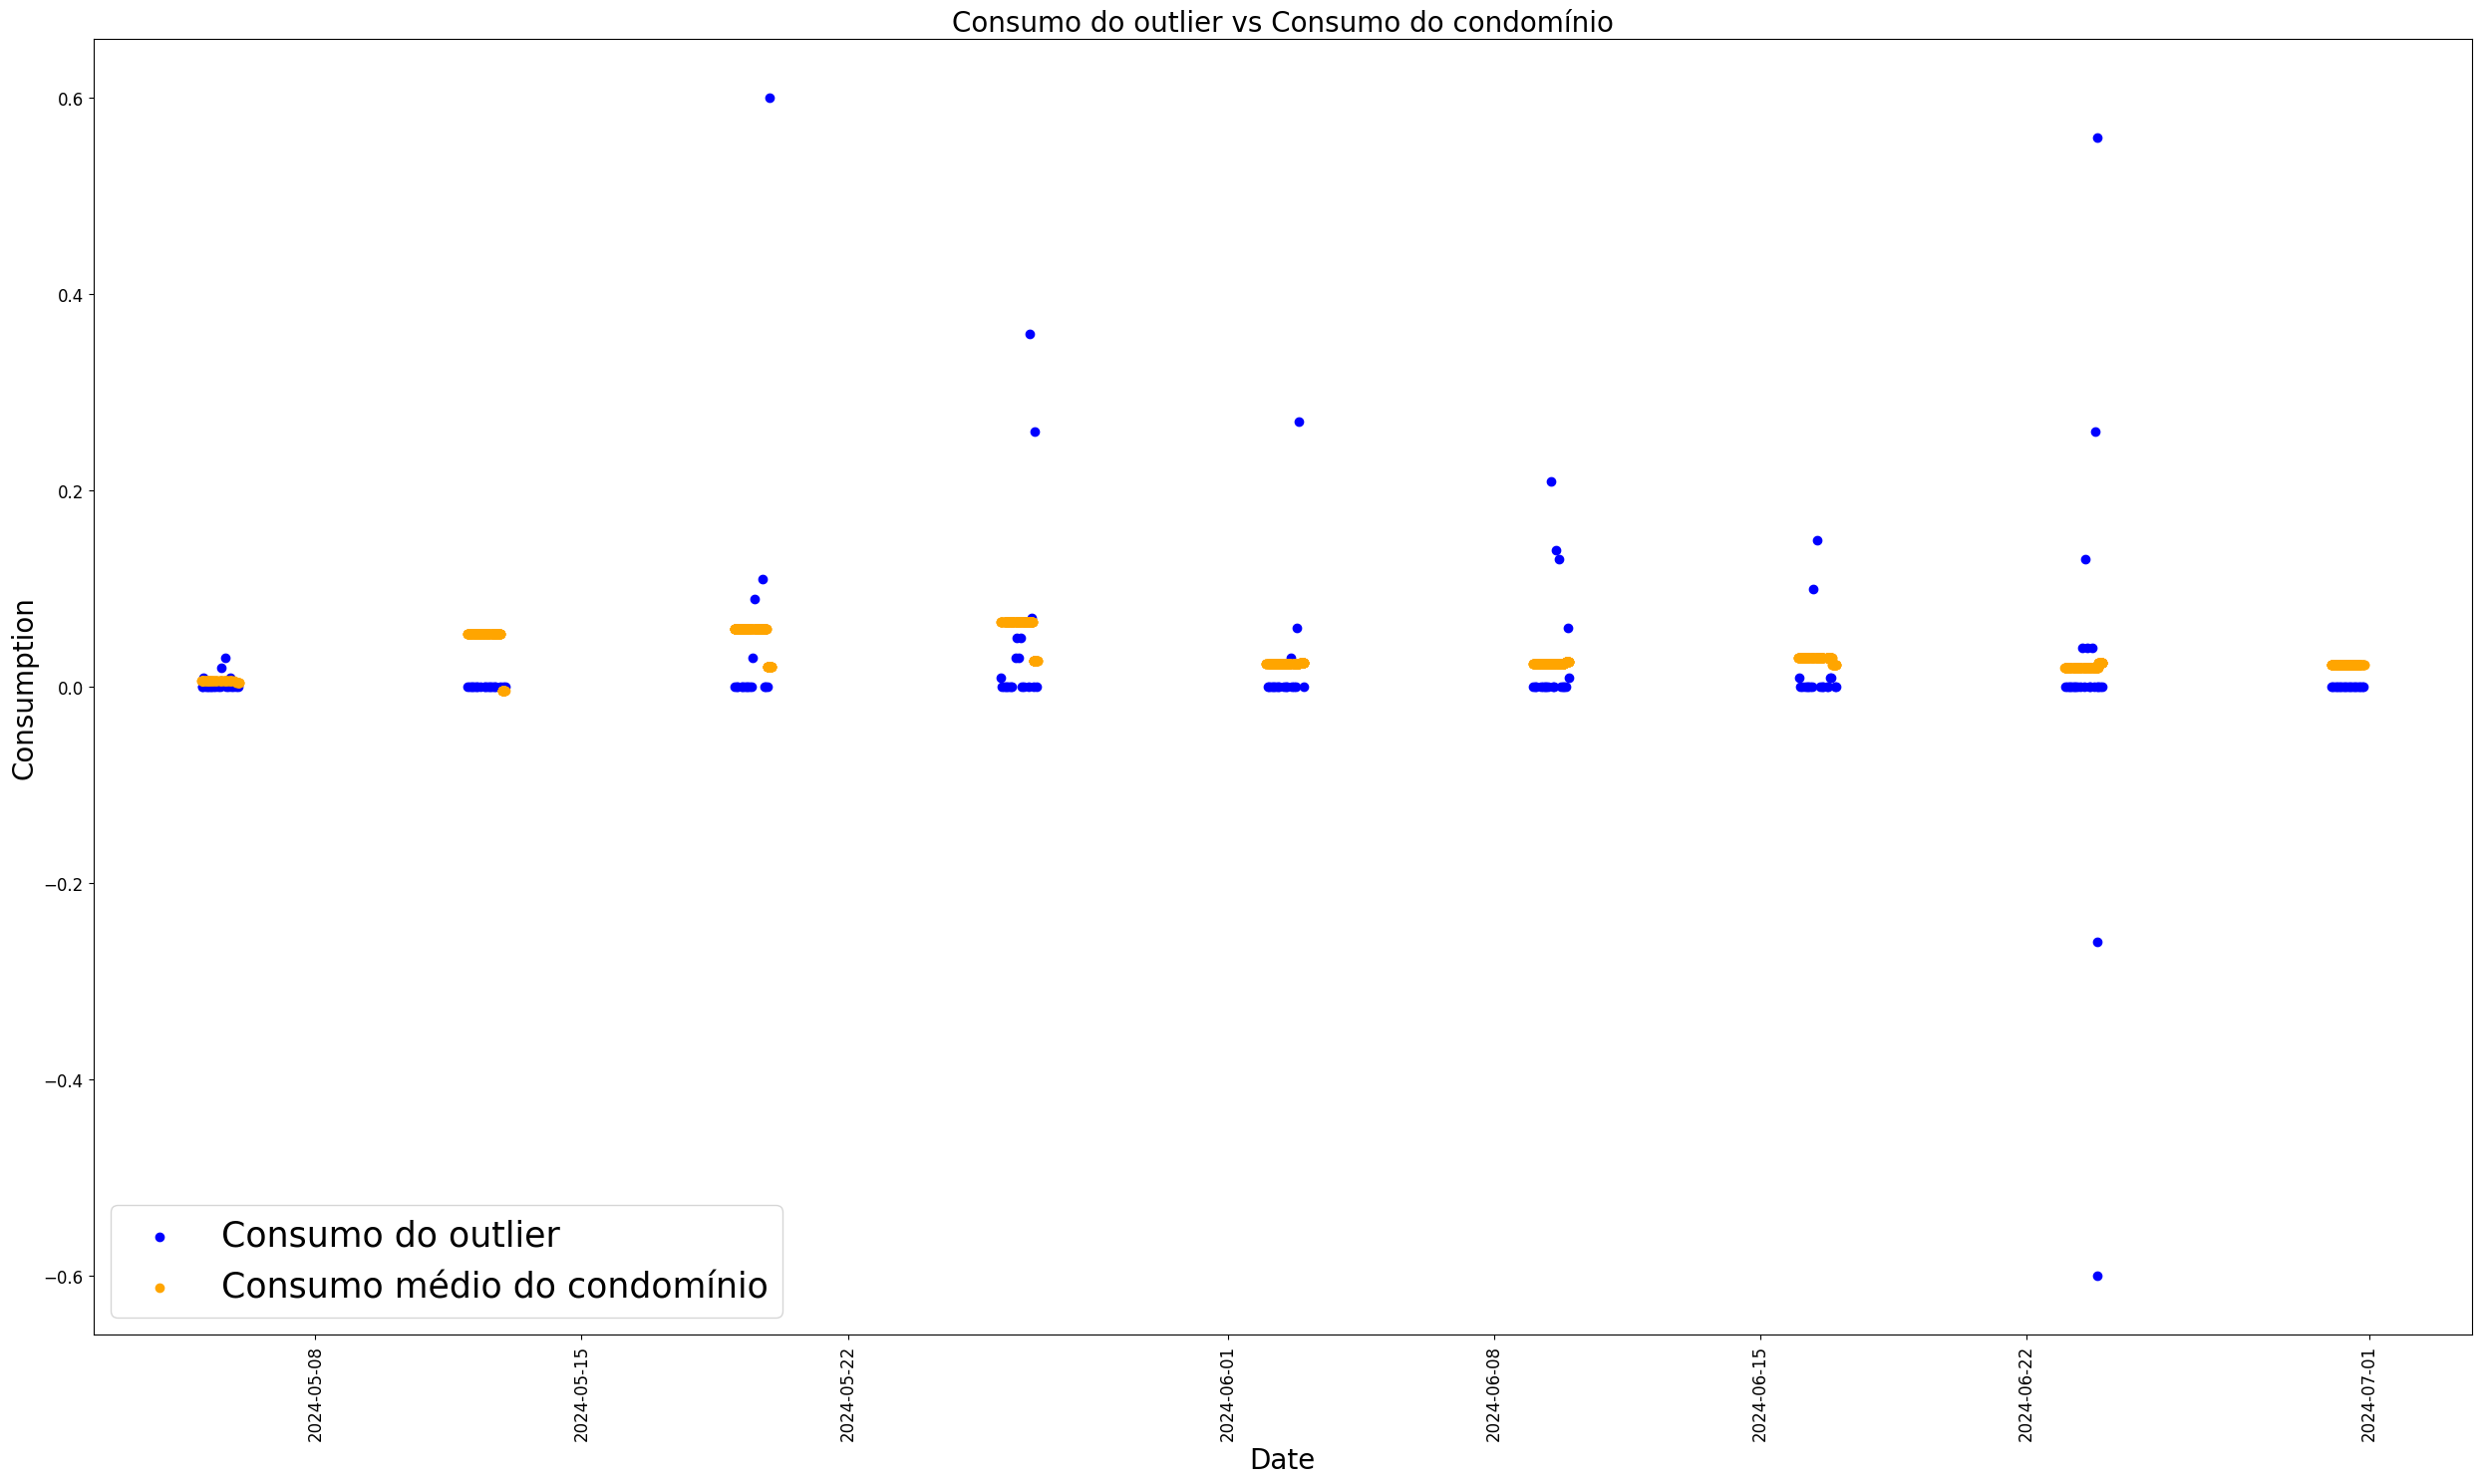

In [348]:
plt.figure(figsize=(25, 15))
# Plotar o consumo do outlier
plt.scatter(
    df3[(df3["C_clientCode"] == 907) & (df3["datetime"] > "2024-05")]["datetime"],
    df3[(df3["C_clientCode"] == 907) & (df3["datetime"] > "2024-05")]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)
# Plotar o consumo médio do condomínio
plt.scatter(
    df3[(df3["C_condCode"] == 27) & (df3["datetime"] > "2024-05")]["datetime"],
    df3[(df3["C_condCode"] == 27) & (df3["datetime"] > "2024-05")]["measure_avg_consumption"],
    label="Consumo médio do condomínio",
    color="orange",
)
# Título e rótulos com tamanho de fonte ajustado
plt.title("Consumo do outlier vs Consumo do condomínio", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Consumption", fontsize=20)

# Configuração dos ticks
plt.xticks(rotation=90, fontsize=12)  # Aumentando o tamanho dos valores no eixo X
plt.yticks(fontsize=12)  # Aumentando o tamanho dos valores no eixo Y


# Adicionar legenda com tamanho de fonte ajustado
plt.legend(fontsize=25)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

**Filtragem de Valores Negativos em `measure_diff`**  
Este trecho verifica se há valores negativos na coluna `measure_diff` e exibe esses valores, se existirem, ajudando a identificar possíveis erros nos dados.

In [349]:
# Filtrar os dados do Cluster 1
cluster_1 = df_result[df_result['cluster'] == 1]
# Exibir as primeiras linhas dos dados do Cluster 1
print("Clientes pertencentes ao Cluster 1:")
print(cluster_1.head())
# Se quiser ver todos os clientes do Cluster 1, pode remover o .head() e usar .to_string() para mostrar todos
print("Todos os clientes pertencentes ao Cluster 1:")
print(cluster_1.to_string())  # Usar to_string() para mostrar o DataFrame inteiro

Clientes pertencentes ao Cluster 1:
                                               condCode  \
919   b35d3d98f1b3ca1566bdad35916d2ca0150f2e5b75fcf9...   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   
1487  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1488  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   
1489  ebf704b30372244d7b32aaaf84fdae1c61b3d3820880f8...   

                                             clientCode day_name  \
919   89f6635a8eeb858e2477902b481e7daddb939c3a88bc7b...   Sunday   
1486  ea73b925dc502d40da7e27b9d7fc194da7d783dbacd77f...   Sunday   
1487  030842686c3e45306d96b42f051998d71649402923b6dc...   Sunday   
1488  08d8ecc7118131722904bd4b833c0e854b0bb10a5e53fd...   Sunday   
1489  195a93d4421f7f9f34666f22c44cc3b212c4f4f2e8ee70...   Sunday   

      total_individual_consumption  mean_cond  cluster  dbscan_cluster  \
919                      -0.192409  -0.000051        1              -1   
1486                     -0.197435  -0.000145       

**Cálculo da Distância entre Clusters**  
A distância entre os clusters formados é calculada, permitindo uma análise da separação entre os grupos e a identificação de possíveis sobreposições.

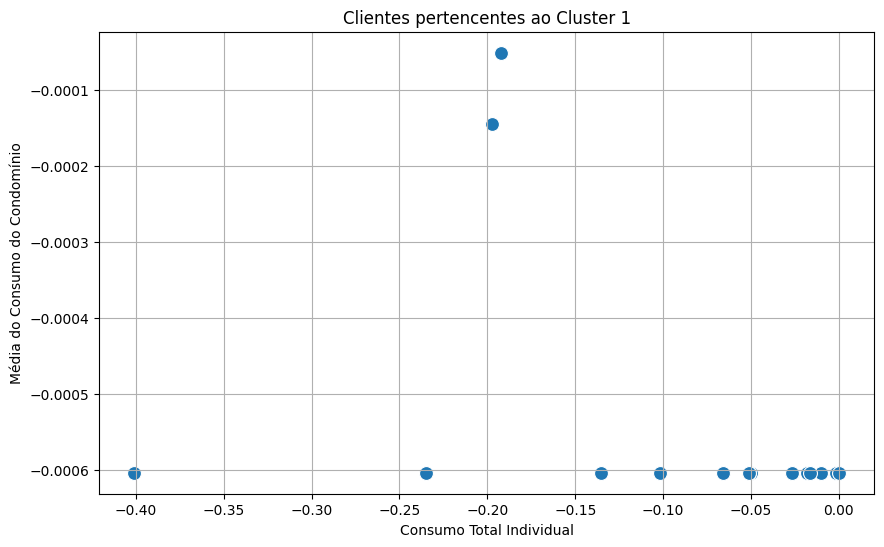

In [350]:
# Gera um gráfico de dispersão para clientes pertencentes ao Cluster 1.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_individual_consumption', y='mean_cond', data=cluster_1, s=100)
plt.title('Clientes pertencentes ao Cluster 1')
plt.xlabel('Consumo Total Individual')
plt.ylabel('Média do Consumo do Condomínio')
plt.grid(True)
plt.show()

**Criação de Gráfico de Tendências ao Longo do Tempo**  
Um gráfico é gerado para visualizar as tendências de consumo ao longo do tempo, permitindo uma análise da evolução dos dados e a identificação de padrões sazonais.

In [351]:
# Verificar se há valores negativos em 'measure_diff'
negativos_measure_diff = df3[df3['measure_diff'] < 0]
# Exibir os valores negativos, se existirem
if not negativos_measure_diff.empty:
    print("Valores negativos encontrados em 'measure_diff':")
    print(negativos_measure_diff[['C_clientCode', 'C_condCode', 'measure_diff']].to_string(index=False))
else:
    print("Não há valores negativos em 'measure_diff'.")

Valores negativos encontrados em 'measure_diff':
 C_clientCode  C_condCode  measure_diff
        117.0         2.0         -0.20
        122.0         2.0         -0.11
        167.0         2.0         -0.01
        180.0         2.0         -0.26
        191.0         2.0         -0.29
        260.0         2.0         -0.44
        264.0         2.0         -0.19
        264.0         2.0         -0.33
        348.0         2.0         -0.01
        406.0         2.0         -0.27
        406.0         2.0         -0.01
        478.0         2.0         -0.34
        497.0         2.0         -0.34
        563.0         2.0         -0.03
        563.0         2.0         -0.18
        624.0         2.0         -0.05
        629.0         2.0         -0.03
        668.0         2.0         -0.08
        678.0         2.0         -0.13
        678.0         2.0         -0.15
        728.0         2.0         -0.05
        756.0         2.0         -0.71
        807.0         2.0      

# **Sprint 5**

### Categorização de Outliers
**Definição dos grupos distintos e seus comportamentos**

**1. Identificação de Medições Inválidas**  
Neste bloco, são identificadas as medições negativas na coluna `measure_diff` e armazenadas no DataFrame `invalid_measure_diff`.

In [352]:
invalid_measure_diff = df3[df3['measure_diff'] < 0]

**2. Impressão de Medições Inválidas**  
As medições inválidas são impressas, exibindo apenas os códigos dos clientes, códigos dos condomínios e as diferenças de medida, sem incluir o índice.

In [354]:
print(invalid_measure_diff[['C_clientCode', 'C_condCode', 'measure_diff']].to_string(index=False))

 C_clientCode  C_condCode  measure_diff
        117.0         2.0         -0.20
        122.0         2.0         -0.11
        167.0         2.0         -0.01
        180.0         2.0         -0.26
        191.0         2.0         -0.29
        260.0         2.0         -0.44
        264.0         2.0         -0.19
        264.0         2.0         -0.33
        348.0         2.0         -0.01
        406.0         2.0         -0.27
        406.0         2.0         -0.01
        478.0         2.0         -0.34
        497.0         2.0         -0.34
        563.0         2.0         -0.03
        563.0         2.0         -0.18
        624.0         2.0         -0.05
        629.0         2.0         -0.03
        668.0         2.0         -0.08
        678.0         2.0         -0.13
        678.0         2.0         -0.15
        728.0         2.0         -0.05
        756.0         2.0         -0.71
        807.0         2.0         -0.02
        807.0         2.0         -0.45


**3. Identificação de Outliers por Consumo**  
Os outliers são filtrados do DataFrame `df_1`, selecionando aqueles com `measure_by_time` superior a 0.007. Os dados são armazenados no DataFrame `outliers`.

In [355]:
outliers = df_1[df_1['measure_by_time'] > 0.007][['C_clientCode','C_condCode', 'measure_by_time']]

print(outliers.to_string(index=False))

 C_clientCode  C_condCode  measure_by_time
         25.0        40.0         0.008750
         25.0        40.0         0.007222
         44.0        29.0         0.011058
         55.0        38.0         0.016522
         66.0        40.0         0.007273
        168.0        38.0         0.007647
        182.0        40.0         0.007812
        198.0        24.0         0.009474
        206.0        40.0         0.018182
        223.0        12.0         0.018606
        223.0        12.0         0.010951
        223.0        12.0         0.008359
        223.0        12.0         0.007363
        223.0        12.0         0.040182
        276.0        29.0         0.008407
        285.0        29.0         0.021429
        441.0        40.0         0.010200
        441.0        40.0         0.007027
        441.0        40.0         0.010882
        441.0        40.0         0.018065
        452.0        29.0         0.015872
        465.0        29.0         0.021484
        506

**4. Extração de Códigos de Clientes Únicos**  
Os códigos de clientes únicos são extraídos do DataFrame `outliers`, permitindo uma análise mais detalhada de cada cliente individual.

In [357]:
outliers_unique = outliers['C_clientCode'].unique()
print(outliers_unique)

[  25.   44.   55.   66.  168.  182.  198.  206.  223.  276.  285.  441.
  452.  465.  506.  558.  578.  614.  618.  624.  674.  694.  856.  881.
  888. 1041. 1184. 1230. 1275. 1281. 1292. 1295. 1316. 1319. 1345. 1385.
 1432. 1543. 1557. 1600. 1618. 1620. 1685. 1688.]


**5. Impressão de Outliers com Detalhes Adicionais**  
O DataFrame `outliers` é atualizado para incluir informações adicionais, como a data/hora e o consumo médio, e os registros filtrados são impressos.

In [358]:
outliers = df_1[df_1['measure_by_time'] > 0.007][['C_clientCode', 'C_condCode', 'datetime_yyyy-mm-dd', 'measure_by_time', 'measure_by_time_avg_consumption']]

# Printar os registros filtrados
print(outliers.to_string(index=False))

 C_clientCode  C_condCode datetime_yyyy-mm-dd  measure_by_time  measure_by_time_avg_consumption
         25.0        40.0          2024-06-05         0.008750                         0.003167
         25.0        40.0          2024-06-18         0.007222                         0.001566
         44.0        29.0          2024-04-08         0.011058                         0.001556
         55.0        38.0          2024-06-27         0.016522                         0.000239
         66.0        40.0          2024-03-29         0.007273                         0.001640
        168.0        38.0          2024-04-16         0.007647                         0.000060
        182.0        40.0          2024-06-05         0.007812                         0.003167
        198.0        24.0          2024-03-06         0.009474                         0.000162
        206.0        40.0          2024-03-29         0.018182                         0.001640
        223.0        12.0          2024-

**6. Cálculo de Estatísticas para Cada Cliente**  
Para cada cliente identificado como outlier, são calculadas e impressas estatísticas como o consumo médio, consumo máximo e mínimo, além do desvio padrão.

In [359]:
for client_code in outliers_unique:
    client_data = df_1[df_1['C_clientCode'] == client_code]

    avg_consumo_cliente = client_data['measure_by_time'].mean()
    avg_consumo_condominio = client_data['measure_by_time_avg_consumption'].mean()
    max_consumo_cliente = client_data['measure_by_time'].max()
    min_consumo_cliente = client_data['measure_by_time'].min()
    std_dev = client_data['measure_by_time'].std()

    print(f'Estatísticas do Cliente {client_code}:')
    print(f'Consumo Médio do Cliente: {avg_consumo_cliente}')
    print(f'Consumo Médio do Condomínio: {avg_consumo_condominio}')
    print(f'Consumo Máximo do Cliente: {max_consumo_cliente}')
    print(f'Consumo Mínimo do Cliente: {min_consumo_cliente}')
    print(f'Desvio Padrão do Consumo: {std_dev}')
    print('-' * 50)

Estatísticas do Cliente 25.0:
Consumo Médio do Cliente: 0.0002522466093989612
Consumo Médio do Condomínio: 0.0003272381158468996
Consumo Máximo do Cliente: 0.008749999999999925
Consumo Mínimo do Cliente: 3.5765379113017834e-07
Desvio Padrão do Consumo: 0.0010627298029370921
--------------------------------------------------
Estatísticas do Cliente 44.0:
Consumo Médio do Cliente: 3.170723363347283e-05
Consumo Médio do Condomínio: 4.622712205402563e-05
Consumo Máximo do Cliente: 0.011057692307692294
Consumo Mínimo do Cliente: 4.459905450004365e-07
Desvio Padrão do Consumo: 0.00039492930898430654
--------------------------------------------------
Estatísticas do Cliente 55.0:
Consumo Médio do Cliente: 5.349759854278709e-05
Consumo Médio do Condomínio: 2.35249792887938e-05
Consumo Máximo do Cliente: 0.016521739130434893
Consumo Mínimo do Cliente: 5.361355350632526e-07
Desvio Padrão do Consumo: 0.0007933936352497604
--------------------------------------------------
Estatísticas do Cliente 

**7. Análise de Clientes do Grupo 1**  
Os clientes do Grupo 1 são filtrados e suas estatísticas de consumo são calculadas e exibidas, focando em anomalias constantes.

In [360]:
# Lista de clientes do Grupo 1
grupo_1_clientes = [614.0, 223.0, 1295.0]

# Filtrar o DataFrame para os clientes do Grupo 1
grupo_1_data = outliers[outliers['C_clientCode'].isin(grupo_1_clientes)]

# Iterar sobre os clientes do Grupo 1 e calcular as estatísticas
print("Grupo 1 - Anomalias Constantes: Clientes com 5 ou mais ocorrências")
for client_code in grupo_1_clientes:
    client_data = grupo_1_data[grupo_1_data['C_clientCode'] == client_code]

    mean_client = client_data['measure_by_time'].mean()
    mean_condominium = client_data['measure_by_time_avg_consumption'].mean()
    std_dev = client_data['measure_by_time'].std()
    occurrences_count = len(client_data)

    print(f"Cliente: {client_code}")
    print(f"Consumo Médio do Cliente: {mean_client}")
    print(f"Consumo Médio do Condomínio: {mean_condominium}")
    print(f"Desvio Padrão do Consumo do Cliente: {std_dev}")
    print(f"Total de Ocorrências: {occurrences_count}")
    print('-' * 50)


Grupo 1 - Anomalias Constantes: Clientes com 5 ou mais ocorrências
Cliente: 614.0
Consumo Médio do Cliente: 0.022037099610048076
Consumo Médio do Condomínio: 0.0016527273399340125
Desvio Padrão do Consumo do Cliente: 0.013137747631922634
Total de Ocorrências: 10
--------------------------------------------------
Cliente: 223.0
Consumo Médio do Cliente: 0.017092186365035816
Consumo Médio do Condomínio: 0.00017101562249764358
Desvio Padrão do Consumo do Cliente: 0.013638792564592859
Total de Ocorrências: 5
--------------------------------------------------
Cliente: 1295.0
Consumo Médio do Cliente: 0.012050015460729698
Consumo Médio do Condomínio: 0.001995856988262855
Desvio Padrão do Consumo do Cliente: 0.005740946849100279
Total de Ocorrências: 5
--------------------------------------------------


**8. Análise de Clientes do Grupo 2**  
Os clientes do Grupo 2 são filtrados e suas estatísticas de consumo são calculadas e exibidas, focando em anomalias pontuais.

In [361]:
# Lista de clientes do Grupo 2
grupo_2_clientes = [44.0, 182.0, 276.0, 452.0, 578.0, 694.0, 1184.0, 1275.0, 1292.0,
                    1319.0, 1385.0, 1432.0, 1543.0, 1600.0, 1618.0, 1620.0, 1688.0]

# Filtrar o DataFrame para os clientes do Grupo 2
grupo_2_data = outliers[outliers['C_clientCode'].isin(grupo_2_clientes)]

# Iterar sobre os clientes do Grupo 2 e calcular as estatísticas
print("Grupo 2 - Anomalias Pontuais: Clientes com apenas uma ocorrência e pouca variação em relação ao condomínio")
for client_code in grupo_2_clientes:
    client_data = grupo_2_data[grupo_2_data['C_clientCode'] == client_code]

    mean_client = client_data['measure_by_time'].mean()
    mean_condominium = client_data['measure_by_time_avg_consumption'].mean()
    occurrences_count = len(client_data)

    print(f"Cliente: {client_code}")
    print(f"Consumo Médio do Cliente: {mean_client}")
    print(f"Consumo Médio do Condomínio: {mean_condominium}")
    print(f"Total de Ocorrências: {occurrences_count}")
    print('-' * 50)


Grupo 2 - Anomalias Pontuais: Clientes com apenas uma ocorrência e pouca variação em relação ao condomínio
Cliente: 44.0
Consumo Médio do Cliente: 0.011057692307692294
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 182.0
Consumo Médio do Cliente: 0.0078125
Consumo Médio do Condomínio: 0.0031672168416722302
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 276.0
Consumo Médio do Cliente: 0.008407079646017725
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 452.0
Consumo Médio do Cliente: 0.015871559633027495
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 578.0
Consumo Médio do Cliente: 0.020341880341880364
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
----------------

**9. Análise de Clientes do Grupo 3**  
Os clientes do Grupo 3 são filtrados e suas estatísticas de consumo são calculadas e exibidas, focando em anomalias notáveis.

In [362]:
# Lista de clientes do Grupo 3
grupo_3_clientes = [55.0, 198.0, 465.0, 506.0, 558.0, 674.0, 856.0, 881.0,
                    1345.0, 1685.0, 66.0, 168.0, 618.0, 624.0, 1316.0, 206.0, 285.0, 888.0]

# Filtrar o DataFrame para os clientes do Grupo 3
grupo_3_data = outliers[outliers['C_clientCode'].isin(grupo_3_clientes)]

# Iterar sobre os clientes do Grupo 3 e calcular as estatísticas
print("Grupo 3 - Anomalias Notáveis: Clientes com apenas uma ocorrência e alta variação em relação ao condomínio")
for client_code in grupo_3_clientes:
    client_data = grupo_3_data[grupo_3_data['C_clientCode'] == client_code]
    
    mean_client = client_data['measure_by_time'].mean()
    mean_condominium = client_data['measure_by_time_avg_consumption'].mean()
    occurrences_count = len(client_data)

    print(f"Cliente: {client_code}")
    print(f"Consumo Médio do Cliente: {mean_client}")
    print(f"Consumo Médio do Condomínio: {mean_condominium}")
    print(f"Total de Ocorrências: {occurrences_count}")
    print('-' * 50)


Grupo 3 - Anomalias Notáveis: Clientes com apenas uma ocorrência e alta variação em relação ao condomínio
Cliente: 55.0
Consumo Médio do Cliente: 0.016521739130434893
Consumo Médio do Condomínio: 0.00023906375333023296
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 198.0
Consumo Médio do Cliente: 0.009473684210526315
Consumo Médio do Condomínio: 0.00016230933098446444
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 465.0
Consumo Médio do Cliente: 0.021484375
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 506.0
Consumo Médio do Cliente: 0.014062500000000006
Consumo Médio do Condomínio: 0.0015561993262101005
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 558.0
Consumo Médio do Cliente: 0.008285714285714464
Consumo Médio do Condomínio: 0.00037286165379986087
Total de Ocorrências: 1
------------

**10. Análise de Clientes do Grupo 4**  
Os clientes do Grupo 4 são filtrados e suas estatísticas de consumo são calculadas e exibidas, focando em anomalias eventuais.

In [363]:
# Lista de clientes do Grupo 4
grupo_4_clientes = [441.0, 1281.0, 1041.0, 1557.0, 1230.0, 25.0]

# Filtrar o DataFrame para os clientes do Grupo 4
grupo_4_data = outliers[outliers['C_clientCode'].isin(grupo_4_clientes)]

# Iterar sobre os clientes do Grupo 4 e calcular as estatísticas
print("Grupo 4 - Anomalias Eventuais: Clientes com mais de uma ocorrência e menos que 5 ocorrências")
for client_code in grupo_4_clientes:
    client_data = grupo_4_data[grupo_4_data['C_clientCode'] == client_code]
    
    mean_client = client_data['measure_by_time'].mean()
    mean_condominium = client_data['measure_by_time_avg_consumption'].mean()
    std_dev = client_data['measure_by_time'].std()
    occurrences_count = len(client_data)

    print(f"Cliente: {client_code}")
    print(f"Consumo Médio do Cliente: {mean_client}")
    print(f"Consumo Médio do Condomínio: {mean_condominium}")
    print(f"Desvio Padrão do Consumo do Cliente: {std_dev}")
    print(f"Total de Ocorrências: {occurrences_count}")
    print('-' * 50)


Grupo 4 - Anomalias Eventuais: Clientes com mais de uma ocorrência e menos que 5 ocorrências
Cliente: 441.0
Consumo Médio do Cliente: 0.011543474024308928
Consumo Médio do Condomínio: 0.002385096797252435
Desvio Padrão do Consumo do Cliente: 0.0046606253926337595
Total de Ocorrências: 4
--------------------------------------------------
Cliente: 1281.0
Consumo Médio do Cliente: 0.00978093629796418
Consumo Médio do Condomínio: 0.002658251948301859
Desvio Padrão do Consumo do Cliente: 0.002979265703645246
Total de Ocorrências: 3
--------------------------------------------------
Cliente: 1041.0
Consumo Médio do Cliente: 0.013701294457703593
Consumo Médio do Condomínio: 0.001094564614220793
Desvio Padrão do Consumo do Cliente: 0.00518374983179281
Total de Ocorrências: 3
--------------------------------------------------
Cliente: 1557.0
Consumo Médio do Cliente: 0.016928879310344813
Consumo Médio do Condomínio: 8.38906727840356e-05
Desvio Padrão do Consumo do Cliente: 0.00345933705451184
T

**11. Normalização da Data**  
A coluna `datetime` do DataFrame `df3` é normalizada, removendo a informação de hora e mantendo apenas a data.

In [365]:
df3['datetime'] = df3['datetime'].dt.normalize()

**12. Junção de DataFrames**  
O DataFrame `df3` é combinado com `cond_result` utilizando uma junção à esquerda, com base nos códigos dos condomínios e nos nomes dos dias.

In [366]:
df3 = df3.merge(cond_result, on=['condCode', 'day_name'], how='left')

**13. Filtragem de Consumos Negativos**  
Os dados com medições negativas são filtrados e armazenados em `grupo_5_data`, selecionando apenas as colunas necessárias para análise.

In [367]:
grupo_5_data = df3[df3['measure_diff'] < 0]

# Selecionar apenas as colunas necessárias para análise
grupo_5_data = grupo_5_data[['C_clientCode', 'C_condCode', 'datetime', 'measure_diff', 'consumption_seconds', 'mean_cond']]

# Obter os 5 primeiros e 5 últimos clientes
grupo_5_data_head = grupo_5_data.head(5)
grupo_5_data_tail = grupo_5_data.tail(5)

# Concatenar as duas partes para obter um conjunto de análise
grupo_5_sample = pd.concat([grupo_5_data_head, grupo_5_data_tail])


**14. Impressão de Anomalias de Consumos Negativos**  
Para cada cliente em `grupo_5_sample`, são calculadas e impressas estatísticas sobre os consumos negativos.

In [368]:
print("Grupo 5 - Consumos Negativos: Clientes com consumo negativo (5 primeiros e 5 últimos)")
for client_code in grupo_5_sample['C_clientCode'].unique():
    client_data = grupo_5_sample[grupo_5_sample['C_clientCode'] == client_code]

    mean_client = client_data['measure_diff'].mean()
    mean_condominium = client_data['mean_cond'].mean()
    std_dev = client_data['measure_diff'].std()
    min_client = client_data['measure_diff'].min()
    occurrences_count = len(client_data)

    print(f"Cliente: {client_code}")
    print(f"Consumo Médio Negativo do Cliente: {mean_client}")
    print(f"Consumo Médio do Condomínio: {mean_condominium}")
    print(f"Consumo minimo: {min_client}")
    print(f"Total de Ocorrências: {occurrences_count}")
    print('-' * 50)


Grupo 5 - Consumos Negativos: Clientes com consumo negativo (5 primeiros e 5 últimos)
Cliente: 117.0
Consumo Médio Negativo do Cliente: -0.20000000000000284
Consumo Médio do Condomínio: 3.749237592490264e-06
Consumo minimo: -0.20000000000000284
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 122.0
Consumo Médio Negativo do Cliente: -0.10999999999999943
Consumo Médio do Condomínio: 3.749237592490264e-06
Consumo minimo: -0.10999999999999943
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 167.0
Consumo Médio Negativo do Cliente: -0.009999999999990905
Consumo Médio do Condomínio: 3.749237592490264e-06
Consumo minimo: -0.009999999999990905
Total de Ocorrências: 1
--------------------------------------------------
Cliente: 180.0
Consumo Médio Negativo do Cliente: -0.2599999999999909
Consumo Médio do Condomínio: 3.749237592490264e-06
Consumo minimo: -0.2599999999999909
Total de Ocorrências: 1
-----------------------------

**15. Visualização do Consumo do Grupo 1**  
Um gráfico é gerado para visualizar o consumo total e médio ao longo do tempo para um cliente representativo do Grupo 1.

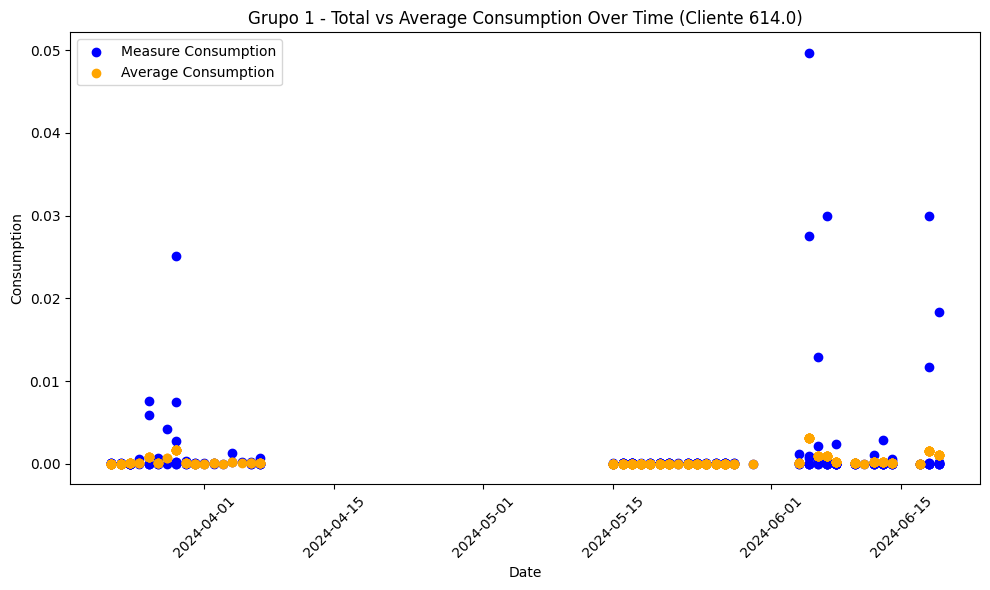

In [369]:
import matplotlib.pyplot as plt

# Escolher cliente representativo do Grupo 1
target_outlier_1 = 614.0

# Plotar gráfico para o Grupo 1
plt.figure(figsize=(10, 6))

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_1]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_1]["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_1]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_1]["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Grupo 1 - Total vs Average Consumption Over Time (Cliente 614.0)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**16. Visualização do Consumo do Grupo 2**  
Um gráfico é gerado para visualizar o consumo total e médio ao longo do tempo para um cliente representativo do Grupo 2.

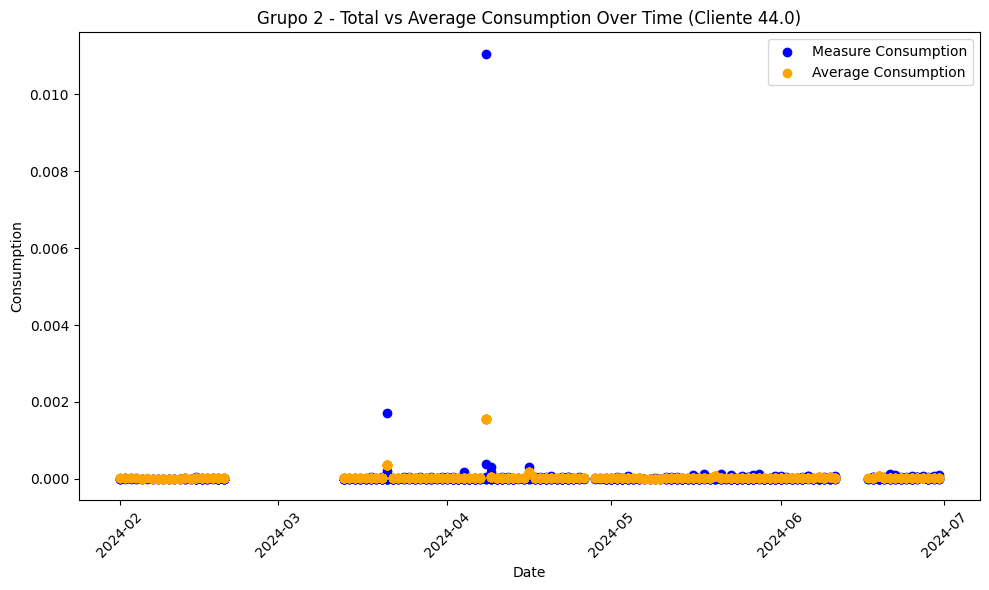

In [370]:
# Escolher cliente representativo do Grupo 2
target_outlier_2 = 44.0

# Plotar gráfico para o Grupo 2
plt.figure(figsize=(10, 6))

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_2]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_2]["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_2]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_2]["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Grupo 2 - Total vs Average Consumption Over Time (Cliente 44.0)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**17. Visualização do Consumo do Grupo 3**  
Um gráfico é gerado para visualizar o consumo total e médio ao longo do tempo para um cliente representativo do Grupo 3.

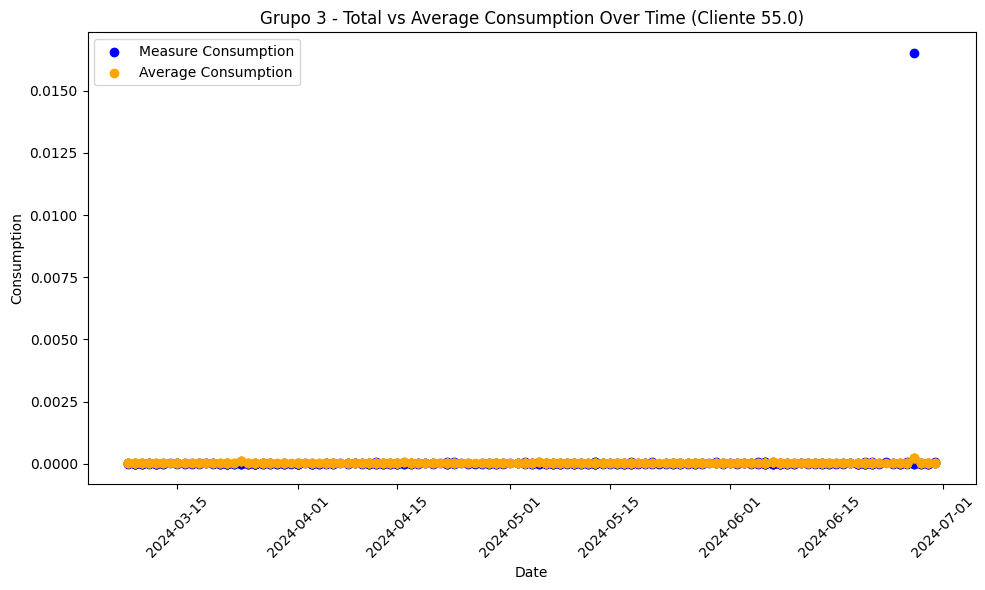

In [371]:
# Escolher cliente representativo do Grupo 3
target_outlier_3 = 55.0

# Plotar gráfico para o Grupo 3
plt.figure(figsize=(10, 6))

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_3]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_3]["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_3]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_3]["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Grupo 3 - Total vs Average Consumption Over Time (Cliente 55.0)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**18. Visualização do Consumo do Grupo 4**  
Um gráfico é gerado para visualizar o consumo total e médio ao longo do tempo para um cliente representativo do Grupo 4.

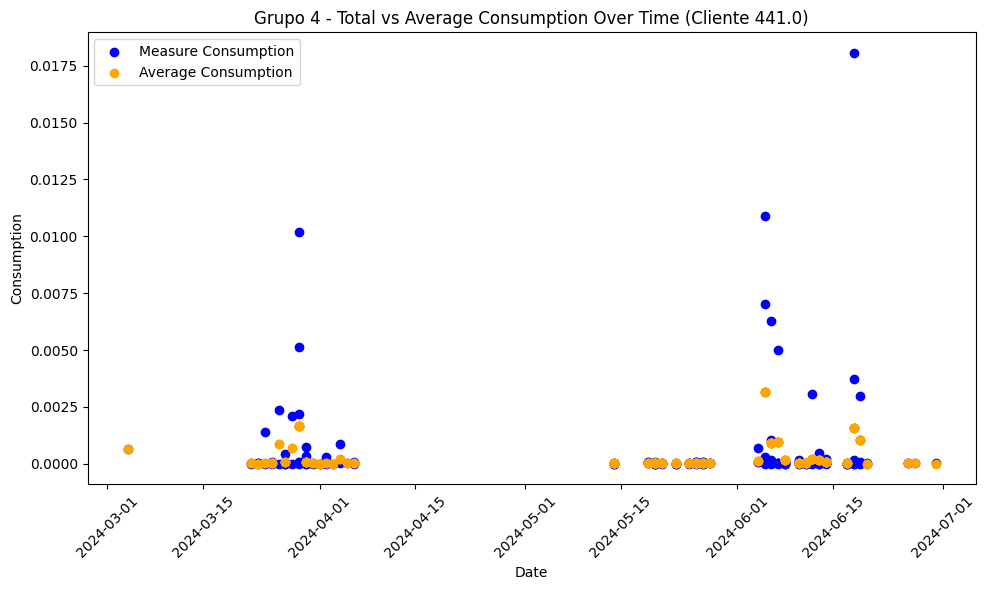

In [372]:
# Escolher cliente representativo do Grupo 4
target_outlier_4 = 441.0

# Plotar gráfico para o Grupo 4
plt.figure(figsize=(10, 6))

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_4]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_4]["measure_by_time"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df_1[df_1["C_clientCode"] == target_outlier_4]["datetime_yyyy-mm-dd"],
    df_1[df_1["C_clientCode"] == target_outlier_4]["measure_by_time_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Grupo 4 - Total vs Average Consumption Over Time (Cliente 441.0)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**19. Visualização do Consumo do Grupo 4 (Cliente 191.0)**  
Um gráfico é gerado para visualizar o consumo total e médio ao longo do tempo para um cliente representativo do Grupo 4, especificamente o cliente 191.0.

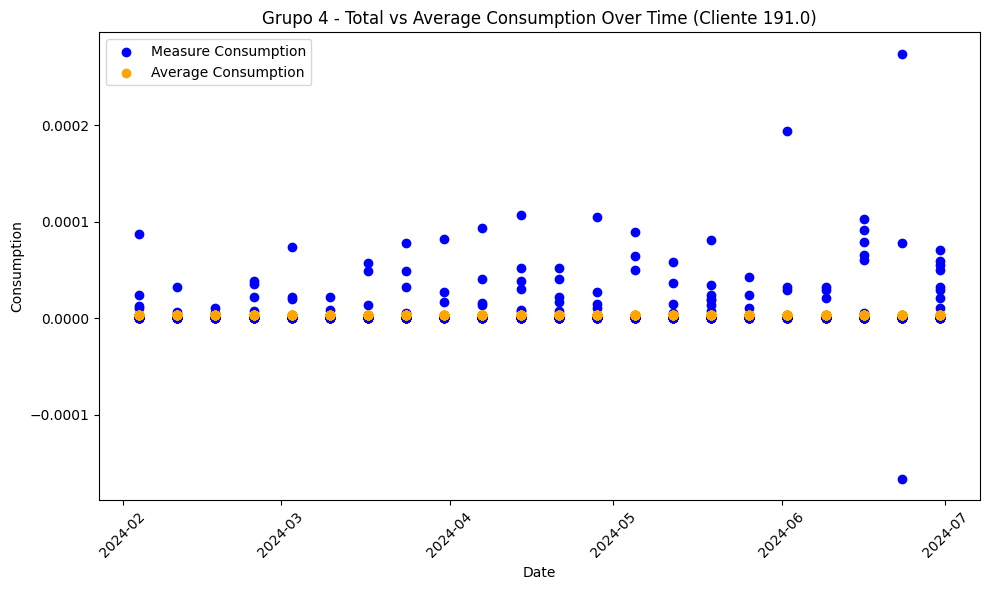

In [373]:
# Escolher cliente representativo do Grupo 4
target_outlier_5 = 191.0

# Plotar gráfico para o Grupo 4
plt.figure(figsize=(10, 6))

plt.scatter(
    df3[df3["C_clientCode"] == target_outlier_5]["datetime"],
    df3[df3["C_clientCode"] == target_outlier_5]["consumption_seconds"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df3[df3["C_clientCode"] == target_outlier_5]["datetime"],
    df3[df3["C_clientCode"] == target_outlier_5]["mean_cond"],
    label="Average Consumption",
    color="orange",
)

plt.title("Grupo 4 - Total vs Average Consumption Over Time (Cliente 191.0)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 4.5. Avaliação

**Solução do Modelo Preditivo e Justificativa da Escolha**

O modelo preditivo selecionado para implementação é o **Modelo 1**, que utiliza o algoritmo de clustering **K-Means** para detectar padrões de consumo e identificar anomalias no uso de gás natural. Esse modelo atende de maneira robusta às necessidades descritas na Seção 4.1, que envolve o entendimento do negócio e das personas, focando nas demandas operacionais da **persona Maria Oliveira**, gerente de operações da Compass Gás e Energia S.A., e seu interesse em garantir monitoramento contínuo, segurança e eficiência no controle do consumo de gás pelos clientes.

O **Modelo 1** foi escolhido por suas capacidades de agrupar clientes com perfis de consumo semelhantes, o que facilita a detecção de variações anômalas no comportamento de consumo. Isso é fundamental para oferecer à Maria Oliveira uma visão clara e objetiva sobre o uso de gás por seus clientes, permitindo o acompanhamento de padrões fora do esperado e apoiando a tomada de decisões estratégicas. Além disso, o cálculo de consumo médio entre as medições elimina picos falsos gerados por problemas nos contadores de pulsos, proporcionando uma visão mais precisa dos dados.

Essa abordagem também contribui para a segurança operacional, uma vez que possibilita a identificação de possíveis anomalias que podem estar relacionadas a falhas no sistema de medição ou variações inesperadas de consumo. 

### Justificativa Alinhada com as Necessidades do Negócio

Conforme discutido na Seção 4.1, o principal objetivo da Compass é garantir um fornecimento de gás seguro e eficiente para seus clientes, além de oferecer um serviço confiável. O **Modelo 1** se alinha a esses objetivos ao fornecer:

- **Agrupamento de clientes com padrões de consumo semelhantes** por meio do **K-Means**, facilitando a identificação de desvios no comportamento de clientes específicos;
- **Detecção de picos falsos** por meio da média entre medições, evitando alarmes incorretos e garantindo que os dados representem de forma precisa o consumo real de gás.

Além disso, o modelo foi testado com diferentes números de clusters para garantir a melhor segmentação dos clientes. O método **Elbow** foi aplicado para determinar o número ideal de clusters, e o resultado sugeriu 3-4 clusters como a configuração mais adequada para identificar padrões diferenciados de consumo.

### Comparativo com Alternativas

- **Modelo 2 (Análise de consumos negativos com clusterização)**: Apesar de útil em cenários específicos, esse modelo se mostrou limitado em sua aplicação mais ampla, uma vez que foca em eventos raros de consumos negativos, o que não atende de forma completa à necessidade de um monitoramento contínuo.
  
- **Modelo 3 (Análise de consumo em dias específicos)**: Este modelo se concentra em comparar o consumo diário com a média do condomínio, mas não oferece a granularidade necessária para uma detecção eficaz de anomalias ao longo do tempo, sendo mais adequado para análises pontuais.

O **Modelo 1** demonstrou maior consistência e abrangência ao lidar com variações temporais e comportamentais, o que o torna a solução mais eficaz para as necessidades operacionais e de monitoramento da Compass.

### Plano de Contingência

Para garantir que o modelo continue a oferecer resultados precisos, mesmo em caso de falhas ou variações inesperadas, o seguinte plano de contingência será implementado:

1. **Revisão dos Dados**: Se ocorrerem inconsistências nos resultados, será feita uma revisão detalhada dos dados de entrada, verificando se há lacunas, erros de medição ou valores discrepantes que possam ter comprometido as predições. Caso necessário, os dados serão ajustados para garantir sua integridade.

2. **Ajuste dos Parâmetros do K-Means**: O número de clusters poderá ser revisado caso o padrão de consumo dos clientes mude significativamente ao longo do tempo. Isso permitirá que o modelo se adapte a novas condições operacionais e comportamentais.

3. **Verificação Manual dos Resultados**: Em situações críticas, a equipe de operações da Compass realizará uma verificação manual dos dados gerados pelo modelo. Isso assegura que anomalias identificadas sejam avaliadas corretamente e que não sejam gerados alertas falsos.

## 5. Conclusões e Recomendações

A implementação do **Modelo 1** trouxe uma visão clara dos padrões de consumo de gás natural, permitindo a detecção de anomalias e um monitoramento eficaz. Essa abordagem atende diretamente às necessidades da **Compass Gás e Energia S.A.**, pois oferece um acompanhamento contínuo do consumo e ajuda a identificar rapidamente qualquer irregularidade.

### Recomendações

Para maximizar os benefícios do modelo, é preciso estabelecer um monitoramento contínuo dos resultados. Isso permitirá que a equipe avalie a precisão do modelo ao longo do tempo e faça os ajustes necessários, garantindo que ele se mantenha alinhado com as mudanças nos padrões de consumo.

Outra sugestão é a ampliação do uso do modelo. Além de monitorar o consumo em condomínios, há uma oportunidade para aplicá-lo em outras áreas, como na distribuição de gás em redes maiores ou contextos industriais. Essa expansão pode trazer ganhos operacionais e aumentar a segurança do fornecimento, fortalecendo ainda mais o papel do modelo na gestão do consumo.

### Próximos Passos

Por fim, é importante criar um ciclo regular de avaliação do modelo, onde aspectos como a taxa de detecção de anomalias e a ocorrência de falsos positivos sejam revisados periodicamente. Essa prática não só garantirá que o modelo continue a trazer resultados positivos, mas também permitirá que a Compass se adapte às mudanças e otimize o uso de seus recursos, sempre em busca de uma operação mais eficiente e segura.